# ACE3 Task 1: Data Mining Report
## Understanding, Detecting and Reducing Customer Churn

### I. Tool Selection


#### A. Benefits

Python

- open source (vs. SAS & Excel), code available for others to run regardless of access to proprietary software. 

- most widely used, and more likely to be able to integrate a working model into an application as-is without having to re-program in a different language. (R)

- Reproducibility (excel)


#### B. AIMS

The cost to acquire a customer is more expensive than the cost to retain a customer. Retaining customers who might have otherwise churned involves two goals. The first goal is identifying the drivers of churn and addressing these issues in order to reduce overall propensity to churn. The second goal is predicting those customers who are likely to churn in order to intervene and potentially change their course of action. As an analyst, I will address both of these goals using descriptive analytic techniques to identify drivers of churn and using predictive analytic techniques and algorithms to develop a model that can identify customers at an increased risk of churn. 


#### C. Prescribed Analysis

Descriptive methods

- Chi-Square

- t-test/ANOVA

- Association Analysis/Collinearity

Non-descriptive methods

- Decision Tree: easily interpreted, can see strongest indicators as early decision points. "detects the most discriminatory variables automatically". The algorithm naturally performs feature selection. 

- Neural Networks: "Black box", hard to interpret, not useful when performing explanatory analysis and modeling. 

- Linear Regression: Our target variable is a categorical, binary variable; therefore, linear regression is not appropriate here. 

- Logistic Regression: a good option, the coefficients of the variables help indicate their importance, given assumptions are met. Probability can also be returned which is helpful for prioritizing customers to target, from highest risk to lowest risk. Interpretable

- Naive Bayes: also a good option, interpretable, can return probabilities as well as prediction. Usually performs very well. 

#### Data Extraction

In [1]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [2]:
df.shape

(7043, 21)

### II. Data Exploration and Preparation

Propose the goal in manipulation of the data and define your data preparation aims.
Define the statistical identity of the data, including the essential criteria and phenomenon to be predicted.
Explain the steps used to clean the data and how you addressed any anomalies or missing data.

#### D. Target Variable


*Describe the target variable in the data and indicate the specific type of data the target variable is using, including examples that support your claims.*

The target variable is labeled 'Churn'. It is a binary qualitative, or categorical, variable containing a value of 'Yes' or 'No'. Customers who have churned are labeled with 'Yes', while those who are still active are labeled with 'No'. 

In [2]:
# dataframe of target variable
target = df[['Churn']]

target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Churn   7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [3]:
# count number of churned vs. active customers, store in dataframe churn_counts
churn_counts = pd.DataFrame(target.value_counts()).reset_index()

# rename columns
churn_counts.columns = ['Churn', 'Customer Count']

churn_counts

Churn  Customer Count
0    No            5174
1   Yes            1869

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot churned (Churn = Yes) vs active (Churn = No) customers

sns.barplot(x="Churn", y="Customer Count", data=churn_counts)
plt.title('Target: Churn (Yes or No)')
plt.show()

<Figure size 640x480 with 1 Axes>

#### E. Independent Predictor

*Describe an independent predictor variable in the data and indicate the specific type of data being described. Use examples from the data set that support your claims.*

 set of values is finite. These values are numerical or alphanumeric, but when they are numerical they are merely codes, not quantities (e.g. socio-occupational category, department number).
 
The following variables are qualitative. The values represent categories and have a finite number of distinct values. All of them except SeniorCitizen are stored as an object data type, which pandas does when storing non-numeric values by default. SeniorCitizen, containing values of 0 or 1, is stored as an integer, but that integer represent a category as opposed to a numeric value. 

- gender: Female, Male
- SeniorCitizen: 0 (not a senior citizen), 1 (is a senior citizen)
- Partner: No (no partner), Yes (with partner)
- Dependents: No (no dependents), Yes (with dependents)
- PhoneService: No, Yes
- MultipleLines: No (single line), Yes (multiple lines), No phone service
- InternetService: DSL, Fiber optic, No (no internet service)
- OnlineSecurity: No (with internet, but no online security service), Yes, No internet service
- OnlineBackup: No (with internet, but no online backup service), Yes, No internet service
- DeviceProtection: No (with internet, but no device protection service), Yes, No internet service
- TechSupport: No (with internet, but no tech support), Yes, No internet service
- StreamingTV: No (with internet, but no streaming TV service), Yes, No internet service
- StreamingMovies: No (with internet, but no streaming movies service), Yes, No internet service
- Contract: Month-to-month, One year, Two year
- PaperlessBilling: No, Yes
- PaymentMethod: Bank transfer (automatic), Credit Card (automatic), Electronic check, Mailed check

The quantitative variables include the following:

- tenure: Number of months as an active customer. It is correctly stored as a numeric data type (dtype=int64). 
- MonthlyCharges: Average monthly charges over the customer's tenure. It is correctly stored as a numeric data type (dtype=float64). 
- TotalCharges: Total charges over the customer's lifetime. It currently has a categorical data type (dtype=object), so this will need to be changed to a numeric data type, such as a float, to accurately represent the data. 

In [5]:
predictor_quantitative_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

print(df[predictor_quantitative_vars].info())

print(df[predictor_quantitative_vars].describe())

df[predictor_quantitative_vars].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 165.2+ KB
None
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


tenure  MonthlyCharges TotalCharges
0       1           29.85        29.85
1      34           56.95       1889.5
2       2           53.85       108.15
3      45           42.30      1840.75
4       2           70.70       151.65

#### F. Goal

Data preparation is also referred to as data cleansing or data wrangling (when combined with data acquisition). The goal in this stage of the data science pipeline for an analytics project is to get the data in a format that can easily be explored, analyzed and visualized. This includes handling missing values, anomalies, and any data integrity issues. Data types should be verified and addressed if changes are needed. If the data is acquired from various sources, merging the data into a single data set will be done in this stage. In addition, the data set will need to be tidy, where each row represents an observation and each column represents a variable or attribute. Data may need to be normalized, scaled, or binned in order to better extract patterns or information that exists within the data. If there are new attributes, or predictor variables, to create that have the potential to better represent the data or remove dependencies, then that can be done during data preparation. These new attributes may come from combining or separating existing variables, or through applying a function to an existing variable. Finally, for most machine learning or data mining algorithms, categorical variables will need to be represented numerically. If there exists an ordinal quality to the variable, then the data can be encoded to numeric values. Otherwise, dummy variables can be created to capture the information from the variable. 

The data preparation is complete when there exists a function or functions to reproduce the steps done to take the data from its state post-acquisition to a state that is tidy, representative, descriptive, and ready to explore. 

To prepare this data, I plan to take the following steps using the Python libraries of Pandas, Matplotlib and Seaborn. 

1. Identify and address any missing values. 
2. Identify and address any issues with data types. TotalCharges will be changed to a numeric data type. The fact that it was not given a numeric data type by default upon acquisition leads me to believe there is an error in the data. 
3. Identify and address any anomalies or data integrity issues.
4. Encode the values represented in the variable, InternetService, in the following way: 'No' = 0, 'DSL' = 1, 'Fiber optic' = 2. These services do hold some order to them, as DSL is the slower speed, lower quality internet service that qualitatively sits in between no service and fiber. 
5. Create a new attribute, Streaming, that merges the information from two existing variables, StreamingTV and StreamingMovies. Streaming will be 'Yes' if StreamingTV or StreamingMovies is 'Yes', and will be 'No' if the customer has neither service. 
6. Drop the variables, StreamingTV and StreamingMovies. 
7. Create a single dummy variable for each of the internet service add-ons: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, and Streaming. If the customer has the add-on, then 1, otherwise 0. The reason for blending the category of 'No internet service' into that of 'No' is to reduce redundancy and dependency across independent variables. Whether or not the customer has internet service is already being captured in the variable, InternetService. 
8. Drop the original variables of OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, and Streaming. 
9. Create a new attribute, PhoneLines, that will capture the information from two existing variables, PhoneService and MultipleLines. PhoneLines will have possible values of 0 (no phone service, 0 lines), 1 (1 line), or 2 (2 or more lines). 
10. Drop the variables, PhoneService and MultipleLines. 
11. Create a new attribute, InternetAddOns, that represents the number of internet add-ons to which the customer is subscribed. 
12. Create a new attribute, AutomatedPayment, where 1 indicates the customer has automatic payments set up via 'Bank transfer (automatic)' or 'Credit card (automatic)', and 0 indicates the customer pays manually via 'Electronic check' or 'Mailed check'. Automatic payments may affect churn in that the customer is not necessarily actively thinking about paying for their service every month. In addition, these customers may be receiving a discount for having the automated payment service set up. 
13. Create a new attribute, MailedCheck, where 1 indicates the customer pays each month by manually writing a check and putting it in the mail. This likely indicates a different demographic than customers who are paying digitally, which could lead to differing behaviors. 
14. PaperlessBilling, Dependents, Partner: These variables will be encoded where 'Yes' will be represented with a 1 and 'No', with a 0. 
15. Create a dummy variable out of gender, and drop the original gender variable. 
16. Encode the target variable, Churn, where 'Yes' will be represented with a 1 and 'No', with a 0. 

#### G. Statistical Identity

The target population is current and previous customers. 
The statistical entity is a customer of the telecommunications company. 
The phenomenon we are hoping to understand and model is customer attrition. What is driving our customers to churn and what are the generalizable patterns that exist among those customers who have churned versus active customers?

#### H. Cleaning

**Missing Values, Data Types, Anomalies, and Outliers**

The frequency tables of each categorical variable in Section E demonstrate no values the represent lack of information available, or "missing values". 

A count of the number of Null values in each column indicates no missing values stored as Null, demonstrated below. 

In [6]:
# each variable has 0 null values. 
print(f"There are {sum(df.isnull().sum())} Null values in the dataframe.")

There are 0 Null values in the dataframe.


The variables tenure and MonthlyCharges are stored as numeric data types and have no Null values. Therefore, the summary statistics should reveal whether missing values are being stored as a certain numeric value, such as -1. The summaries below show all the variables contain all positive values within a reasonable range for the attribute, indicating there exist no missing values.

In [7]:
df[['tenure','MonthlyCharges']].describe()

tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000

The last variable to research is TotalCharges. The variable defaulted to an object type, which is used for categorical variables, as opposed to an expected numeric data type for this attribute. This usually occurs when there is an error in the data or missing values are represented as an empty string or a space. 

Using regular expressions can help reveal those records that contain something other than digits (with or without a decimal). 

In [8]:
# filter out all observations where TotalCharges are numeric 
# and view the tenure, MonthlyCharges, and TotalCharges for the remaining observations. 
new_customers = df[df.TotalCharges.str.match(r'(^[0-9]+\.*[0-9]*$)') == False][['tenure', 'MonthlyCharges', 'TotalCharges']]
new_customers

tenure  MonthlyCharges TotalCharges
488        0           52.55             
753        0           20.25             
936        0           80.85             
1082       0           25.75             
1340       0           56.05             
3331       0           19.85             
3826       0           25.35             
4380       0           20.00             
5218       0           19.70             
6670       0           73.35             
6754       0           61.90

Is this a space or an empty string? 

In [9]:
if len(df[df.TotalCharges.str.match(r'(^$)')]) == len(new_customers):
    print("Each missing value is represented by an empty string.")
elif len(df[df.TotalCharges.str.match(r'(^\s$)')]) == len(new_customers):
    print("Each missing value is represented by a space.")
else:
    print("The representation of the missing values is inconclusive. Further research is needed.")

Each missing value is represented by a space.


In [10]:
print(f'There are {len(new_customers)} customers with a tenure of 0 months and a space in the TotalCharges field.')

There are 11 customers with a tenure of 0 months and a space in the TotalCharges field.


From the information above, it is evident that missing values in TotalCharges are being stored as a space. In addition, all of the observations with missing values have a tenure of 0. 
To identify the best way to handle these records, I answered two questions. First, are there other customers with a tenure of 0 who have values for TotalCharges? If so, is the value equal to 0.00, equal to MonthlyCharges, or some other value? Use that information to fill the missing values. If not, then are the TotalCharges of customers with 1 month of tenure equal to MonthlyCharges or twice the MonthlyCharges? If TotalCharges equals MonthlyCharges for tenure of 1 month, then replace the missing values for the customers with 0 months of tenure with 0.00. If the TotalCharges equals twice the MonthlyCharges for tenure of 1 month, then set TotalCharges for customers with missing values equal to their MonthlyCharges. 

1. Are there other customers with a tenure of 0 who have values for TotalCharges? If so, then the total number of customers whose tenure equals 0 will be greater than number of customers identified above. 

In [11]:
if len(df[df.tenure==0]) > len(new_customers):
    print("There do exist customers with a tenure of 0 who have a value for TotalCharges")
else:
    print("All customers with a tenure of 0 are missing values for TotalCharges.")

All customers with a tenure of 0 are missing values for TotalCharges.


2. Are the TotalCharges of customers with 1 month of tenure equal to MonthlyCharges or twice the MonthlyCharges (or something other)?

In [12]:
# filter all customers with tenure == 1 month
one_month = df[df.tenure==1][['MonthlyCharges', 'TotalCharges']]

# convert TotalCharges to numeric so they can be compared to MonthlyCharges
one_month['TotalCharges'] = pd.to_numeric(one_month['TotalCharges'])

# compute the difference of TotalCharges from MonthlyCharges and sum all the differences. 
sum(one_month['TotalCharges'] - one_month['MonthlyCharges'])

0.0

The TotalCharges of customers with a tenure of 1 month are equal to their MonthlyCharges. That information supports the decision to fill the missing values of TotalCharges with 0. 

In [13]:
# fill missing values with string of 0.00. 
df['TotalCharges'] = df.TotalCharges.str.replace(r'(^ $)', '0.00')

Now it is possible to change the data type of TotalCharges to a numeric type. 
After doing so, it will be possible to compute some descriptive statistics of TotalCharges. 

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

The summary statistics validate that tenure and MonthlyCharges have no major outliers or anomalies. A quick histogram of TotalCharges indicates the same for that variable. 

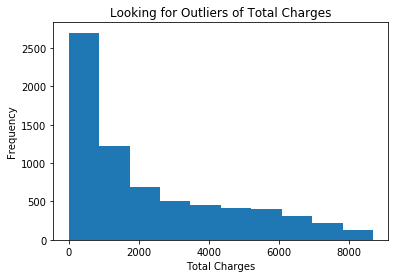

In [15]:
plt.hist(df.TotalCharges)
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Looking for Outliers of Total Charges')
plt.show()

**Feature Encoding & Engineering**

Because most classification algorithms require variables passed to them to be numeric, existing categorical variables needed to be encoded into numeric values. The following steps were taken to represent the information from the following categorical variables numerically: PhoneService, MultipleLines, PaymentMethod, gender, Contract, InternetService, Partner, Dependents, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling. 

1. PhoneLines: a new attribute created from PhoneService and MultipleLines. Possible values include 0 (no phone service, 0 lines), 1 (1 line), or 2 (2 or more lines).

In [16]:
df['PhoneLines'] = df['MultipleLines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2})

2. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: 'No' and 'No internet service' were replaced with 0, and 'Yes' was replaced with 1. 

In [17]:
internet_addon_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                          'TechSupport', 'StreamingTV', 'StreamingMovies']

df[internet_addon_columns] = df[internet_addon_columns].replace({'No': 0, 'No internet service': 0, 'Yes': 1})

3. InternetService: 'No internet service' was replaced with 0, 'DSL' was replaced with 1, and 'Fiber optic' was replaced with 2. 

In [18]:
df['InternetService'] = df[['InternetService']].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})

4. Contract: 'Month-to-month' was replaced with 0, 'One year' with 1, and 'Two year' with 2. 

In [19]:
df['Contract'] = df[['Contract']].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

5. Female: a new attribute created from gender. Values include 1 for females and 0 for males. 

In [20]:
df['Female'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

6. Streaming: a new attribute created from the previously encoded variables of StreamingTV and StreamingMovies by summing the two variables. A 2 indicates the customer has both services, 1 indicates one streaming service, and 0 indicates no streaming services. 

In [21]:
df['Streaming'] = df['StreamingTV'] + df['StreamingMovies']

7. Partner, Dependents, PaperlessBilling: 'No' was replaced with 0, and 'Yes' was replaced with 1. 

In [22]:
cols_to_encode = ['Partner', 'Dependents', 'PaperlessBilling']
df[cols_to_encode] = df[cols_to_encode].replace({'No': 0, 'Yes': 1})

8. AutomatedPayment: a new feature created from the variable PaymentMethod. Value of 1 indicates the customer's payment method is either 'Bank transfer (automatic)' or 'Credit card (automatic)'. Value of 0 represents a manual method ('Mailed check' or 'Electronic check'). 

In [23]:
df['AutomatedPayment'] = df.isin({'PaymentMethod': ['Bank transfer (automatic)', 
                                                    'Credit card (automatic)']})['PaymentMethod'].astype('int')

9. MailedCheck: a new feature created from the variable PaymentMethod. Value of 1 indicates the customer's payment method is 'Mailed check'. Value of 0 indicates another method. If a customer has a value of 0 for both AutomatedPayment and MailedCheck, then that customer's payment method is 'Electronic check'. 

In [24]:
df['MailedCheck'] = df['PaymentMethod'].apply(lambda x: 1 if x == 'Mailed check' else 0)

10. InternetAddons: a new feature created by adding the variables (encoded in step 2) of OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. 

In [25]:
df['InternetAddOns'] = (
    df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] + 
    df['TechSupport'] + df['StreamingTV'] + df['StreamingMovies']
)

11. The original variables of PhoneService, MultipleLines, StreamingTV, StreamingMovies, PaymentMethod, gender were dropped. 

In [26]:
df.drop(columns=['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'gender'], 
       inplace=True)

12. Drop rows with tenure of 0 months and then bin the remaining as follows: ['1mo', '2-12mo', '13-24mo', ...]

In [27]:
df = df[df.tenure != 0]

In [28]:
from math import ceil

def bin_tenure(tenure):
    if tenure==1:
        return 0
    else:
        return ceil(tenure/12)

df['tenure_bin'] = df.tenure.apply(bin_tenure)

13. AdjustedCharges: As expected, a relationship exists between the number of products or services the customer has and the monthly charges. More services lead to higher cost (except in the case of one phone line versus two phone lines, where there is no significant difference). AdjustedCharges is created by centering and scaling MonthlyPrice based on the mean price for each product/service combination. MonthlyCharges can then be dropped. 

In [29]:
# Identify the median monthly charges for each unique combination of InternetService, PhoneLines, InternetAddOns, and Contract. 

services_df = df.groupby(['Contract', 'InternetService', 'PhoneLines', 
                          'InternetAddOns'])['MonthlyCharges'].agg(['mean', 'std', 'count']).reset_index()

# join services_df with df to join the mean, standard deviation and count to the original dataframe. 

df = df.merge(services_df, on=['Contract', 'InternetService', 'PhoneLines', 'InternetAddOns'], how='left')

df['AdjustedCharges'] = (df['MonthlyCharges'] - df['mean'])/df['std']

Demonstration of the relationship of products & services to monthly charges:

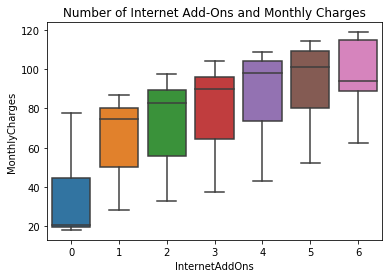

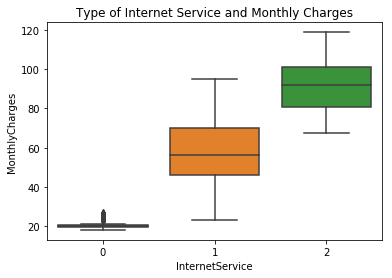

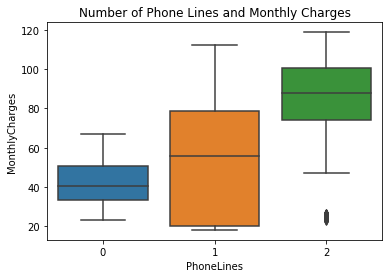

In [34]:
sns.boxplot(x='InternetAddOns', y='MonthlyCharges', data=df)
plt.title("Number of Internet Add-Ons and Monthly Charges")
plt.show()

sns.boxplot(x='InternetService', y='MonthlyCharges', data=df)
plt.title("Type of Internet Service and Monthly Charges")
plt.show()

sns.boxplot(x='PhoneLines', y='MonthlyCharges', data=df)
plt.title("Number of Phone Lines and Monthly Charges")
plt.show()

**Encode Target Variable**

Churn is encoded so that 'Yes' is represented by 1 and 'No' is represented by 0. 

In [35]:
# df['Churn'] = df[['Churn']].replace({'Yes': 1, 'No': 0})

In [36]:
# df.info()

### Data Analysis

#### I. Univariate Statistics

https://wiley.engagelms.com/learn/mod/lti/view.php?id=22691

goals

- detect anomalies or outliers
- Imbalanced target
- variable with too little entropy to add value
- "orders of magnitude"
- values lie within reasonable limits for what the variable represents. 
- ways to refactor variables ("discretize") to better represent, reduce noise, or capture information. 
- "We also have to ensure that the distribution of the values of a variable is indeed homogeneous and does not have a singularity, which might be an erroneous value, assigned by default where no information was acquired."

https://wgu.vitalsource.com/#/books/9780470979280/epubcfi/6/24%5B%3Bvnd.vst.idref%3Dchapter03%5D!/4/2/6/18%5Bvst-image-button-96953%5D/4%400:67.6


qualitative vars: frequency table with count and percent, bar plots
quantitative vars: box plot, histogram, .describe


histograms/barplots/boxplots

In [37]:
categorical_vars = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 
                    'PhoneLines', 'AutomatedPayment', 'MailedCheck', 'Female', 
                    'Contract', 'InternetAddOns', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Streaming']

numeric_vars = ['tenure', 'AdjustedCharges', 'MonthlyCharges', 'TotalCharges']

**Target Variable: Churn**

Churn, the target variable, is somewhat imbalanced. The customers who have churned make up only 27% of the sample. 

In [38]:
pd.DataFrame({'Number of customers': df.groupby(['Churn'])['Churn'].count(), 
              'Percent of customers': round(df.groupby(['Churn'])['Churn'].count()/len(df.Churn)*100, 2)})

Number of customers  Percent of customers
Churn                                           
No                    5163                 73.42
Yes                   1869                 26.58

**Qualitative Variables**

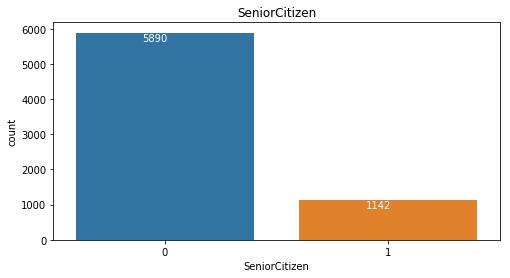

               Count  Percent
SeniorCitizen                
0               5890    83.76
1               1142    16.24
_________________________________________________________________


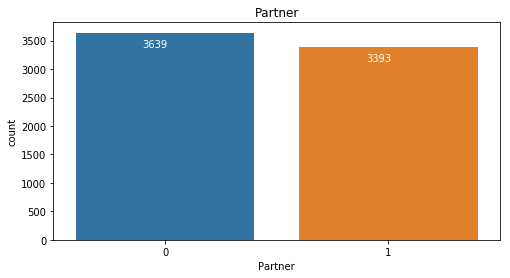

         Count  Percent
Partner                
0         3639    51.75
1         3393    48.25
_________________________________________________________________


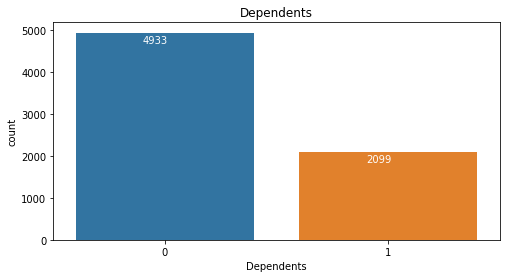

            Count  Percent
Dependents                
0            4933    70.15
1            2099    29.85
_________________________________________________________________


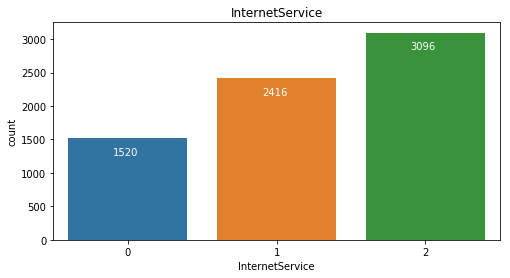

                 Count  Percent
InternetService                
0                 1520    21.62
1                 2416    34.36
2                 3096    44.03
_________________________________________________________________


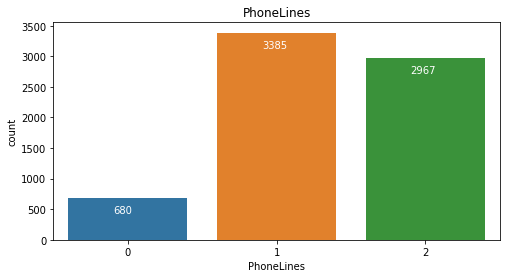

            Count  Percent
PhoneLines                
0             680     9.67
1            3385    48.14
2            2967    42.19
_________________________________________________________________


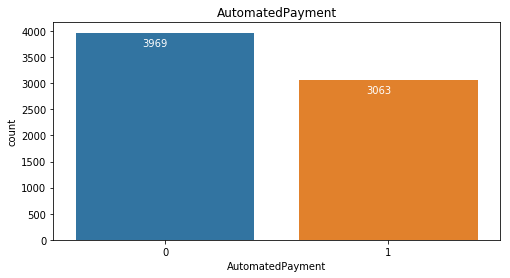

                  Count  Percent
AutomatedPayment                
0                  3969    56.44
1                  3063    43.56
_________________________________________________________________


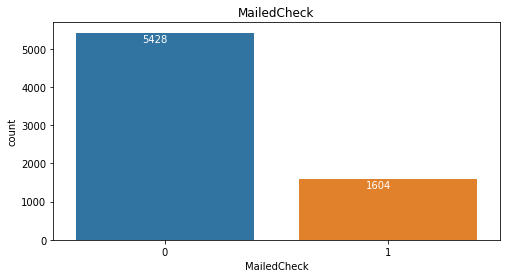

             Count  Percent
MailedCheck                
0             5428    77.19
1             1604    22.81
_________________________________________________________________


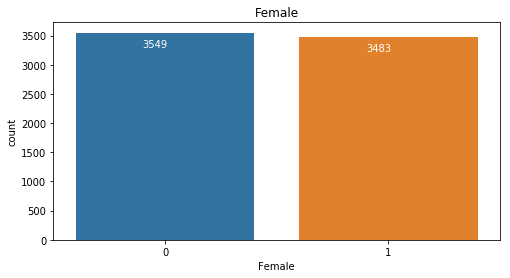

        Count  Percent
Female                
0        3549    50.47
1        3483    49.53
_________________________________________________________________


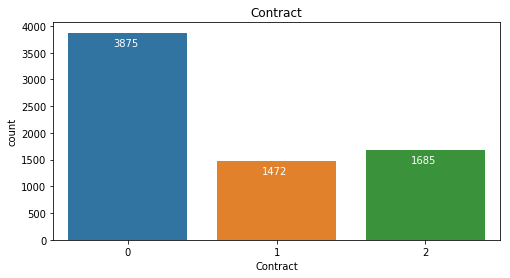

          Count  Percent
Contract                
0          3875    55.11
1          1472    20.93
2          1685    23.96
_________________________________________________________________


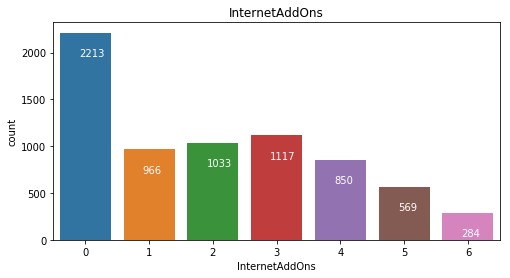

                Count  Percent
InternetAddOns                
0                2213    31.47
1                 966    13.74
2                1033    14.69
3                1117    15.88
4                 850    12.09
5                 569     8.09
6                 284     4.04
_________________________________________________________________


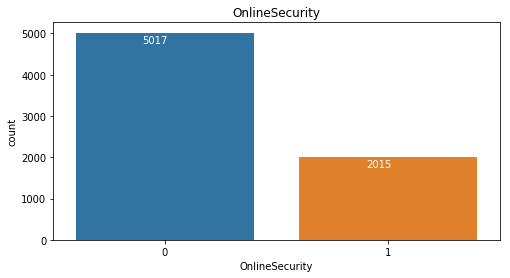

                Count  Percent
OnlineSecurity                
0                5017    71.35
1                2015    28.65
_________________________________________________________________


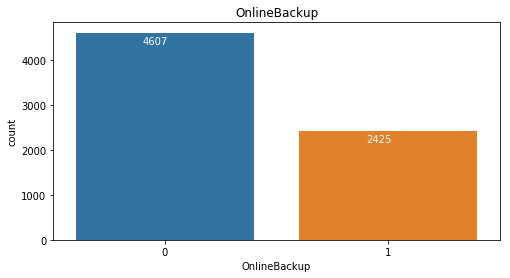

              Count  Percent
OnlineBackup                
0              4607    65.51
1              2425    34.49
_________________________________________________________________


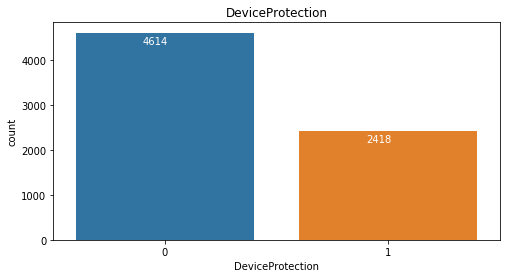

                  Count  Percent
DeviceProtection                
0                  4614    65.61
1                  2418    34.39
_________________________________________________________________


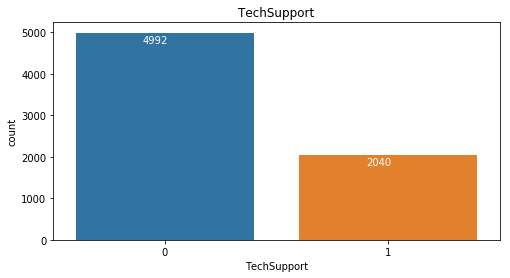

             Count  Percent
TechSupport                
0             4992    70.99
1             2040    29.01
_________________________________________________________________


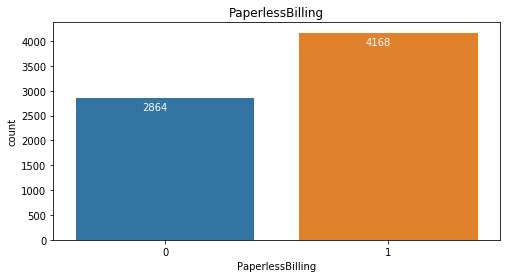

                  Count  Percent
PaperlessBilling                
0                  2864    40.73
1                  4168    59.27
_________________________________________________________________


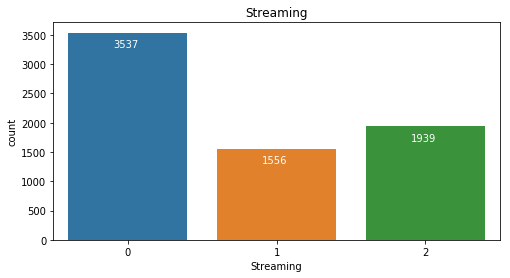

           Count  Percent
Streaming                
0           3537    50.30
1           1556    22.13
2           1939    27.57
_________________________________________________________________


In [39]:
for var in categorical_vars:
    freq = pd.DataFrame({'Count': df.groupby([var])[var].count(), 
                         'Percent': round(df.groupby([var])[var].count()/len(df.Churn)*100, 2)})
    plt.figure(figsize=(8, 4))
    sns.barplot(x=freq.index, y=freq.Count)
    plt.ylabel('count')
    # label points on the plot
    for x, y in zip(freq.index, freq.Count):
        plt.text(x = x-.1, # x-coordinate position of data label
        y = y-250, # y-coordinate position of data label, adjusted to be 150 below the data point
        s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
        color = 'white') # set colour of line
    plt.title(var)
    plt.show()
    print(freq)
    print('_________________________________________________________________')

**Quantitative Variables**

Summary statistics, histograms and boxplots are useful ways to explore quantitative variables. 

Distributions

- tenure: bimodal  
- Monthly charges: high frequency at the lower bound, and then the values beyond that entry point form a normally shaped curve.  
- Total charges: skewed left

In [40]:
df[numeric_vars].describe()

tenure  AdjustedCharges  MonthlyCharges  TotalCharges
count  7032.000000     7.028000e+03     7032.000000   7032.000000
mean     32.421786     4.911521e-15       64.798208   2283.300441
std      24.545260     9.927874e-01       30.085974   2266.771362
min       1.000000    -4.260859e+00       18.250000     18.800000
25%       9.000000    -7.128350e-01       35.587500    401.450000
50%      29.000000     8.289508e-03       70.350000   1397.475000
75%      55.000000     7.540648e-01       89.862500   3794.737500
max      72.000000     3.139040e+00      118.750000   8684.800000

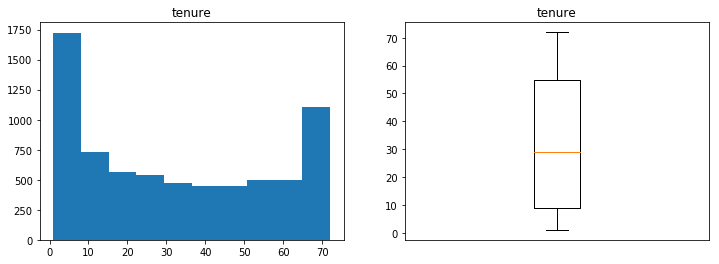

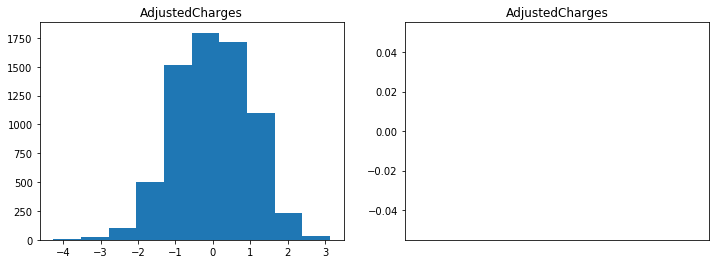

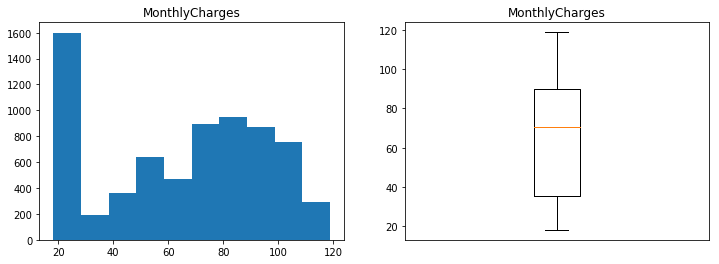

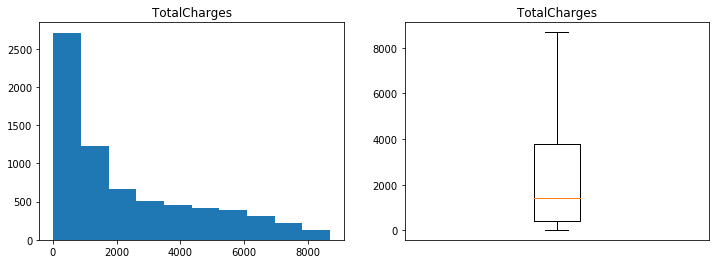

In [41]:
for col in numeric_vars:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col])
    plt.title(col)
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.title(col)
    plt.xticks([])
    plt.show()

#### J. Bivariate Statistics

In [42]:
# sns.relplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", col="InternetService", row="Contract")

##### Detecting Collinearity using Visualization

TotalCharges appears to be a direct function of tenure and MonthlyCharges; therefore, collinearity exists between TotalCharges and tenure. I demonstrate this below by first computing a variable, 'tenure_x_MonthlyCharges', which is the product of tenure and MonthlyCharges. I then plot the product by TotalCharges and we see the almost perfect correlation of these two variables. Because of the relationship, TotalCharges can be excluded from the features. 

Text(0.5, 1.0, 'TotalCharges is a function of MonthlyCharges and Tenure')

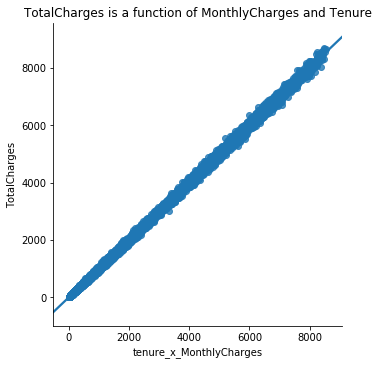

In [43]:
df['tenure_x_MonthlyCharges'] = df.tenure * df.MonthlyCharges

sns.lmplot(x='tenure_x_MonthlyCharges', y='TotalCharges', data=df)
plt.title("TotalCharges is a function of MonthlyCharges and Tenure")

Drop TotalCharges & MonthlyCharges, as the information is captured in the variables tenure and AdjustedCharges. 

In [44]:
df.drop(columns=['TotalCharges', 'MonthlyCharges'], inplace=True)

**Do those who churn pay more?**

It appears that those who churn are paying more than those who do not, controlling for contract type; however, a statistical test will be necessary to confirm whether the difference is significant. 

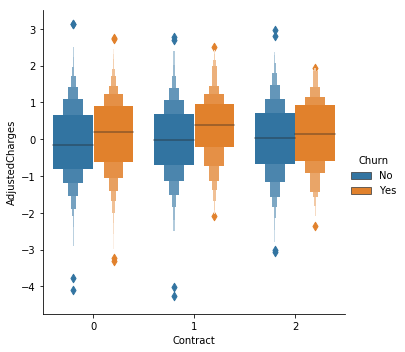

In [45]:
sns.catplot(x="Contract", y="AdjustedCharges", hue="Churn", data=df, kind="boxen")

**Do customers get charged more as tenure increases? Does this relate to churn?**

There appears to be more variance in charges as tenure increases. Whether customers who churn are charged more than those who do not is still unclear. 

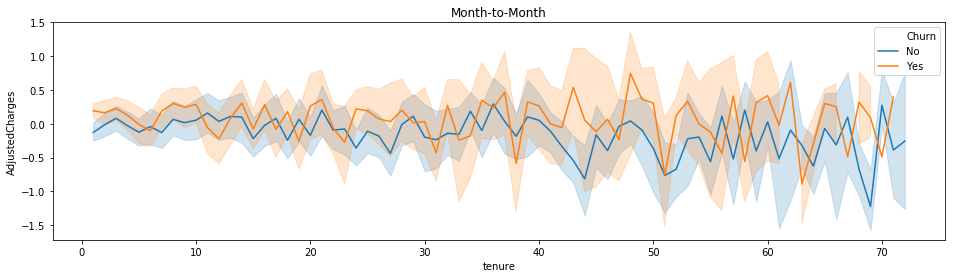

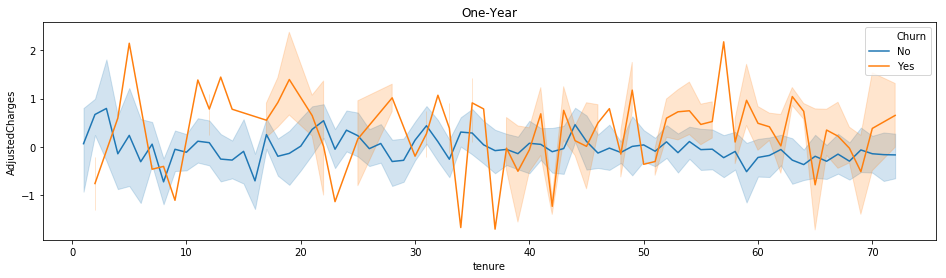

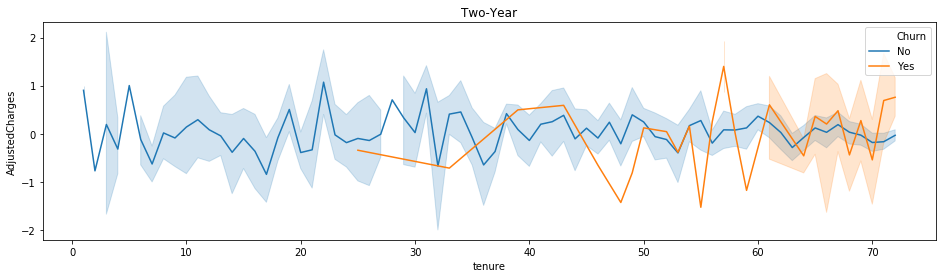

In [46]:
plt.figure(figsize=(16,4))
sns.lineplot(x="tenure", y="AdjustedCharges", hue="Churn", data=df[df.Contract==0])
plt.title("Month-to-Month")
plt.show()

plt.figure(figsize=(16,4))
sns.lineplot(x="tenure", y="AdjustedCharges", hue="Churn", data=df[df.Contract==1])
plt.title("One-Year")
plt.show()

plt.figure(figsize=(16,4))
sns.lineplot(x="tenure", y="AdjustedCharges", hue="Churn", data=df[df.Contract==2])
plt.title("Two-Year")
plt.show()
# row="Contract", kind="bar", ci=None

**When do customers churn?**

Of month-to-month customers who churn, 23% do so in the first month, 30% in the first two months, and 50% in the first 8 months, and 62% in the first year.  
Customers who churn under a two-year contract are distributed by 10% churning during the first four years, 23% in the fifth year, and 65% in the final year. 
Customers who churn under a one-year contract do so slowly over time. 8% churn in the first year, 10% churn in the second year, 11% in the third year, 18% in the fourth year, 25% in the fifth year, and 23% in the final year. 

In [47]:
tenure_churn_counts = pd.crosstab(df[df.Churn=="Yes"].tenure, df[df.Churn=="Yes"].Contract).reset_index()

tenure_churn_counts.columns = ['tenure', 'month-to-month', 'one-year', 'two-year']

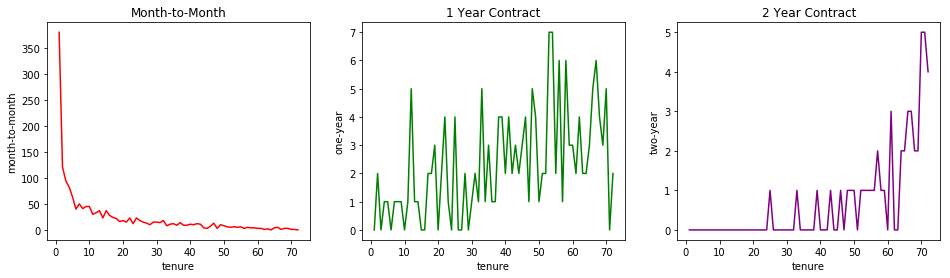

In [48]:
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.lineplot(data = tenure_churn_counts, x="tenure", y="month-to-month", color='red')
plt.title('Month-to-Month')
plt.subplot(1, 3, 2)
sns.lineplot(data = tenure_churn_counts, x="tenure", y="one-year", color='green')
plt.title('1 Year Contract')
plt.subplot(1, 3, 3)
sns.lineplot(data = tenure_churn_counts, x="tenure", y="two-year", color='purple')
plt.title('2 Year Contract')
plt.show()

In [49]:
tenure_churn_props = pd.crosstab(df[df.Churn=="Yes"].tenure, df[df.Churn=="Yes"].Contract).apply(lambda r: r/r.sum(), axis=0).reset_index()
tenure_churn_props.columns = ['tenure', 'month-to-month', 'one-year', 'two-year']
tenure_churn_props.iloc[0:23,].sum()

tenure            276.000000
month-to-month      0.772810
one-year            0.174699
two-year            0.000000
dtype: float64

##### Numeric by Numeric

In [50]:
categorical_vars = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 
                    'PhoneLines', 'AutomatedPayment', 'MailedCheck', 'Female', 
                    'InternetAddOns', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Streaming']

numeric_vars = ['tenure', 'AdjustedCharges']

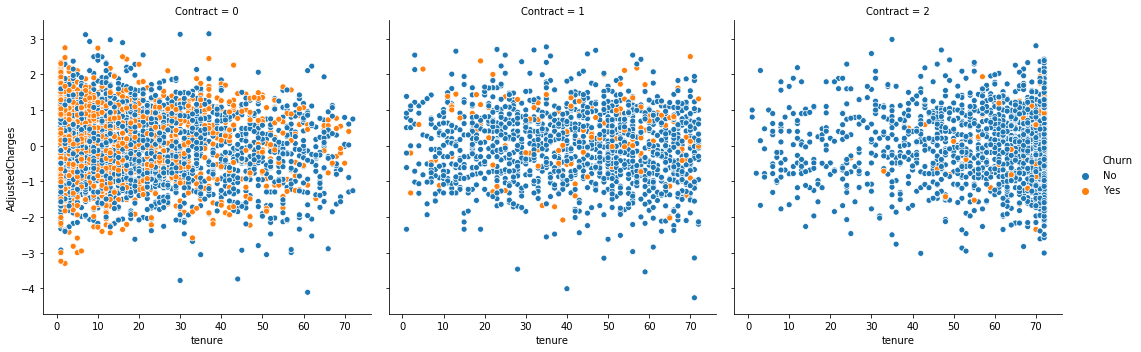

In [52]:
sns.relplot(data=df, x="tenure", y="AdjustedCharges", hue="Churn", col="Contract")
plt.show()

##### Categorical by Numeric

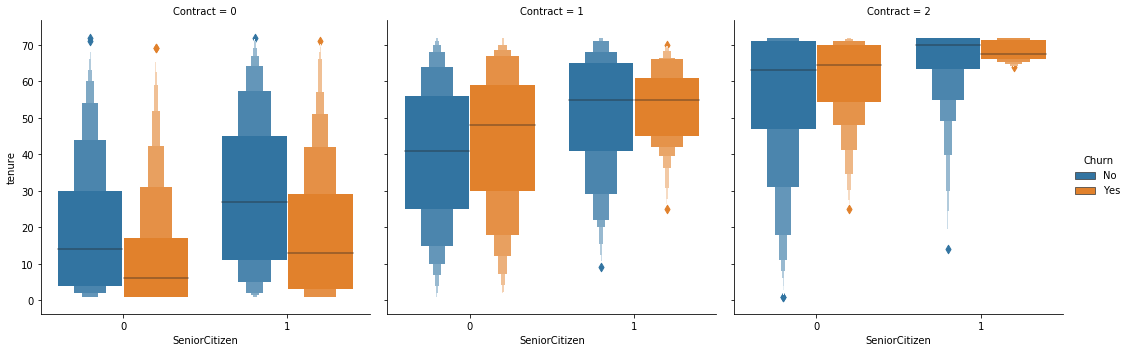

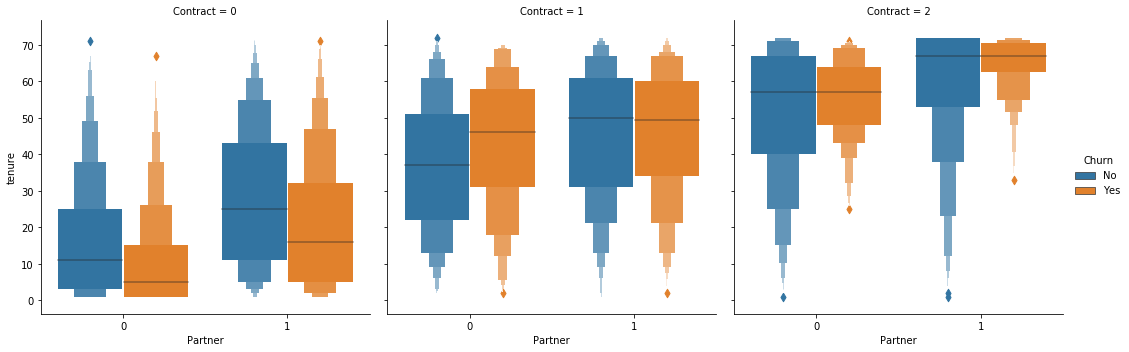

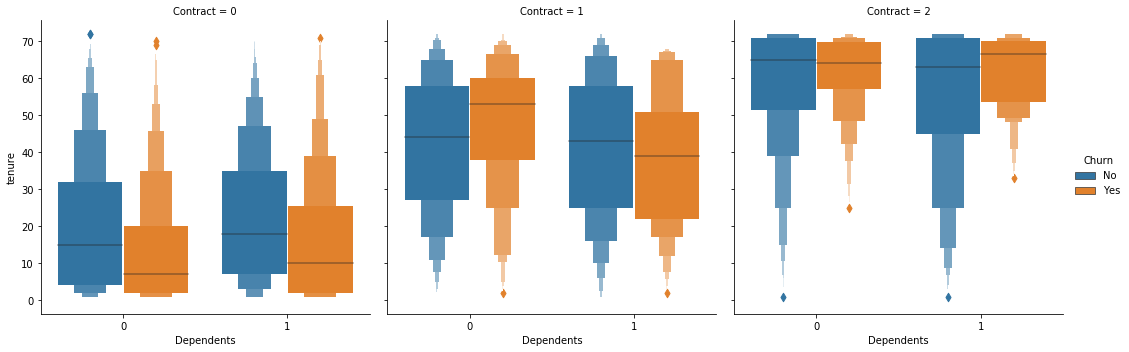

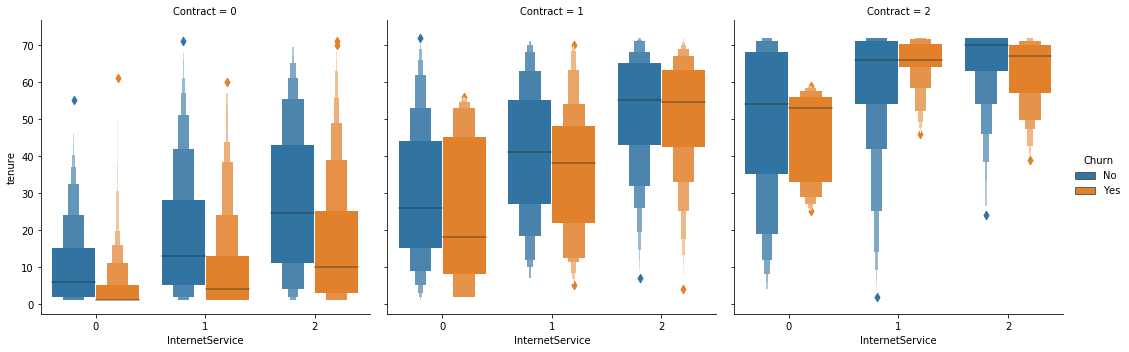

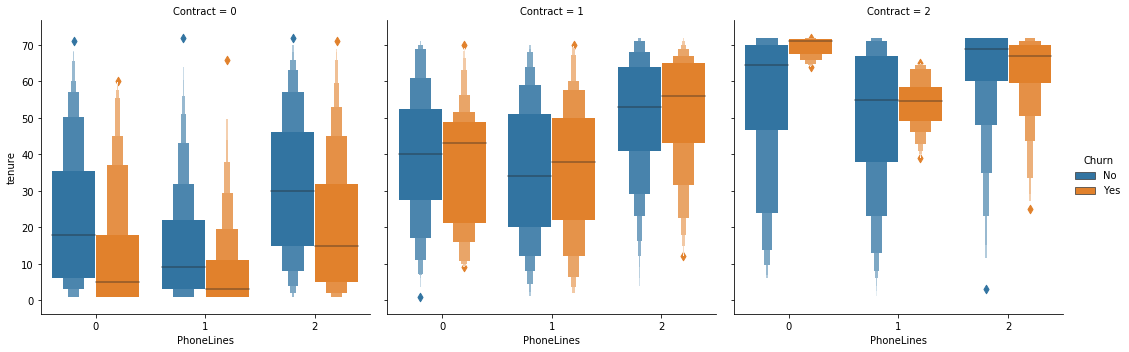

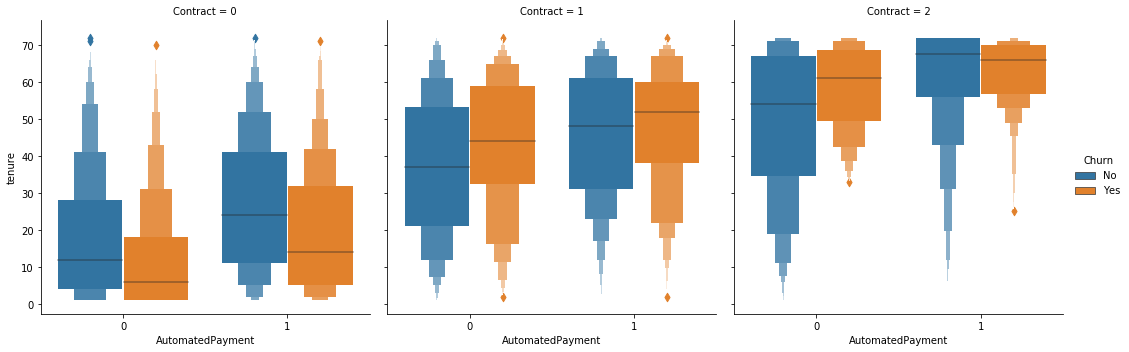

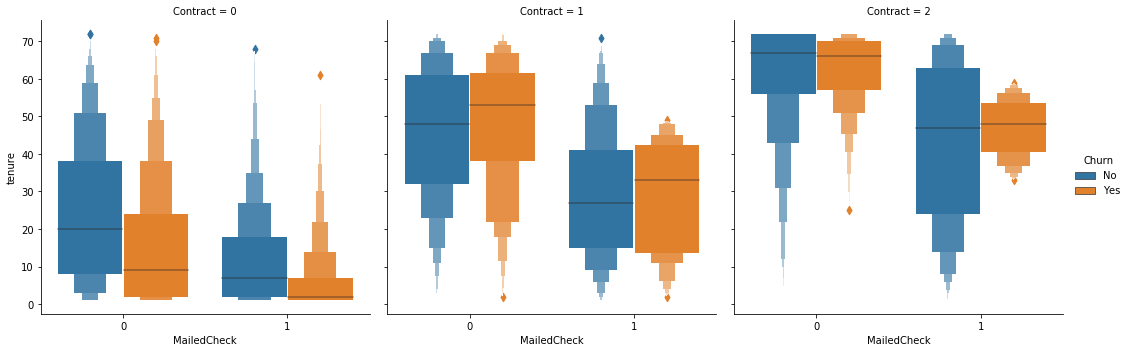

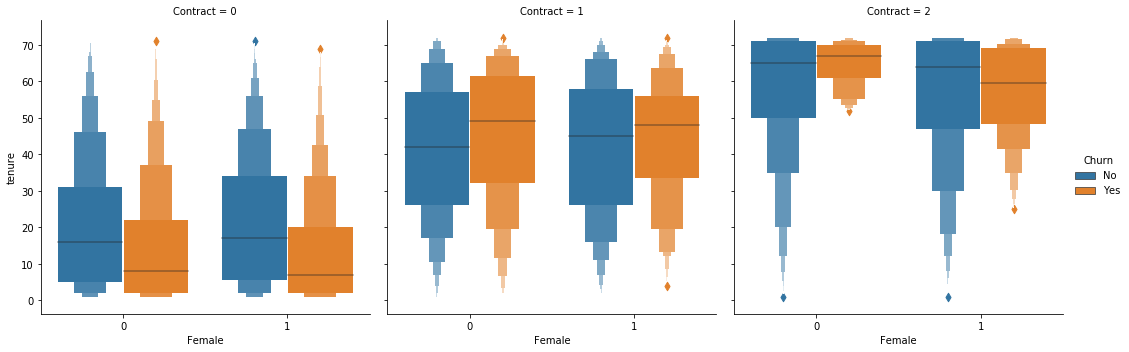

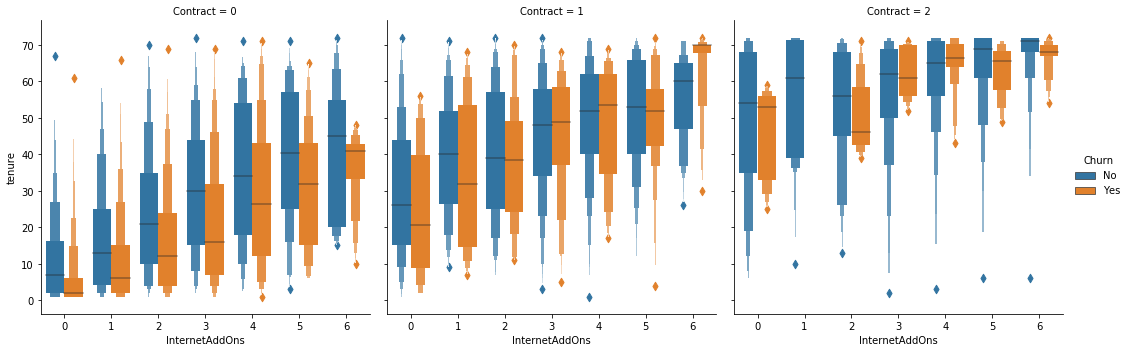

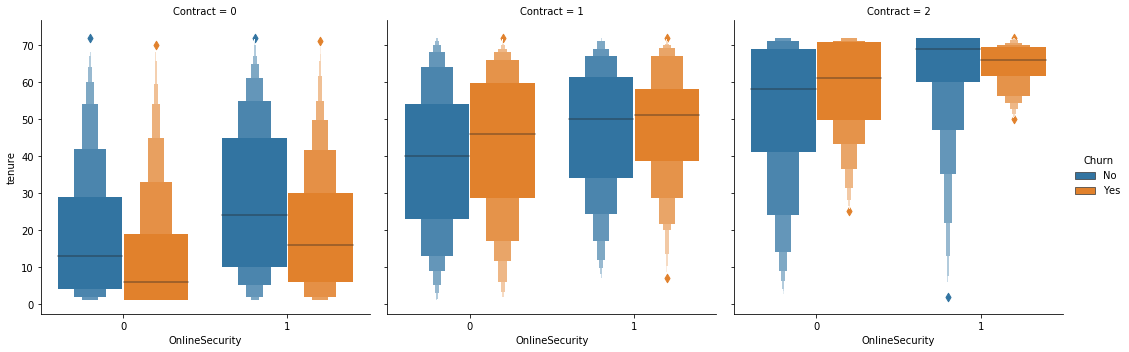

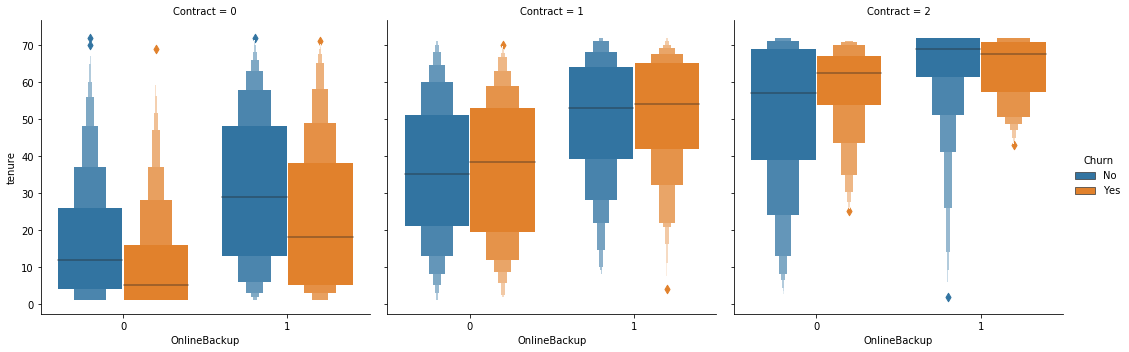

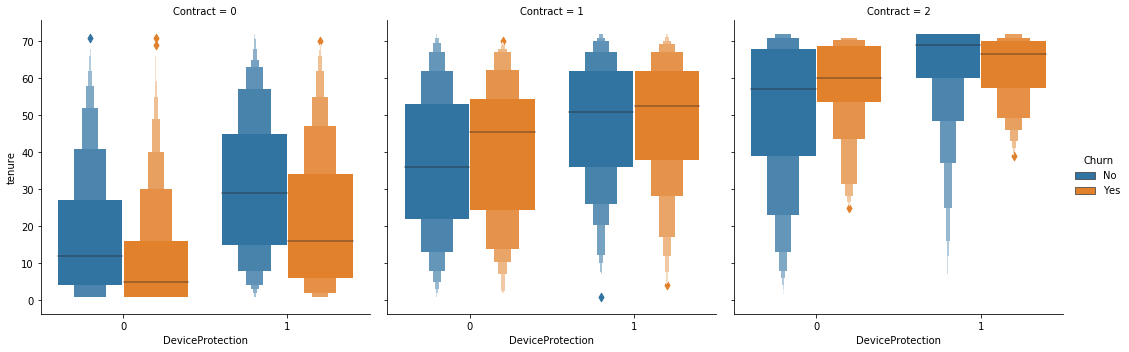

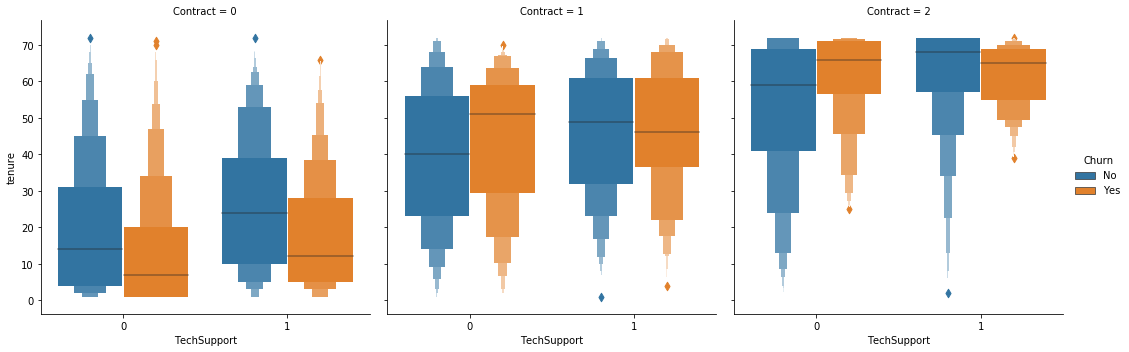

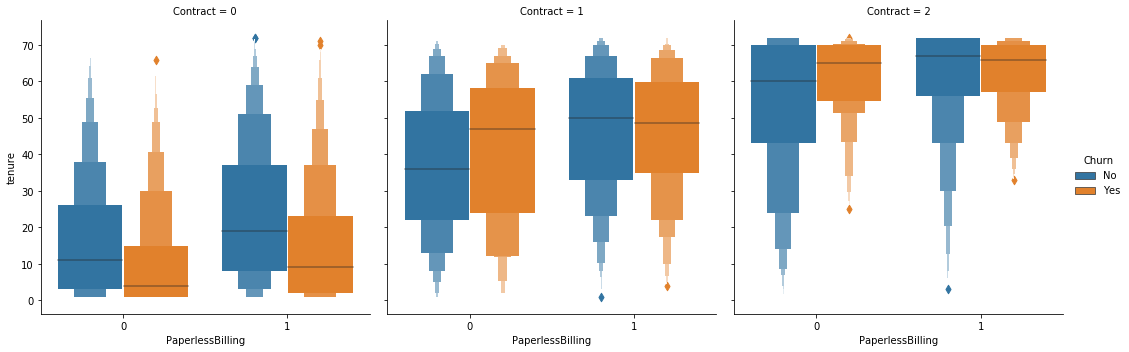

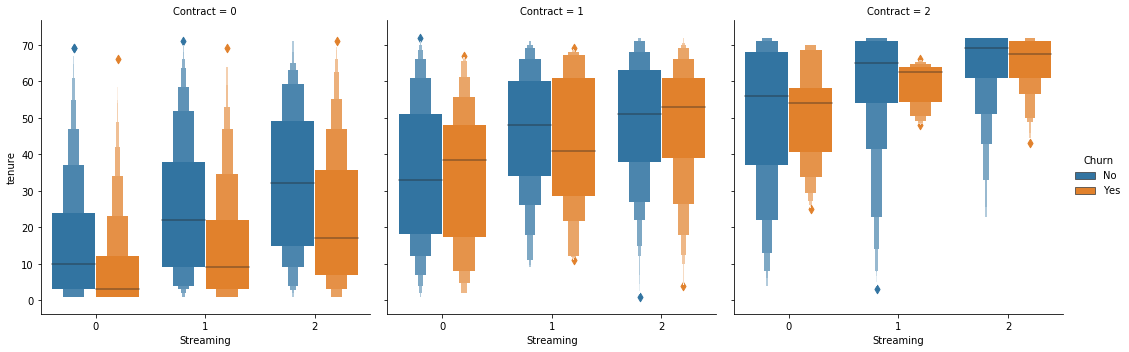

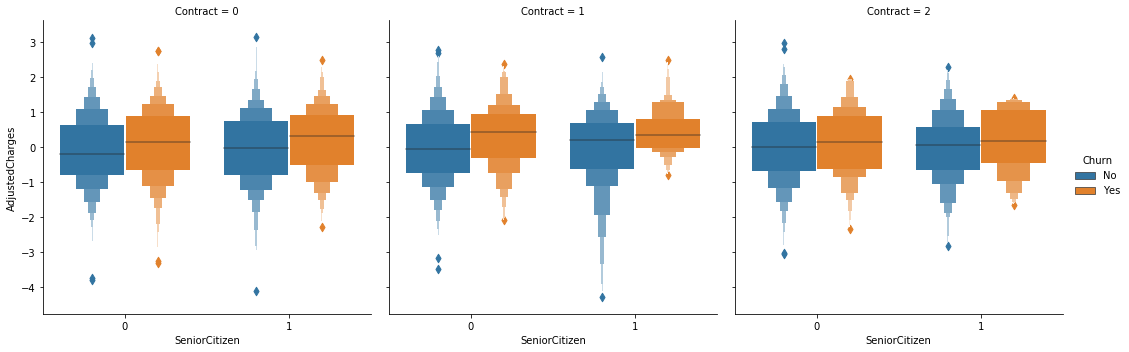

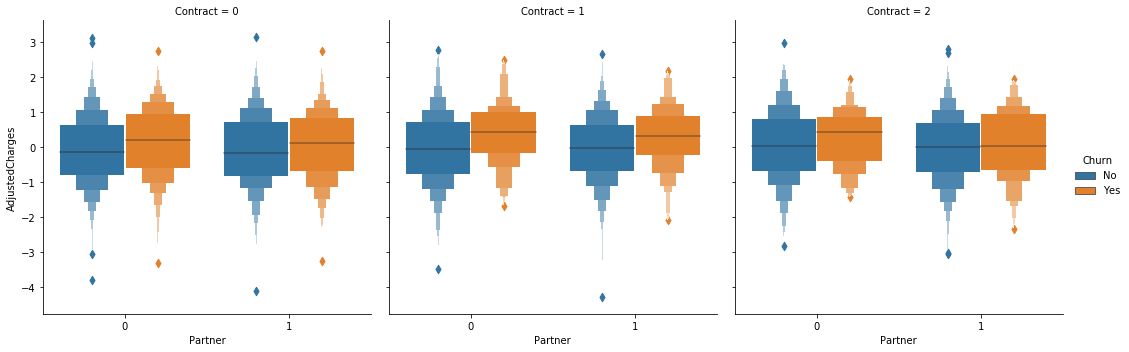

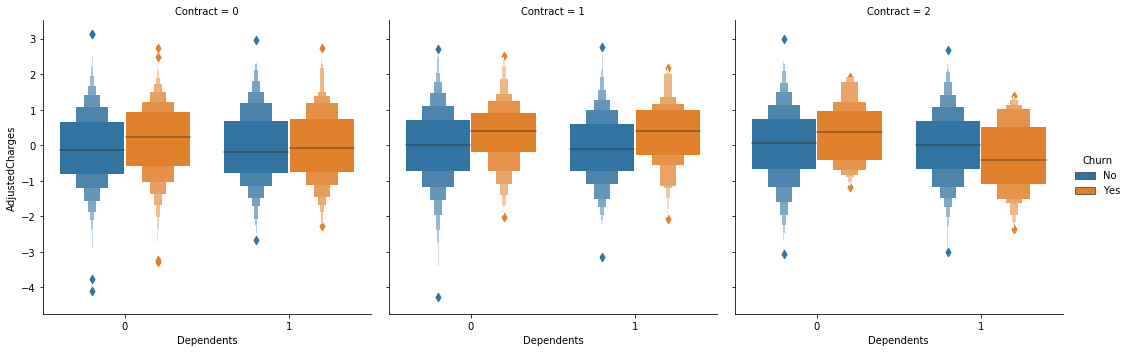

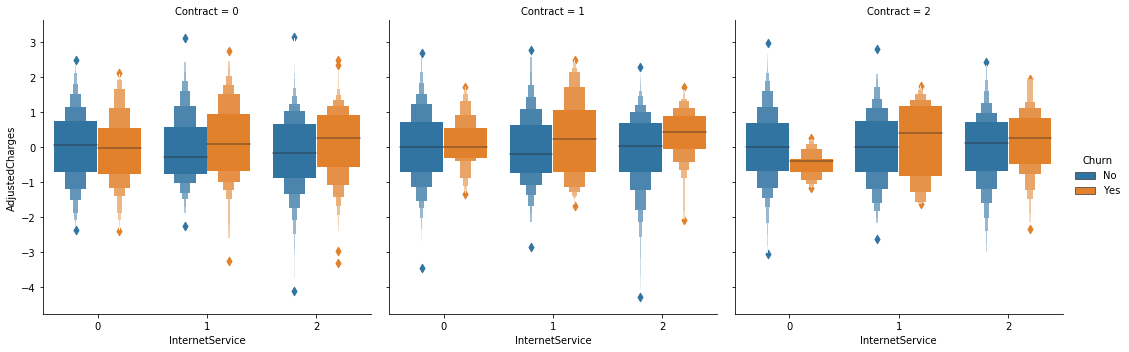

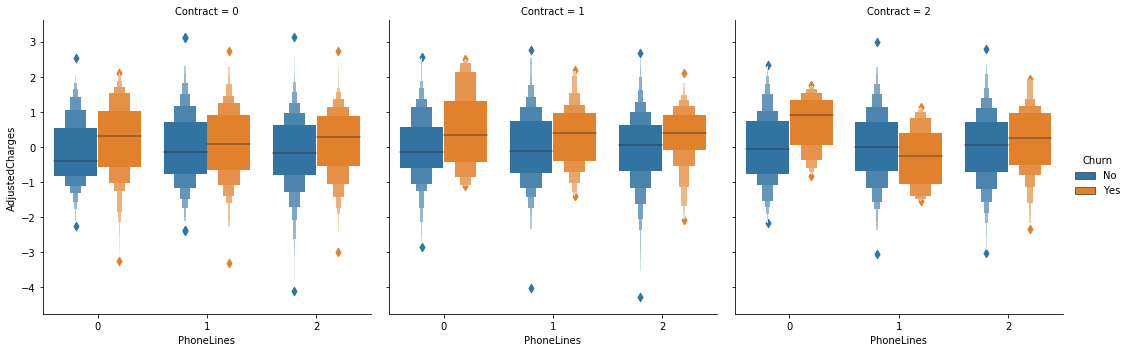

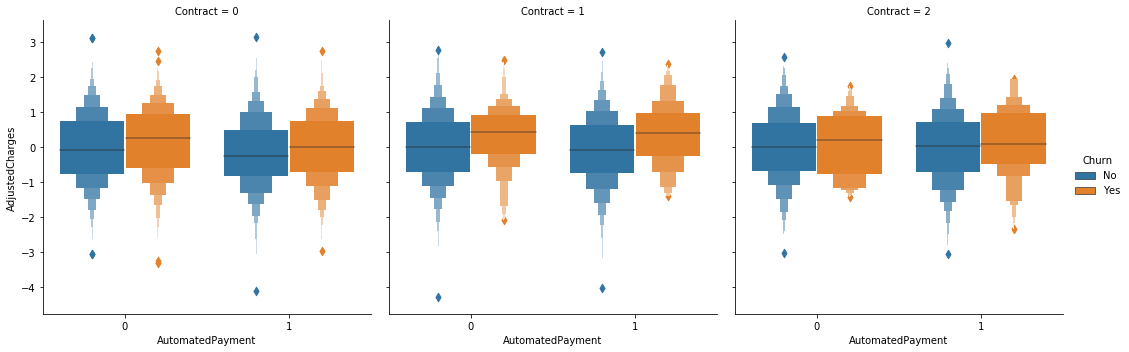

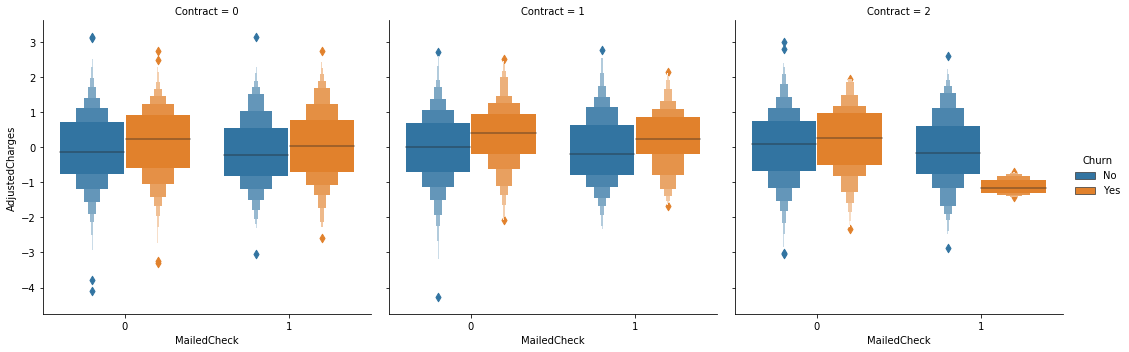

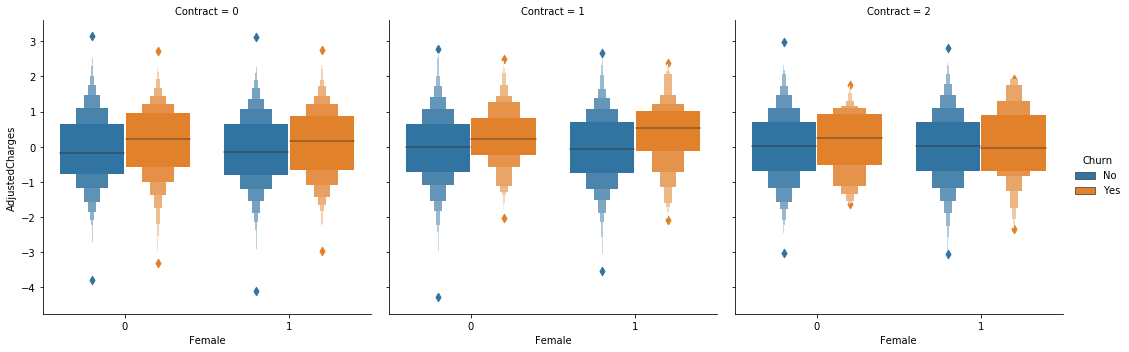

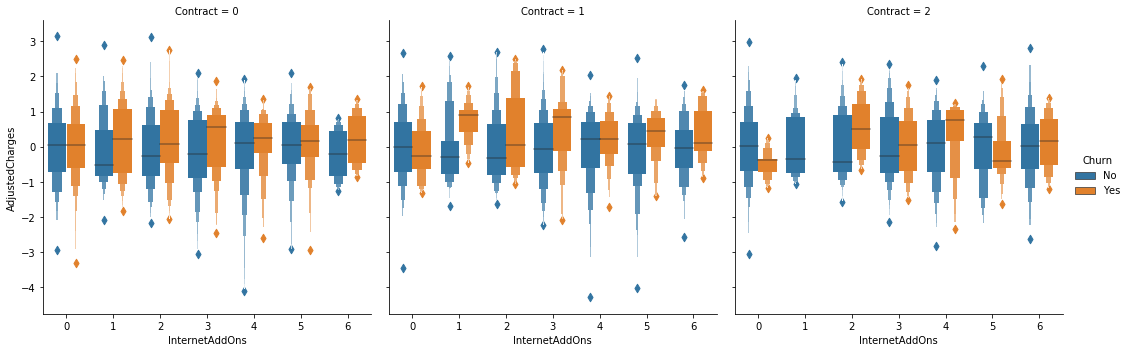

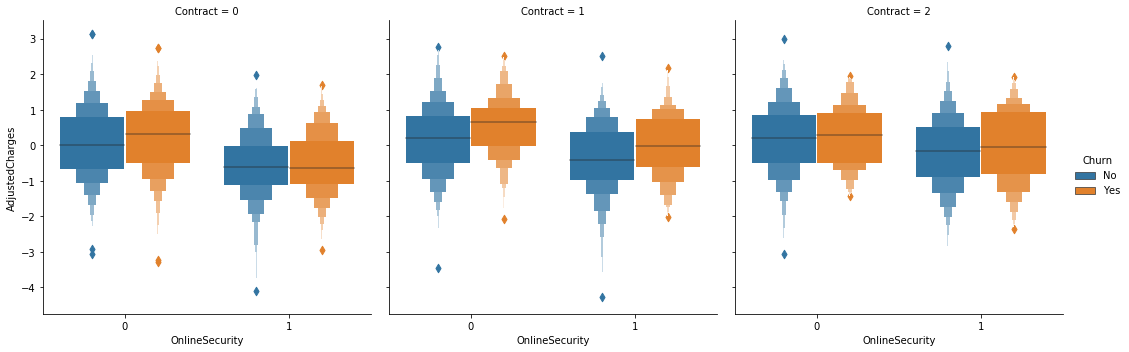

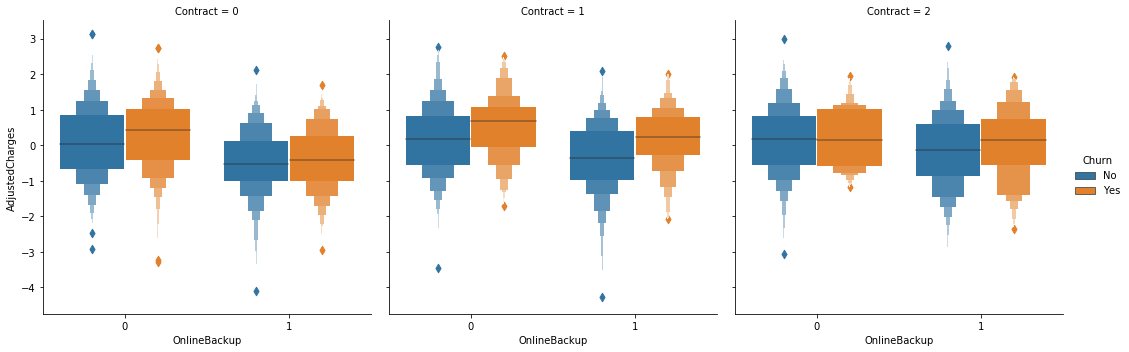

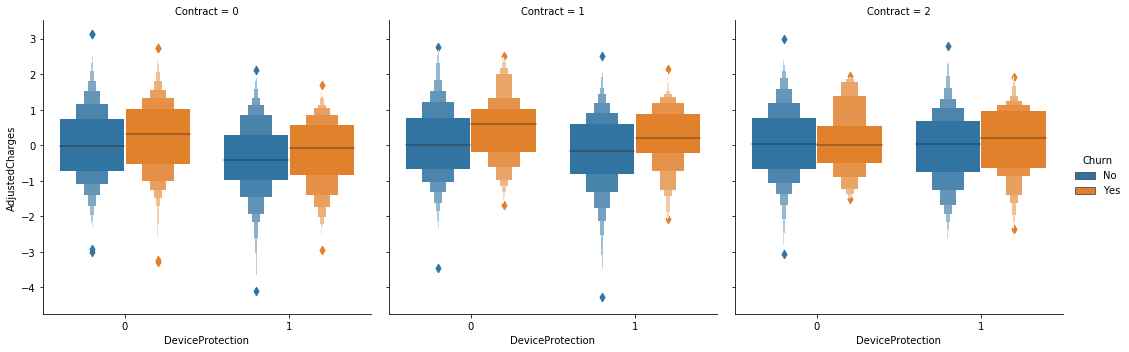

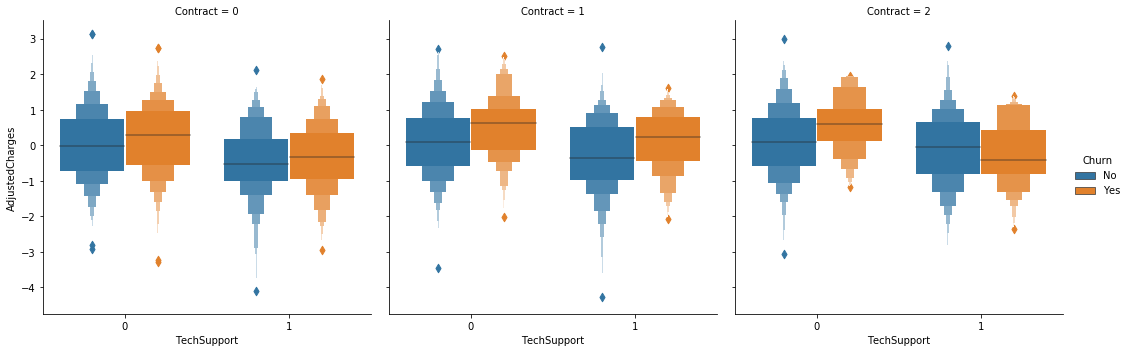

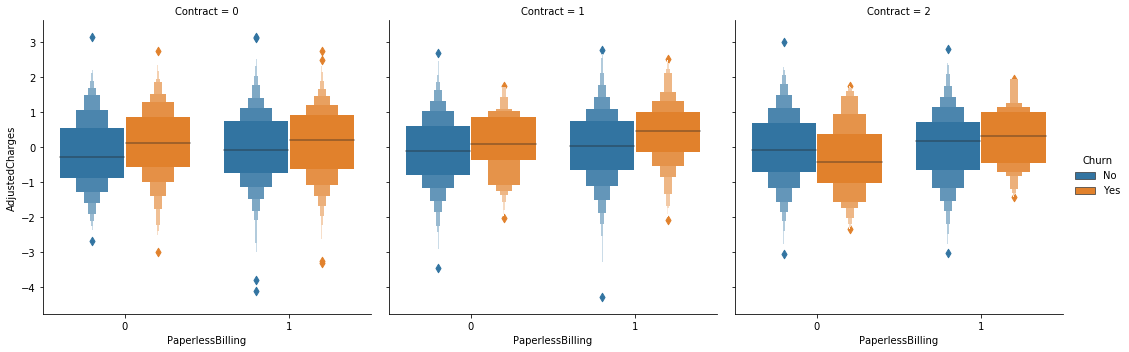

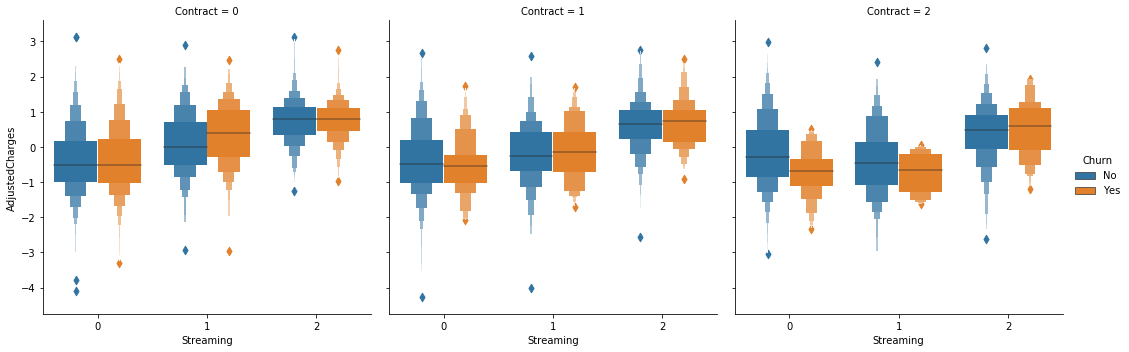

In [53]:
for num in numeric_vars:
    for cat in categorical_vars:
        sns.catplot(x=cat, y=num, hue="Churn", col="Contract", kind="boxen", data=df)
        plt.show()

##### Categorical by Categorical

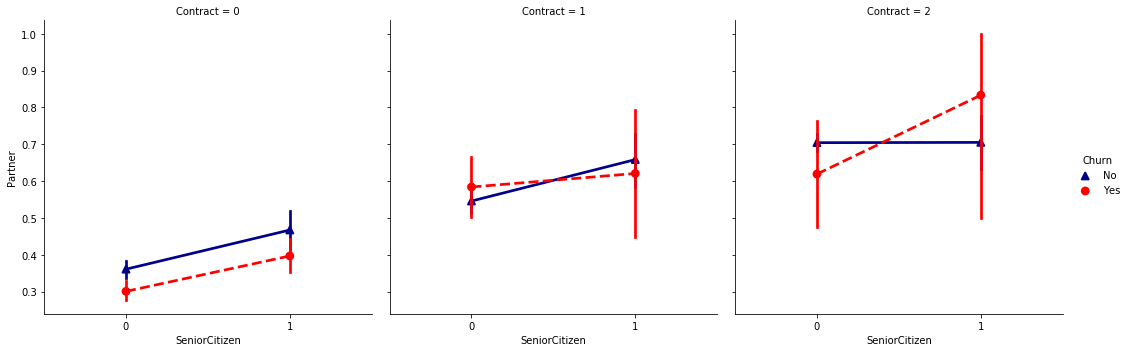

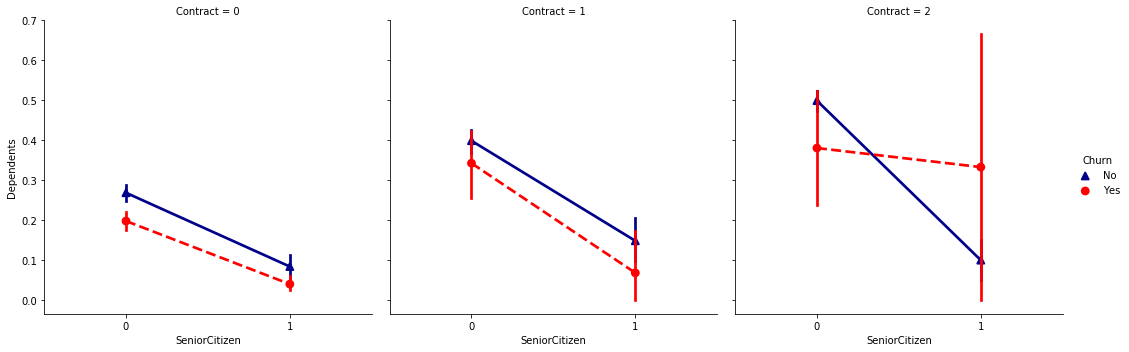

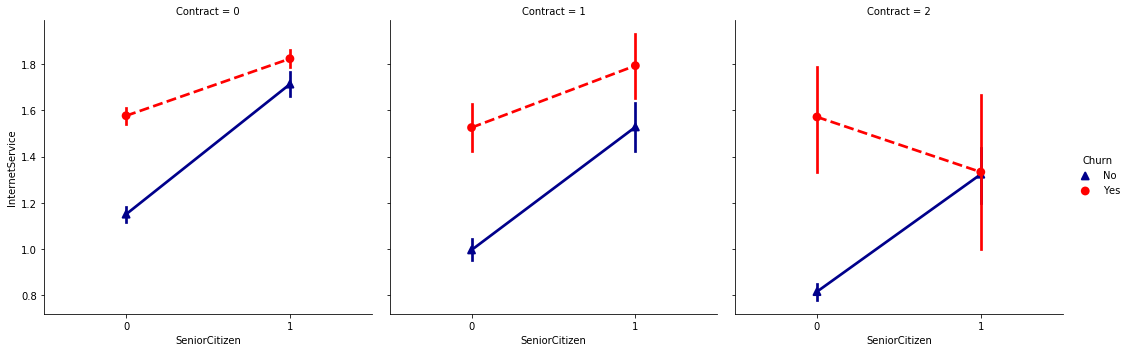

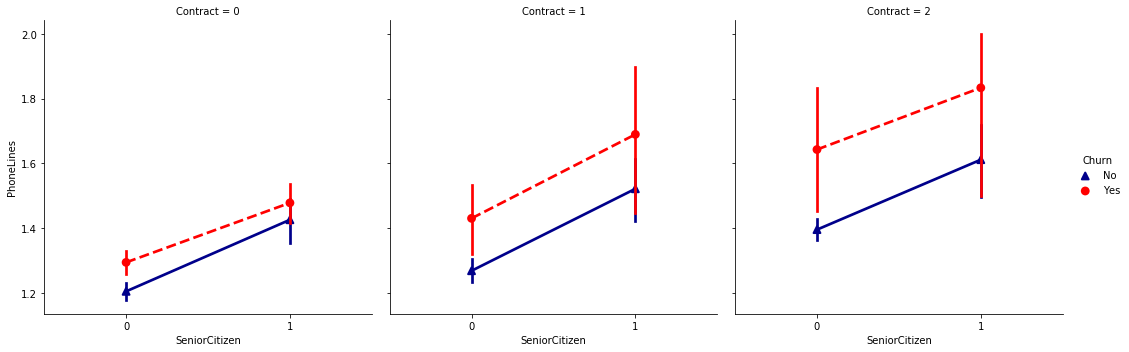

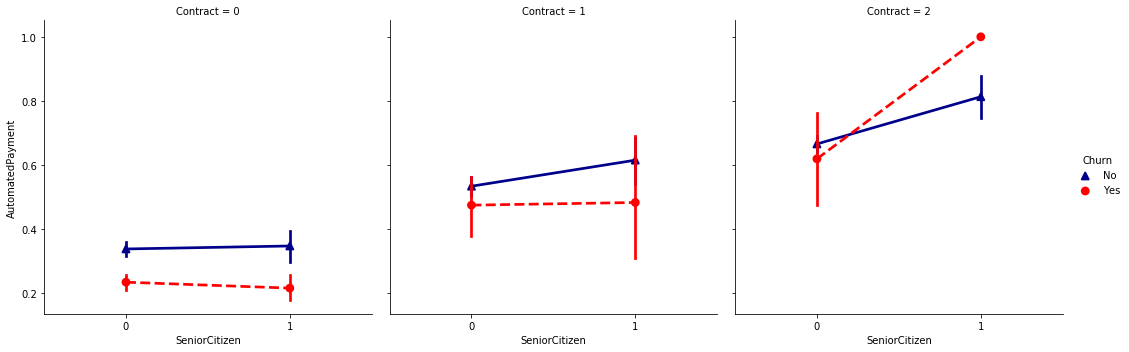

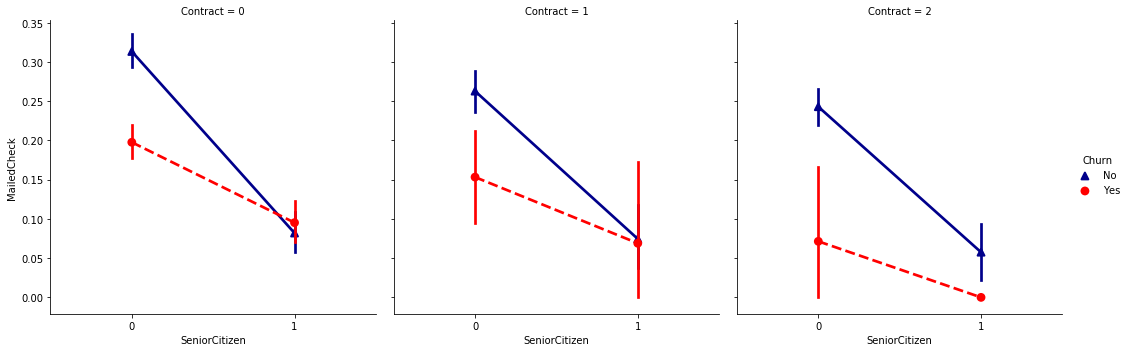

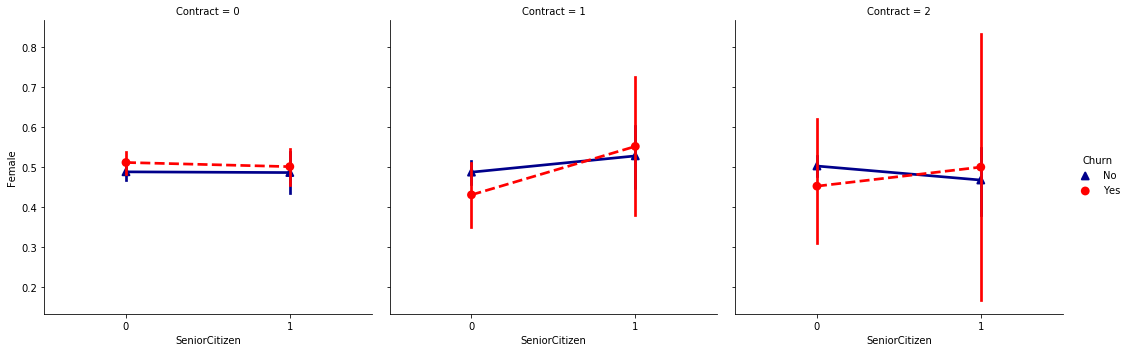

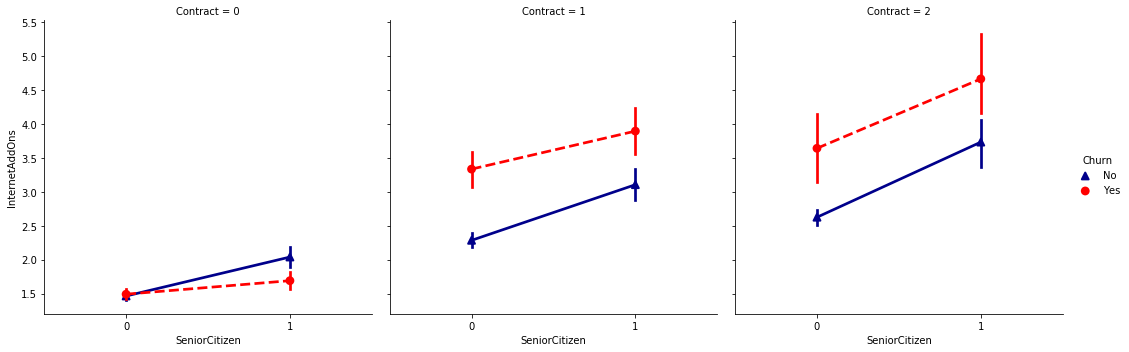

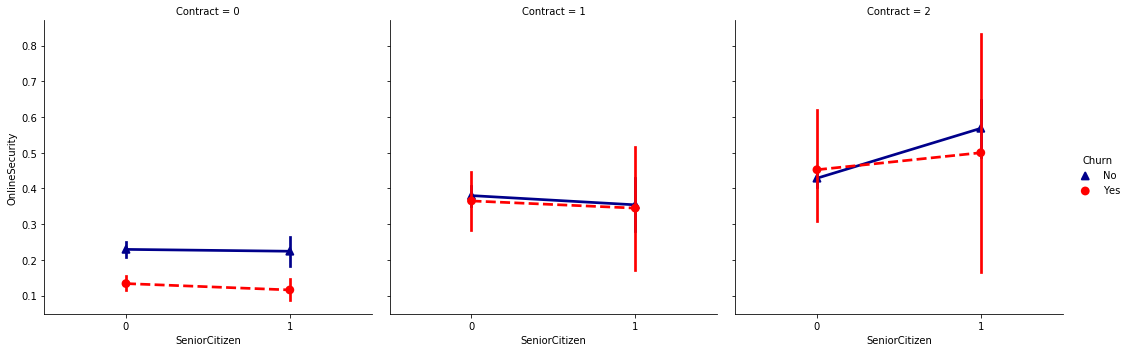

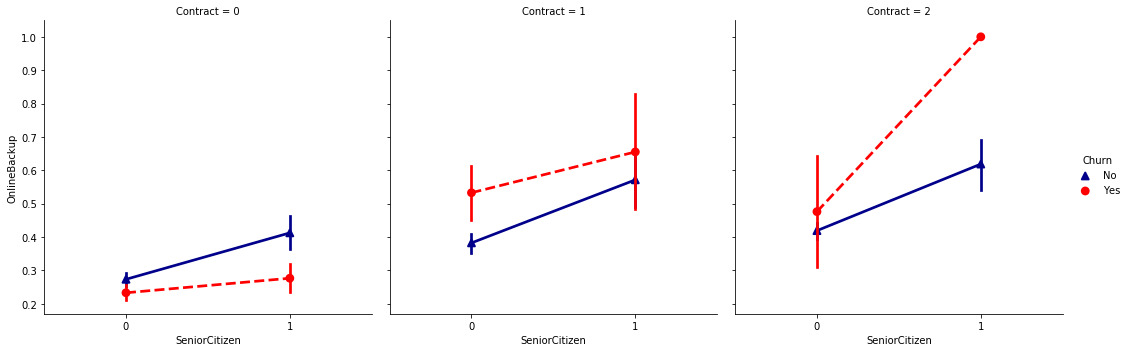

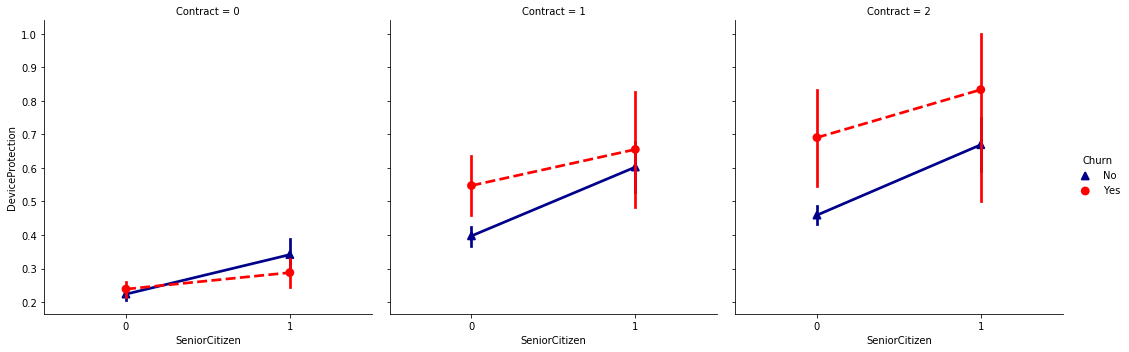

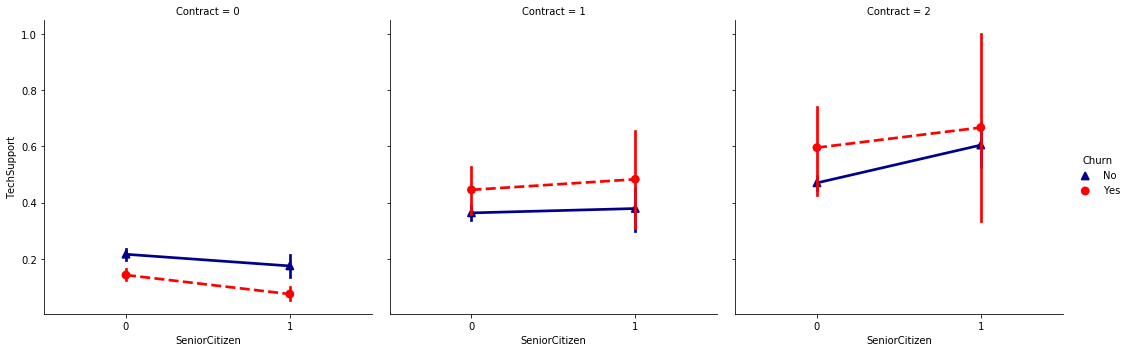

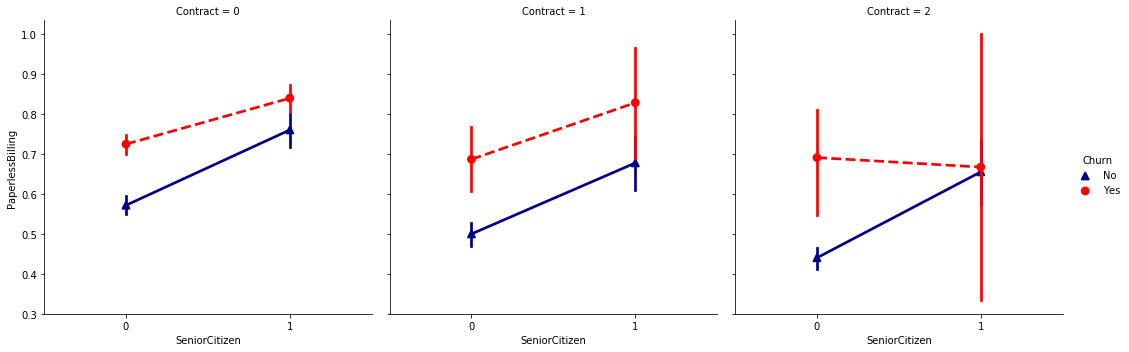

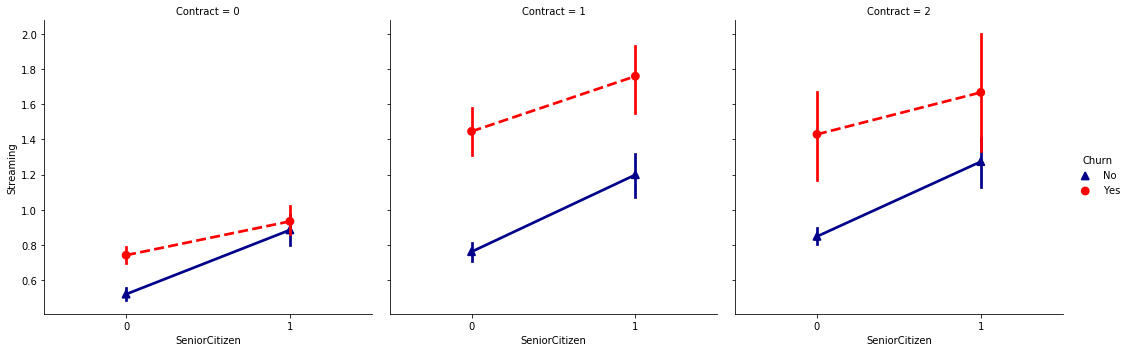

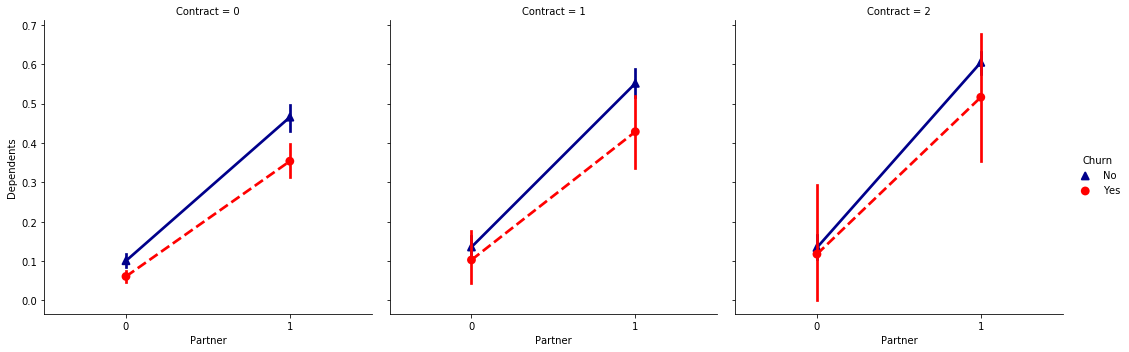

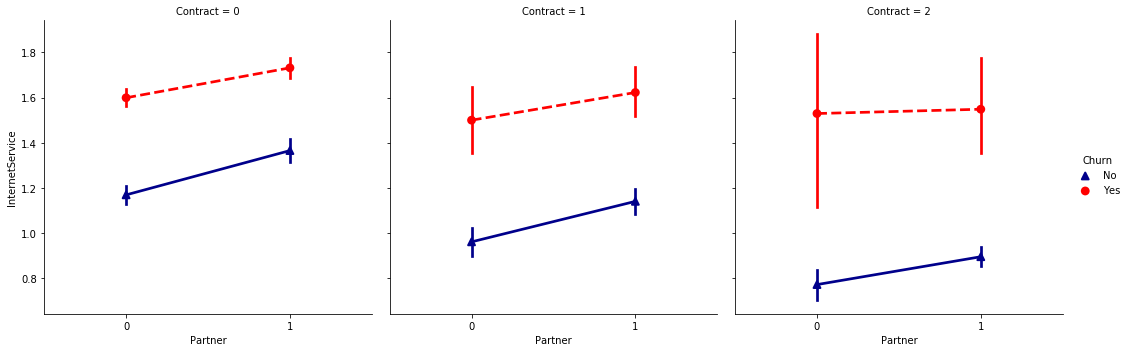

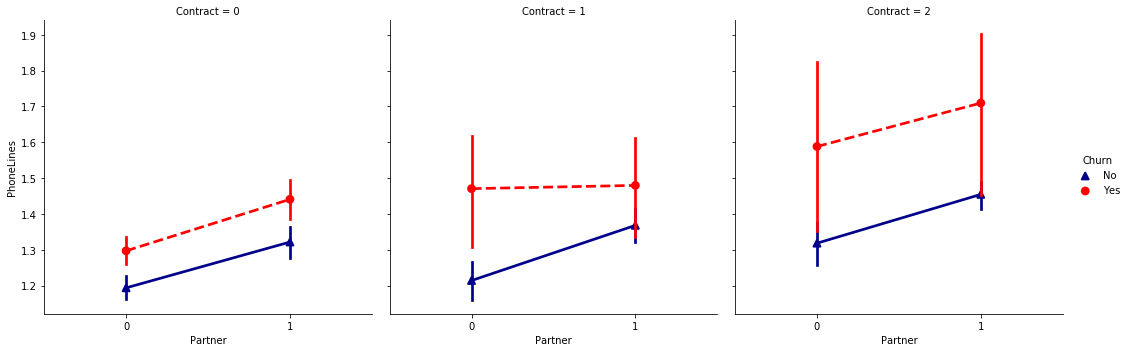

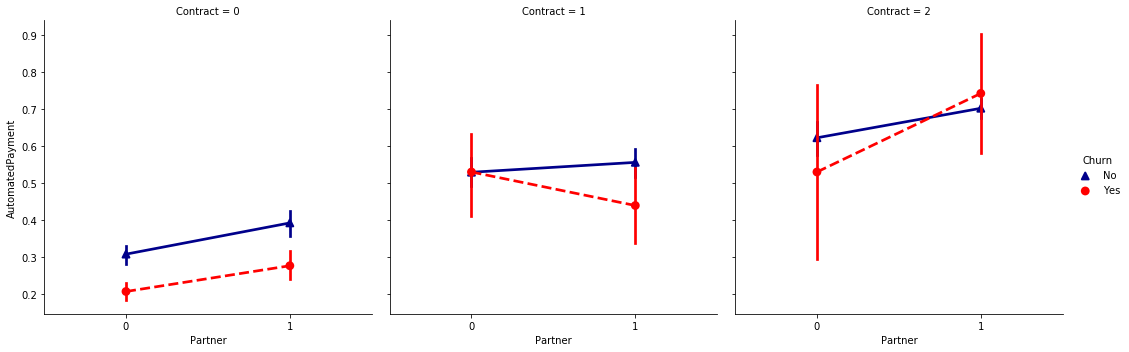

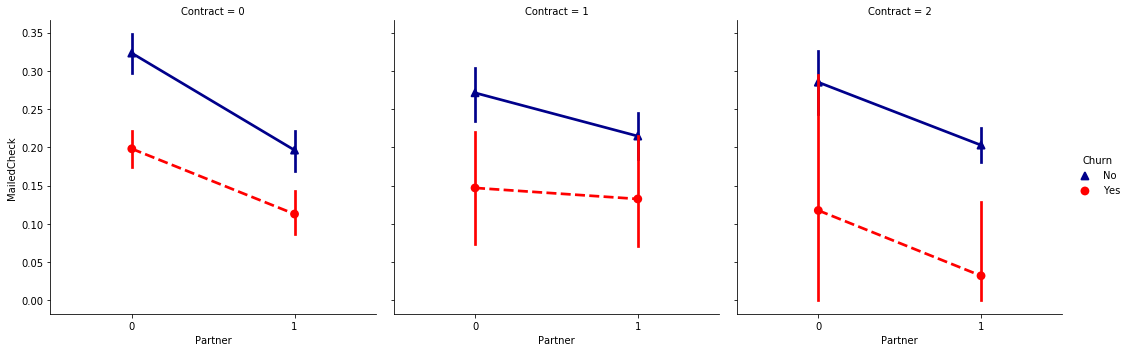

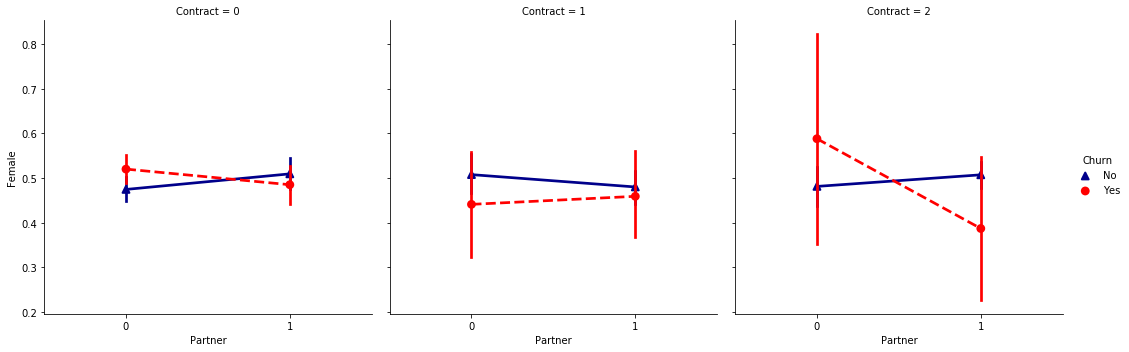

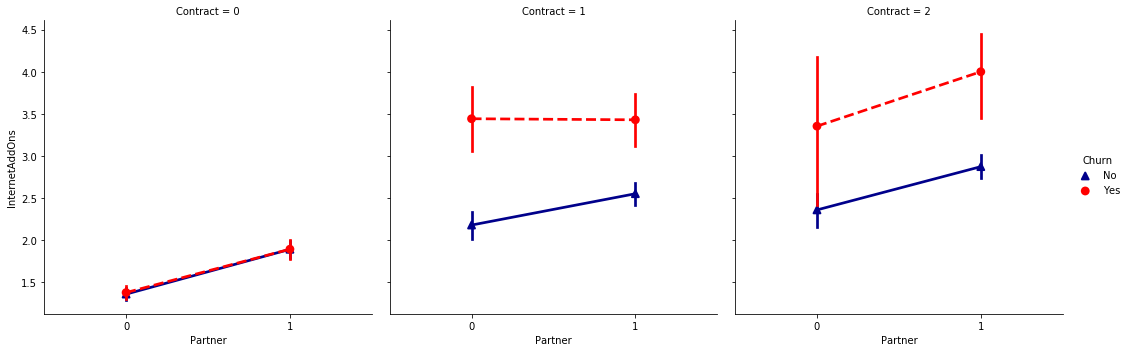

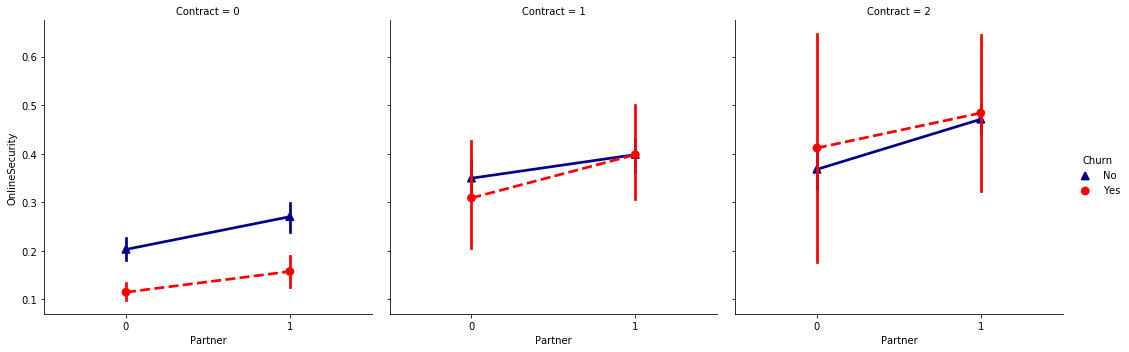

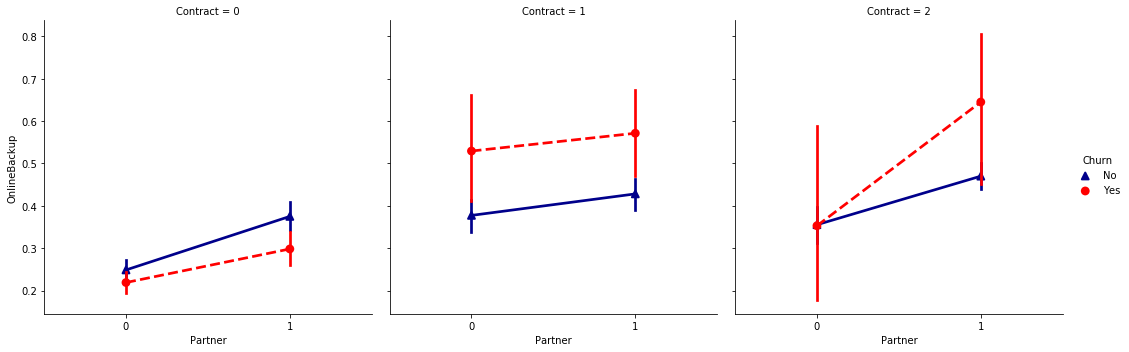

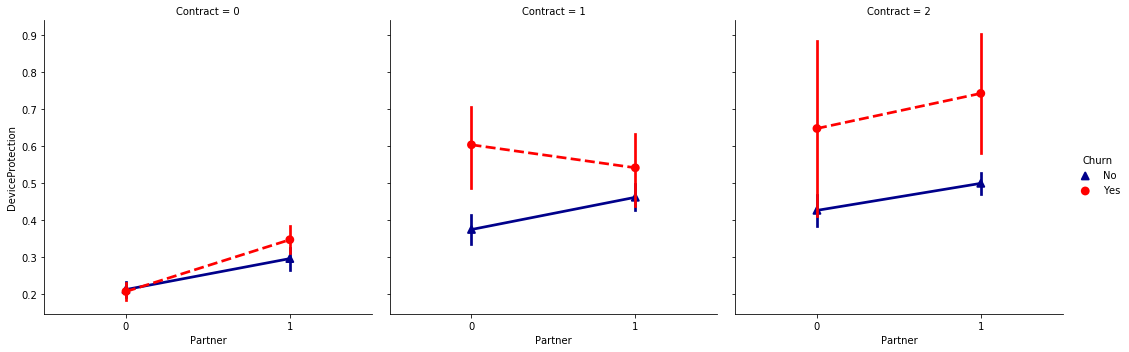

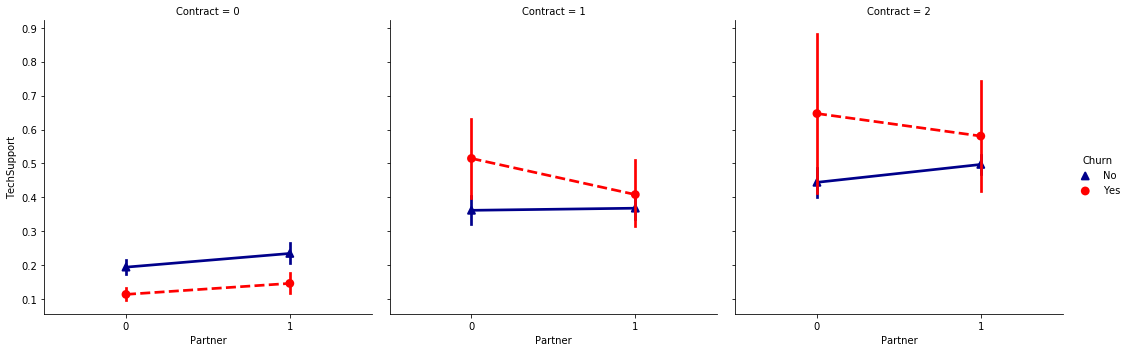

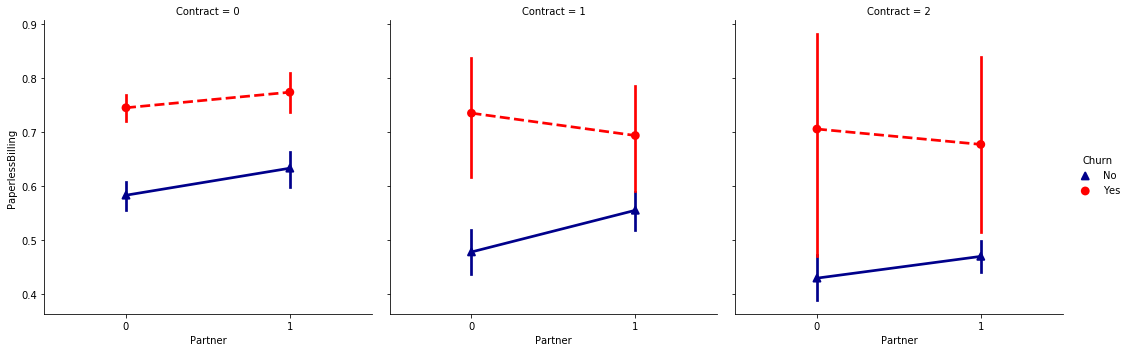

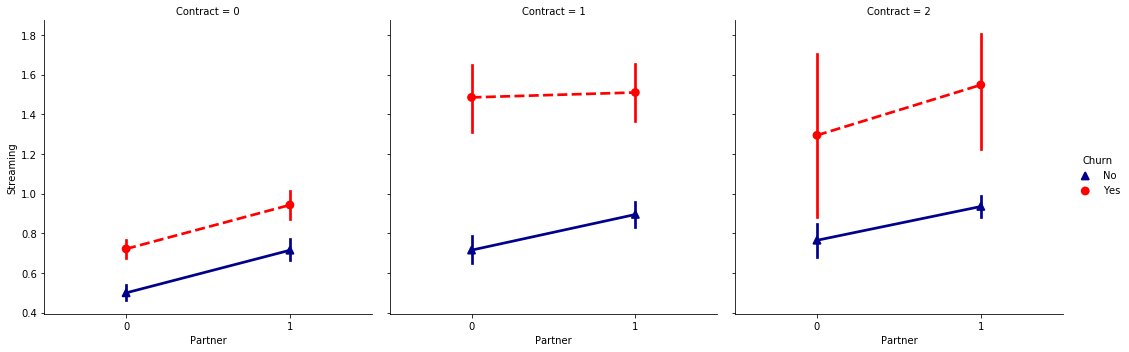

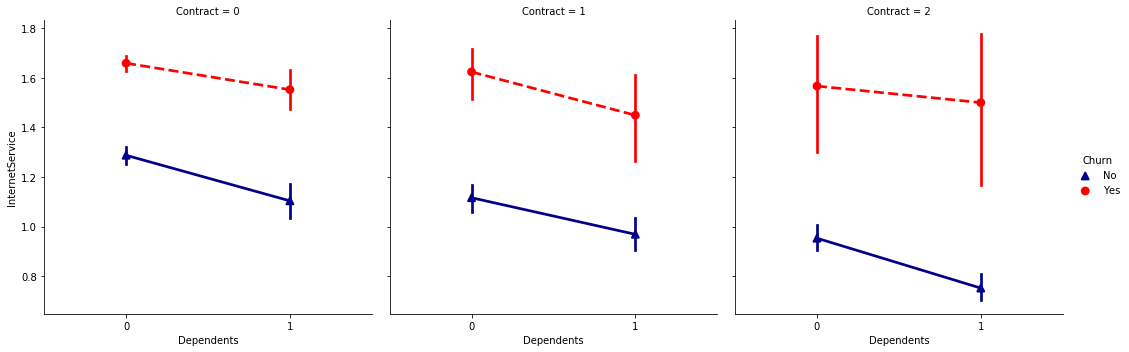

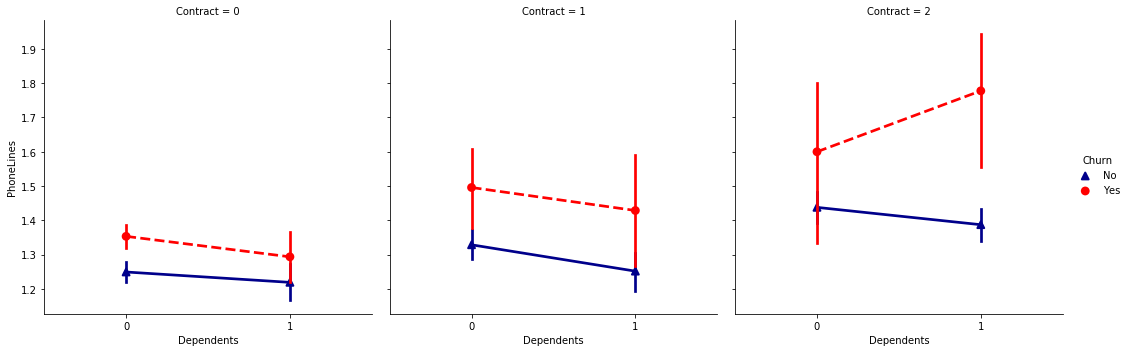

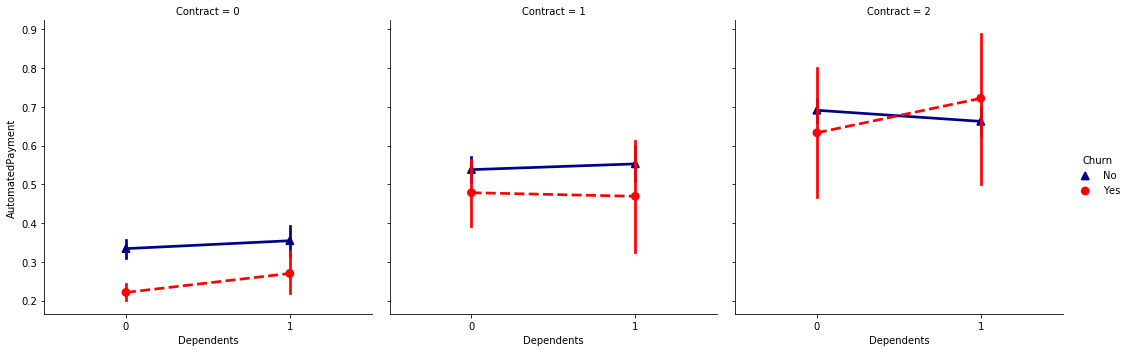

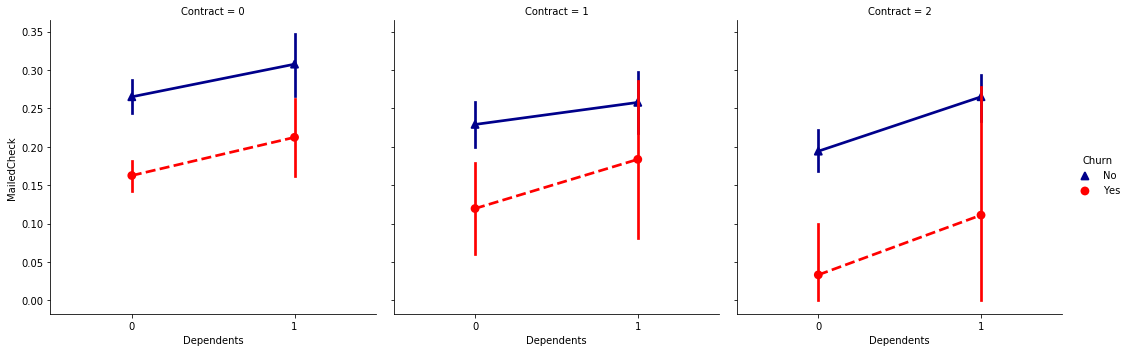

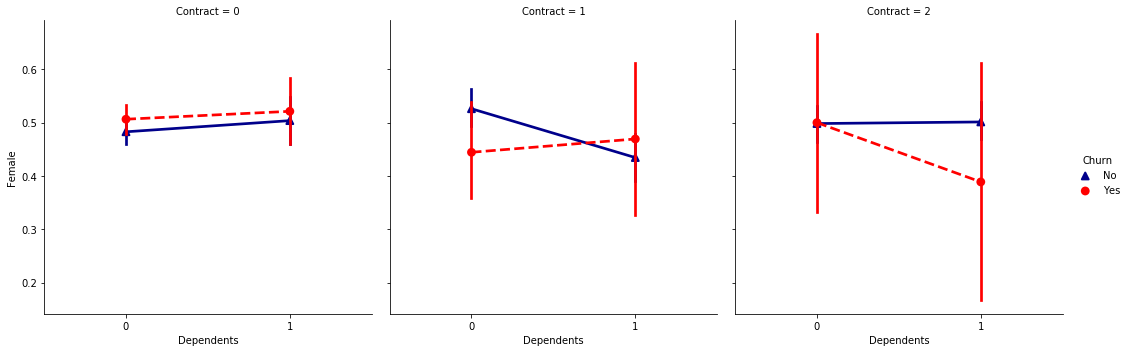

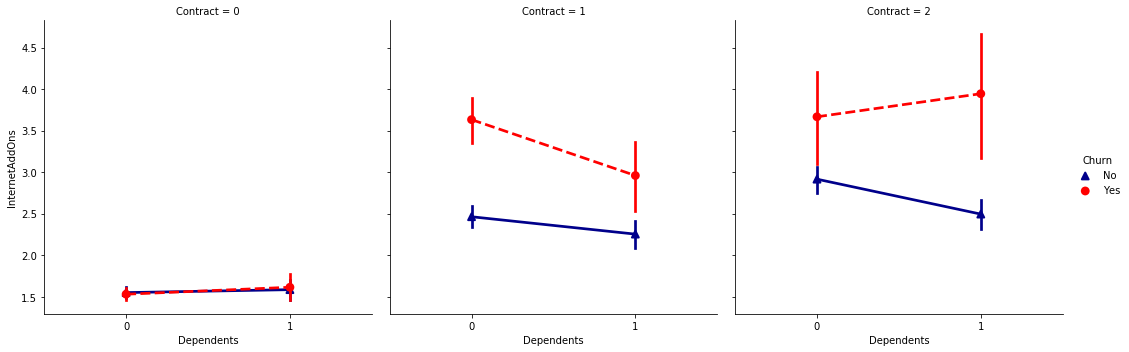

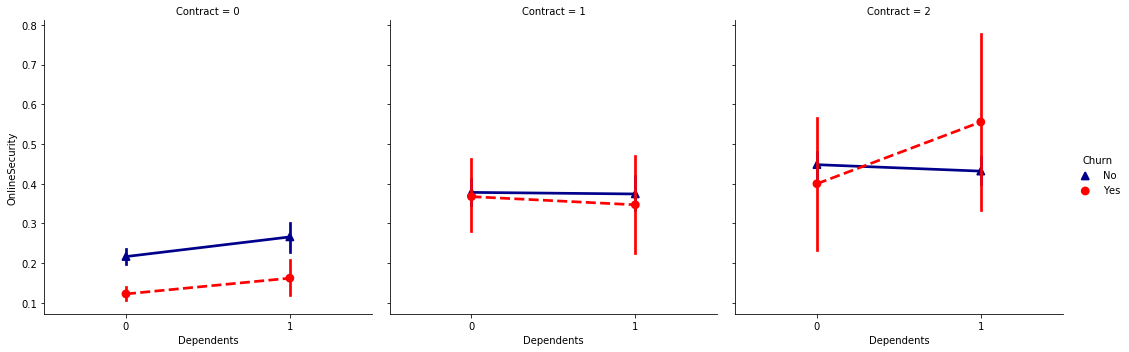

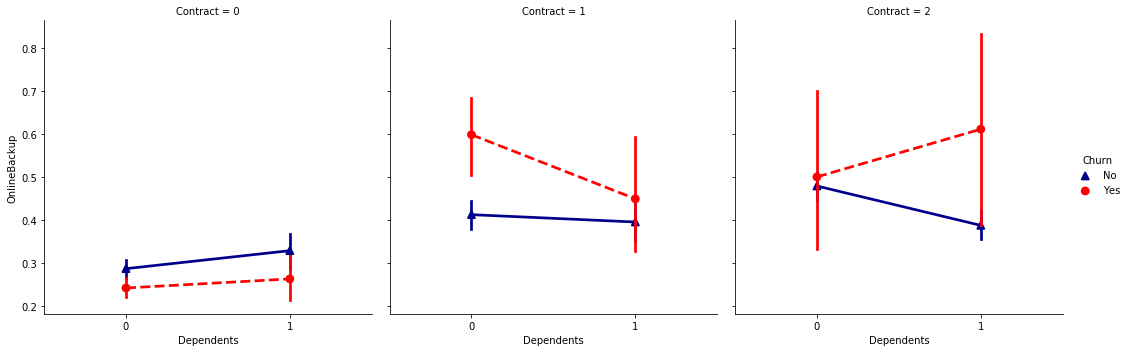

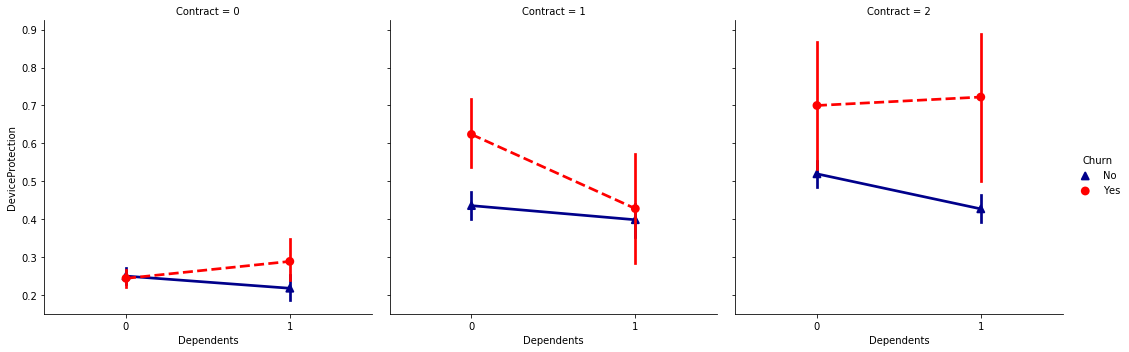

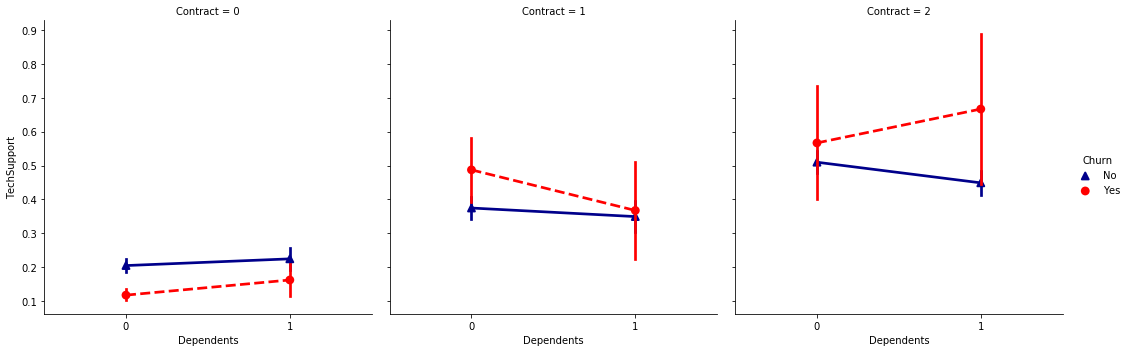

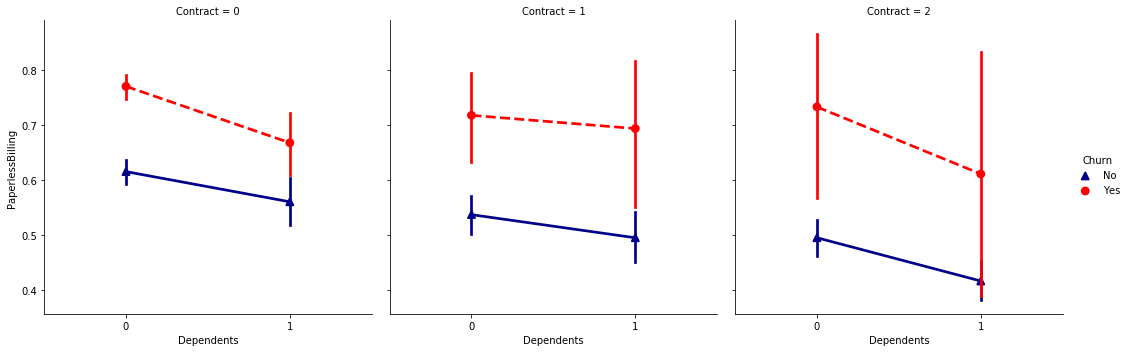

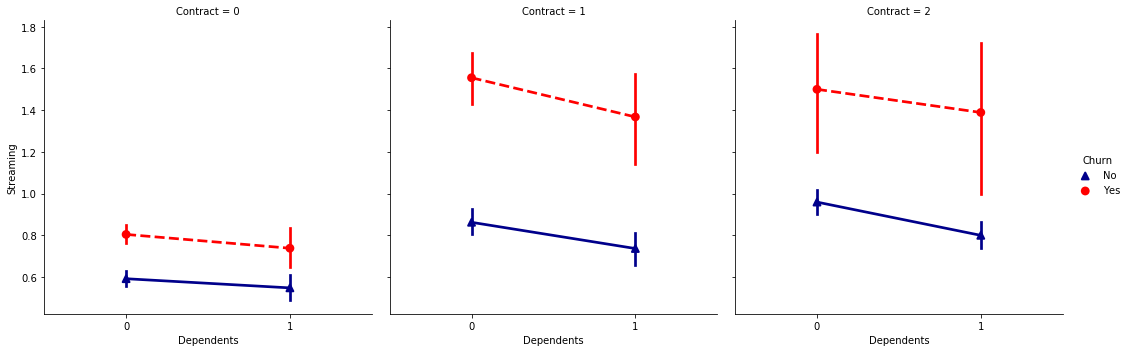

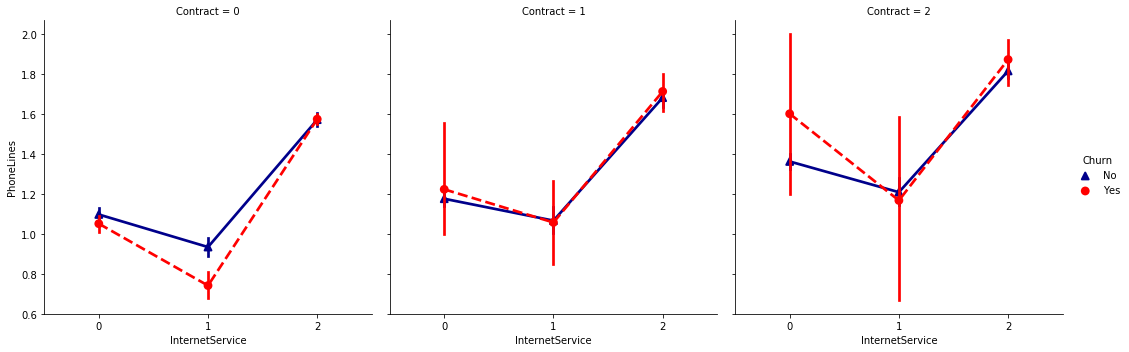

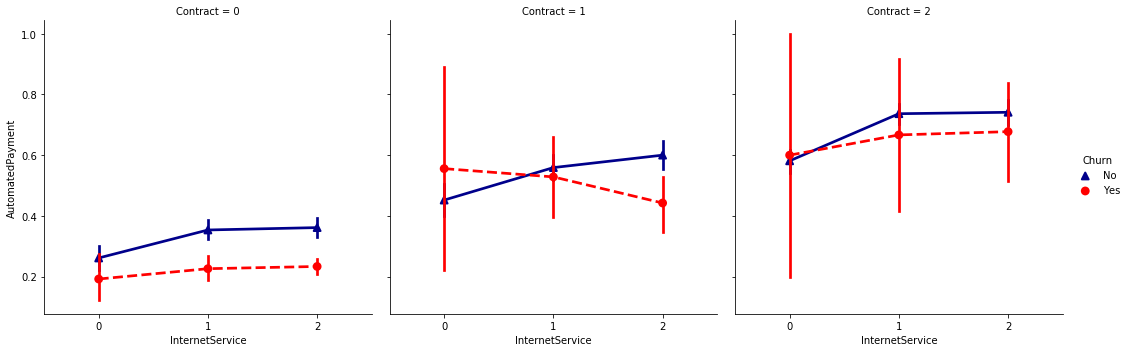

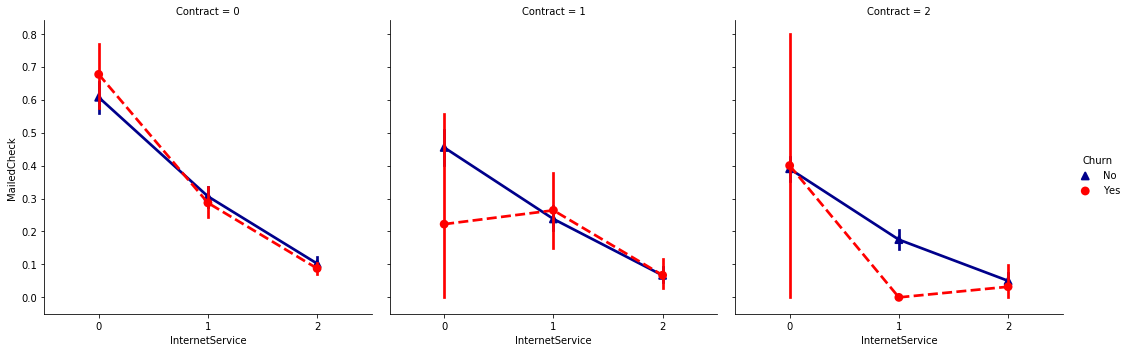

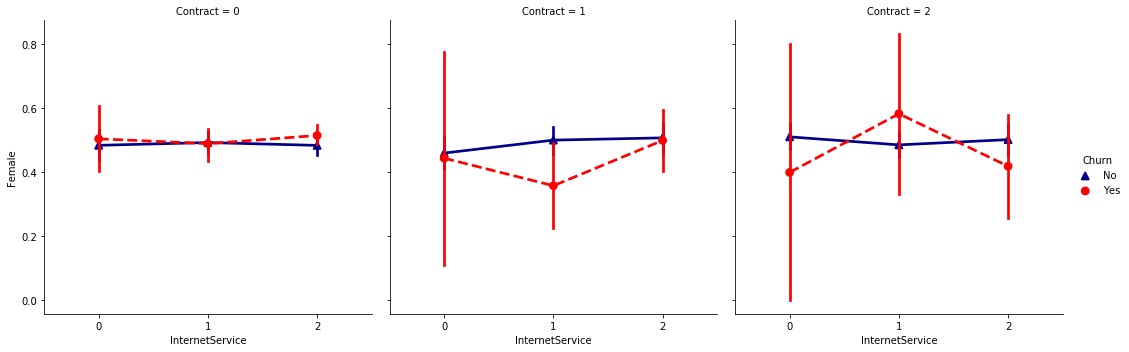

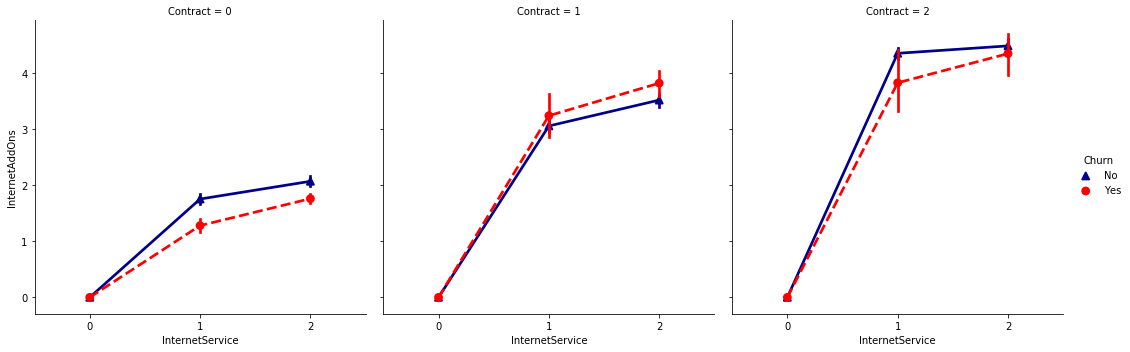

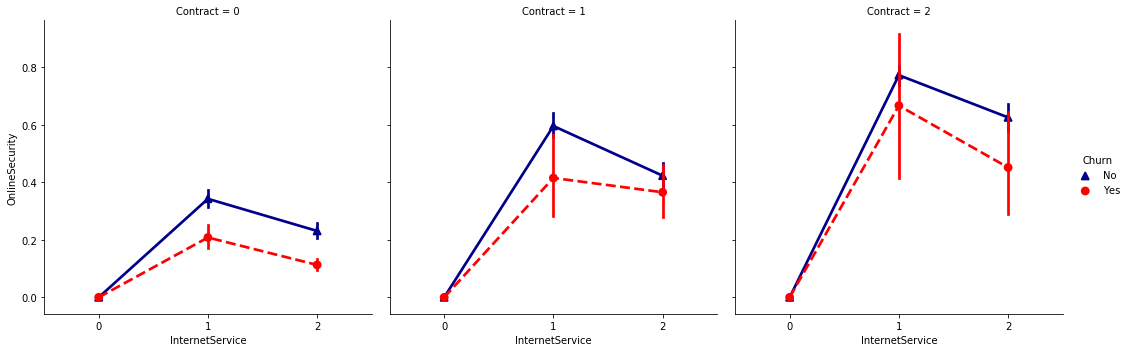

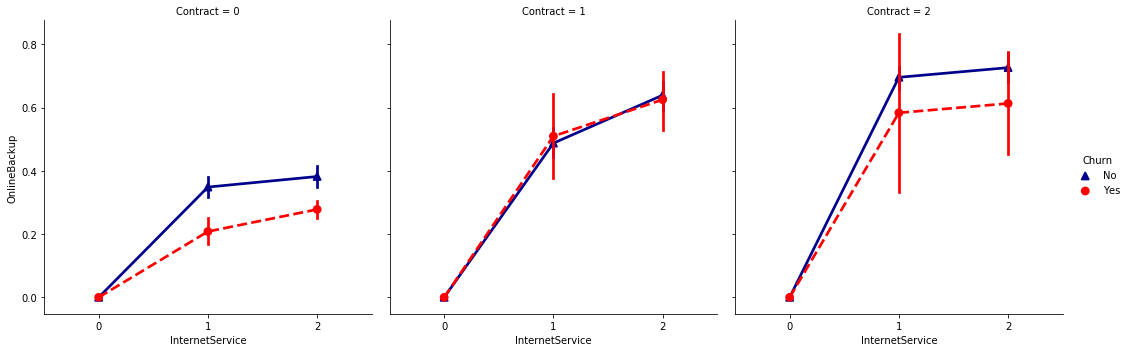

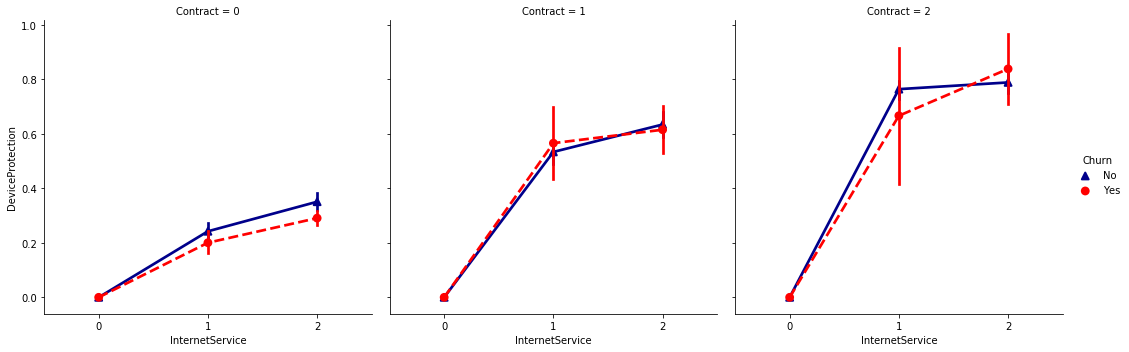

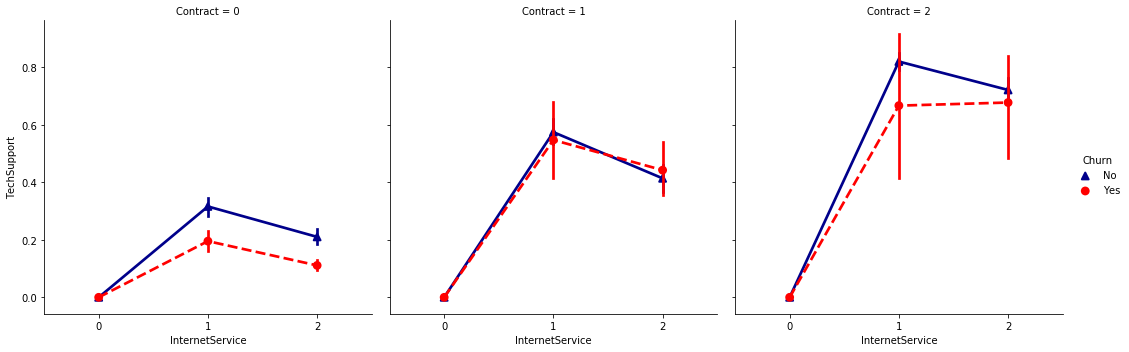

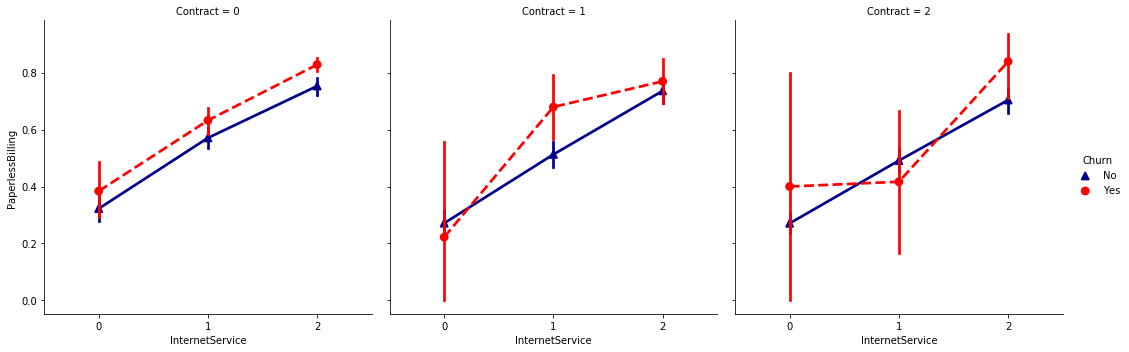

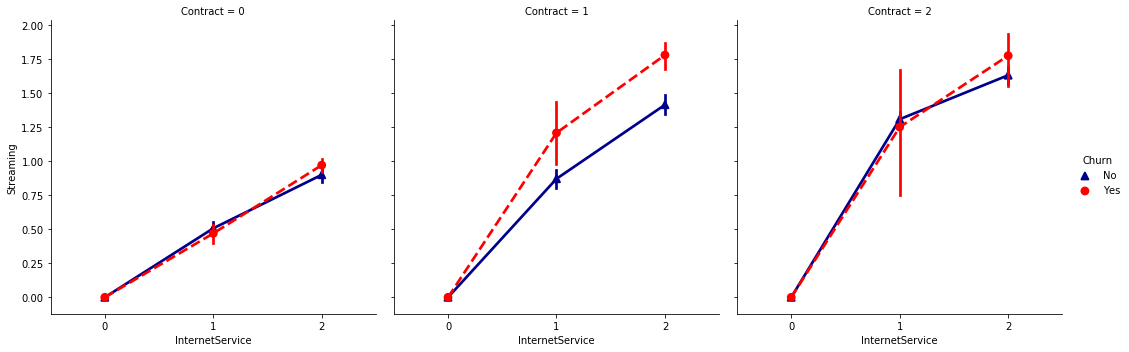

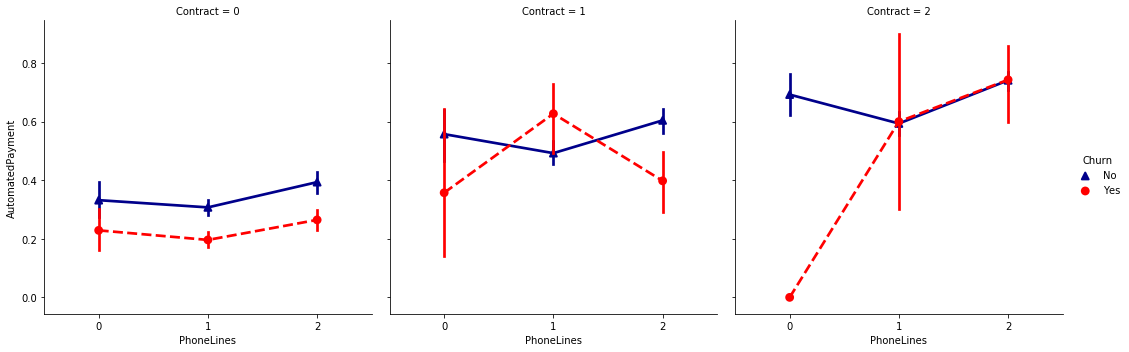

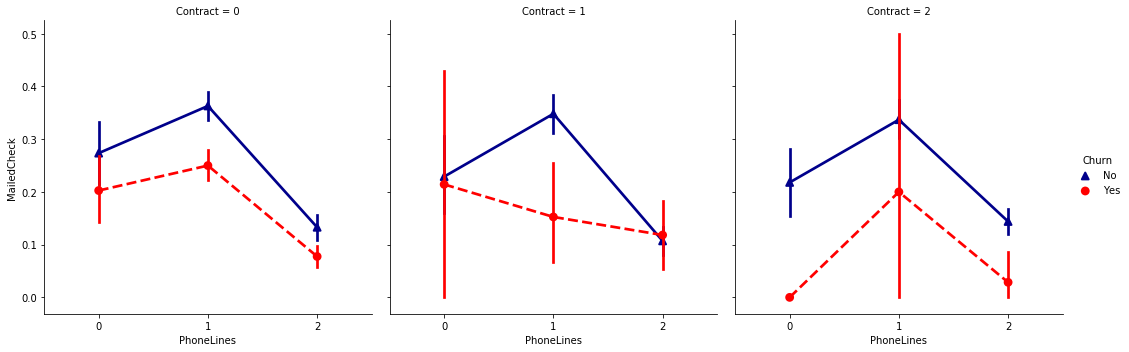

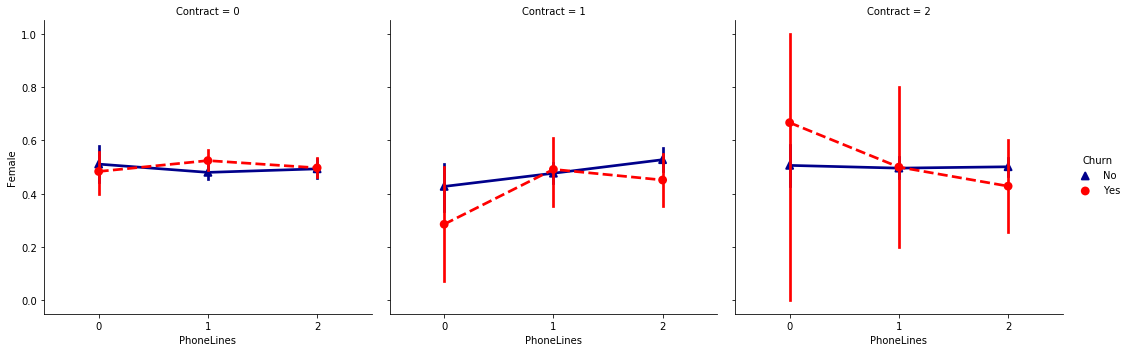

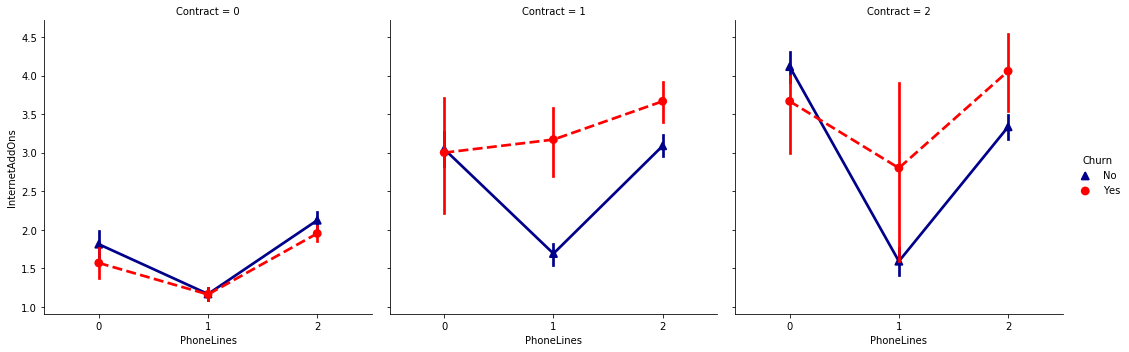

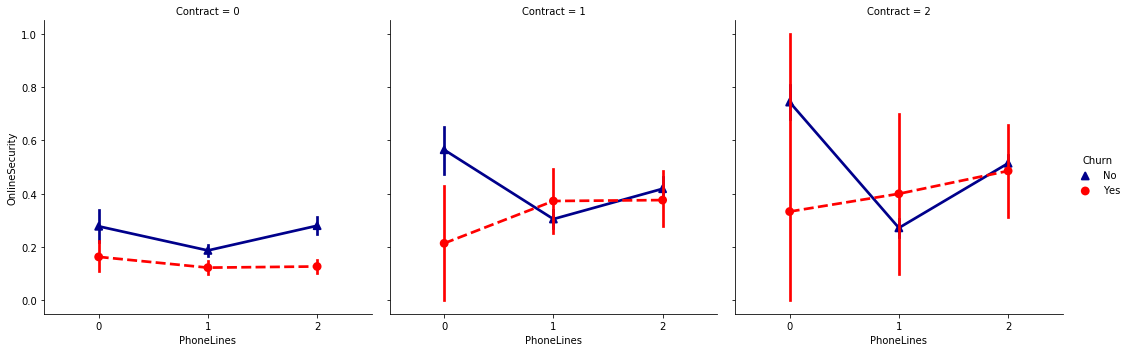

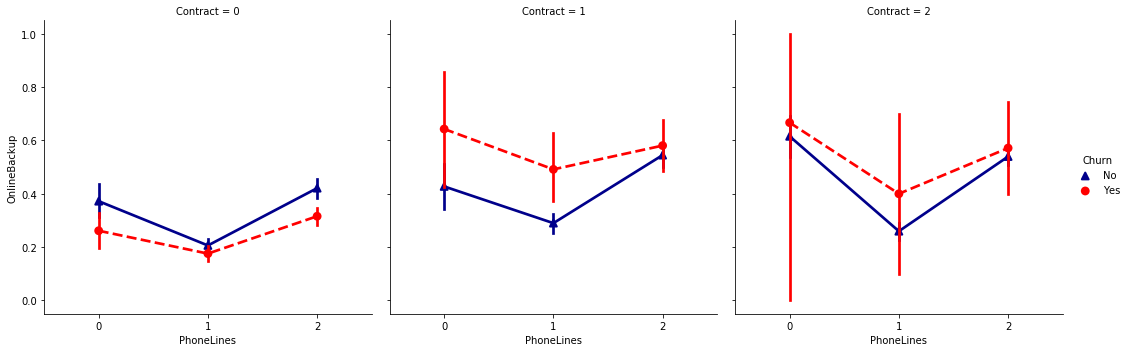

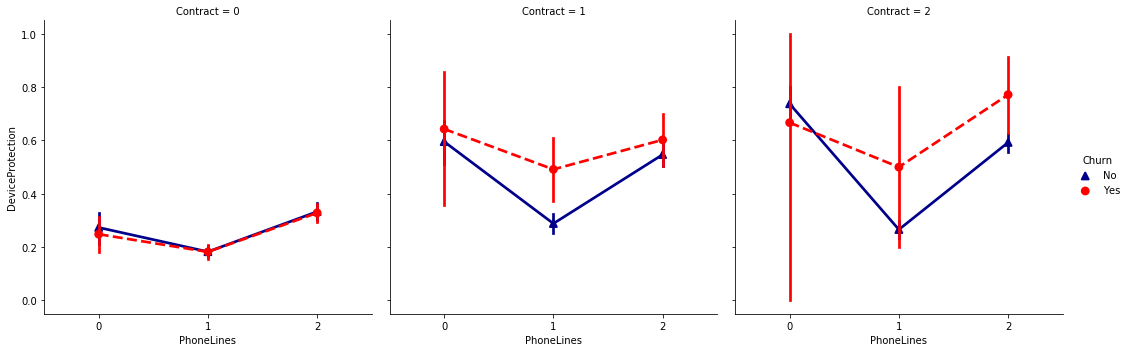

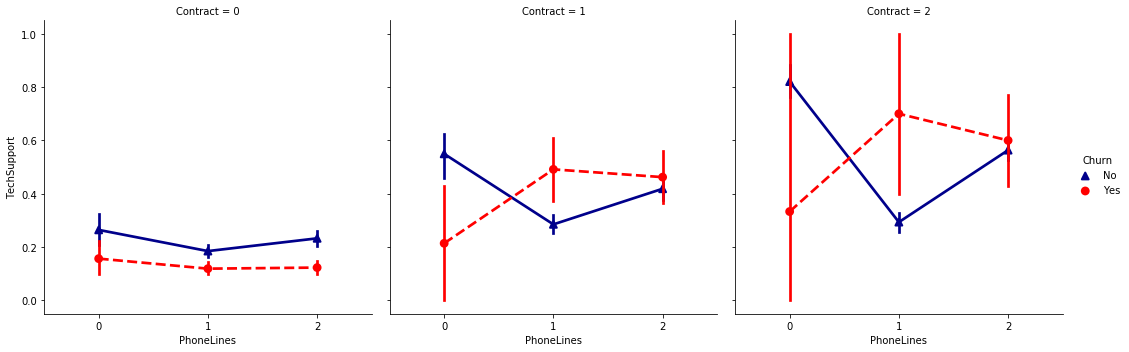

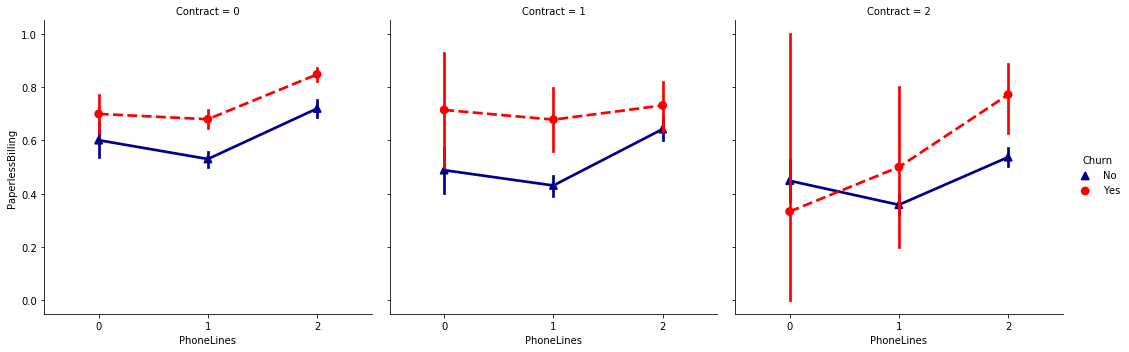

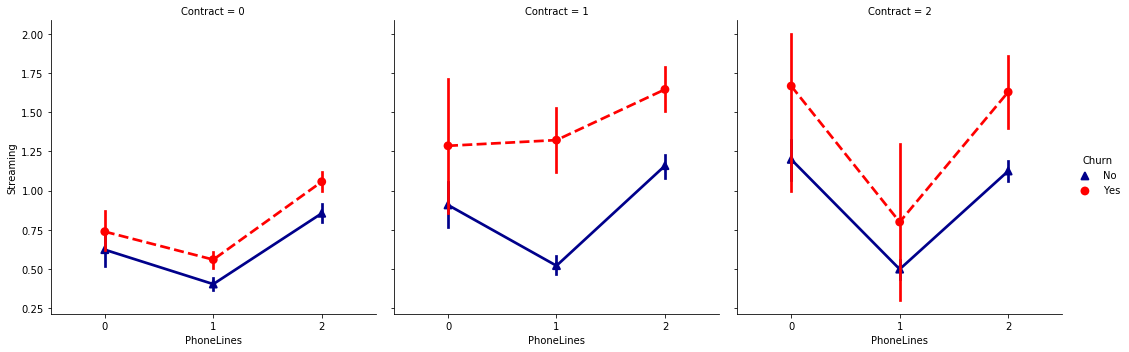

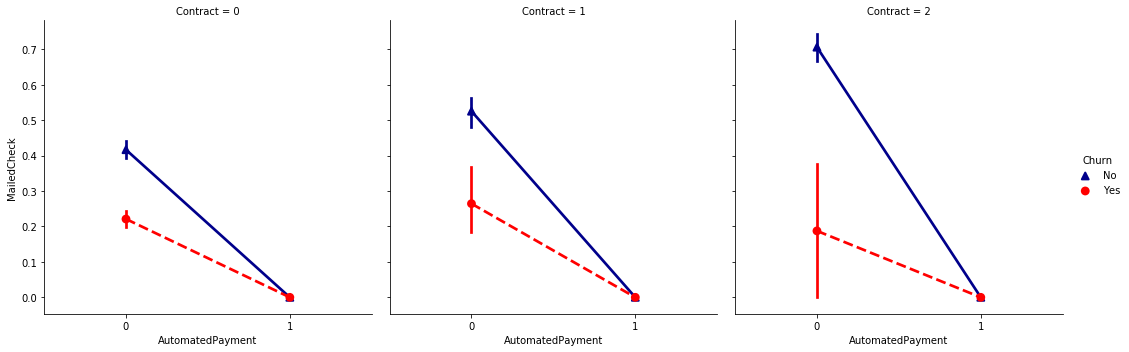

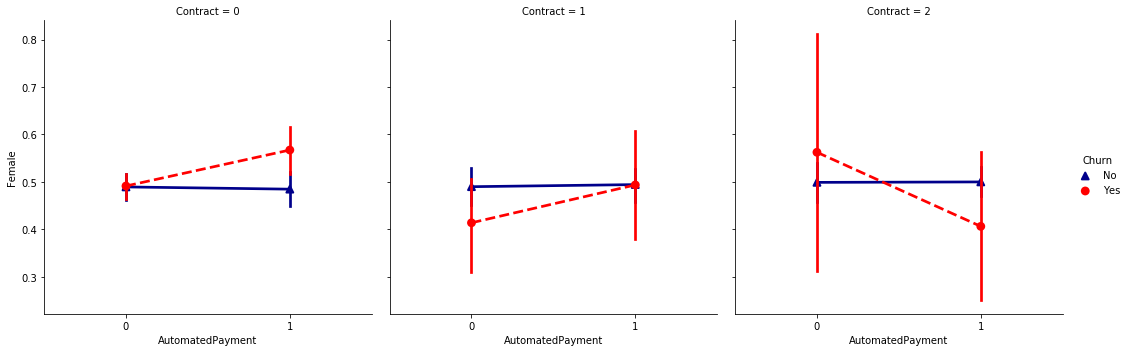

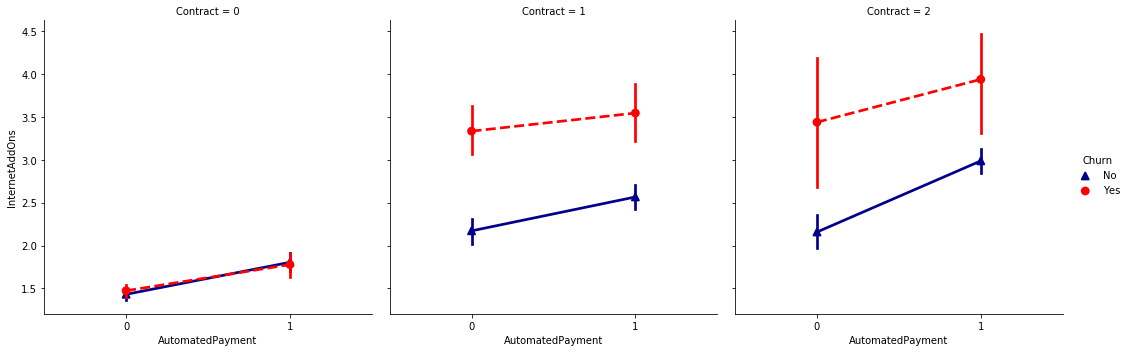

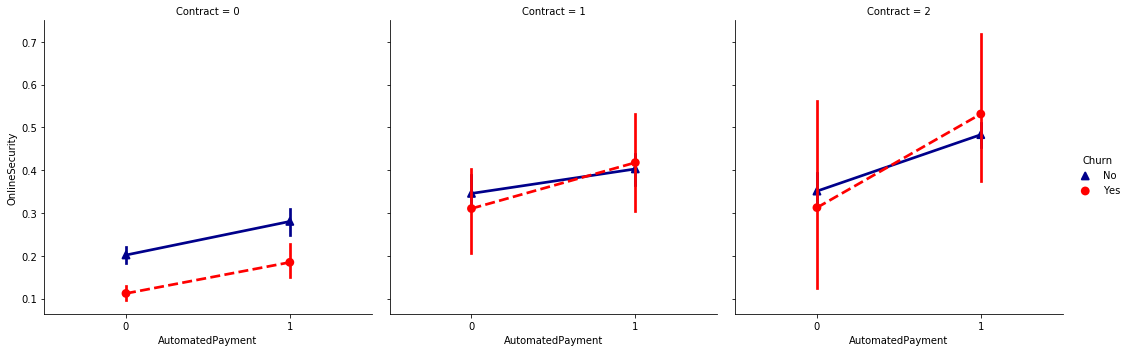

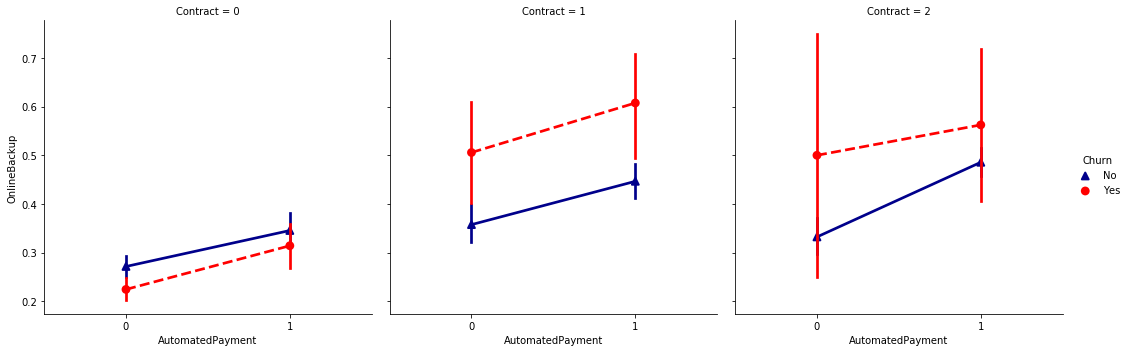

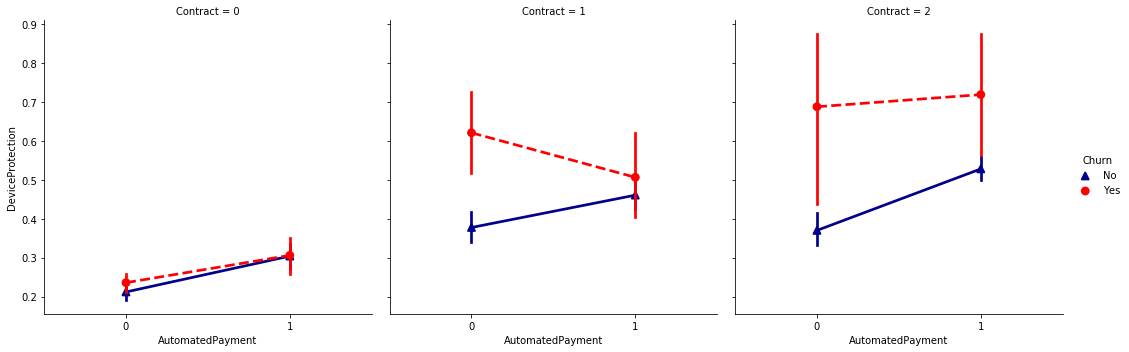

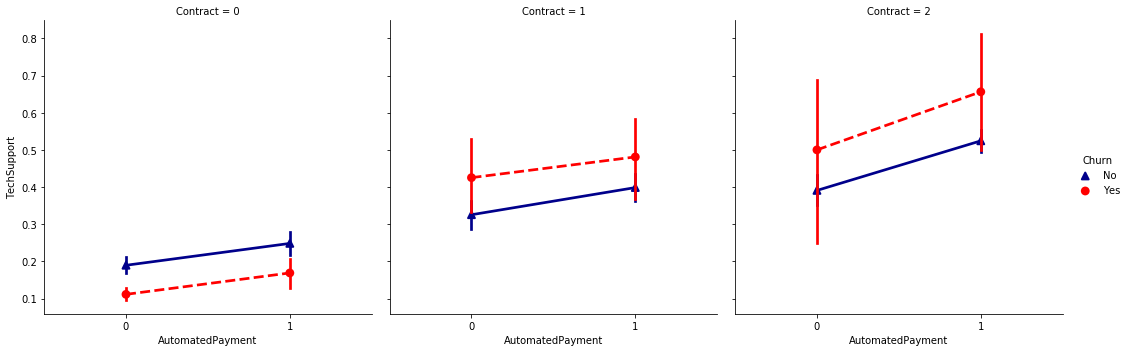

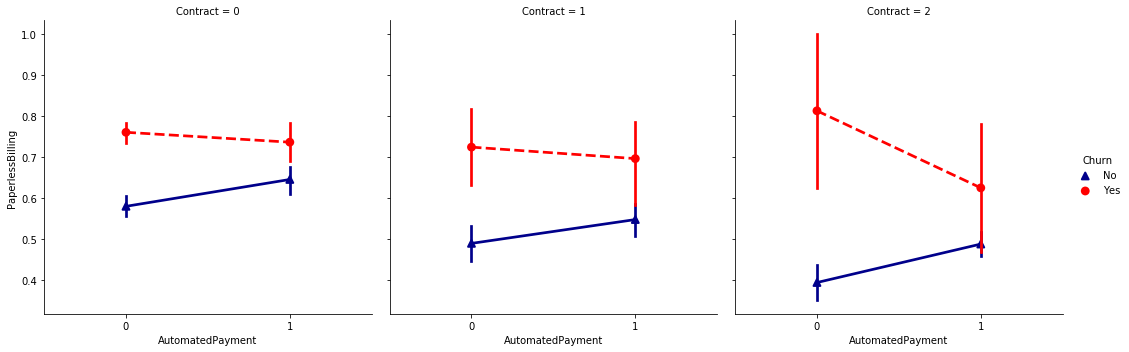

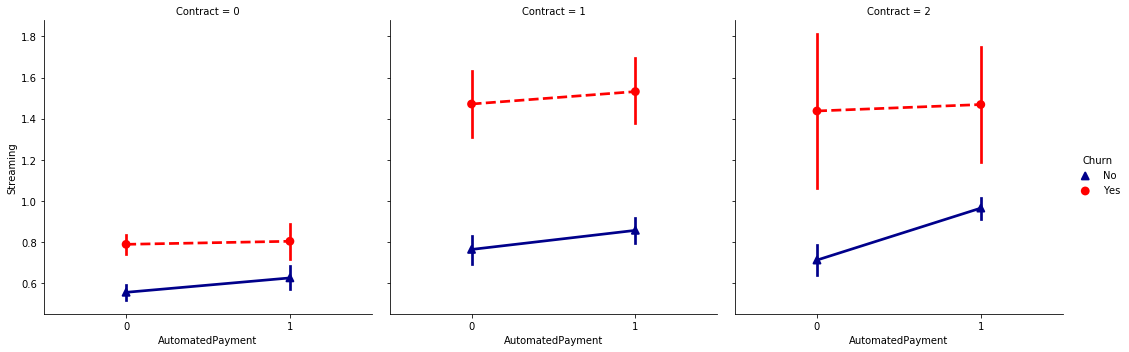

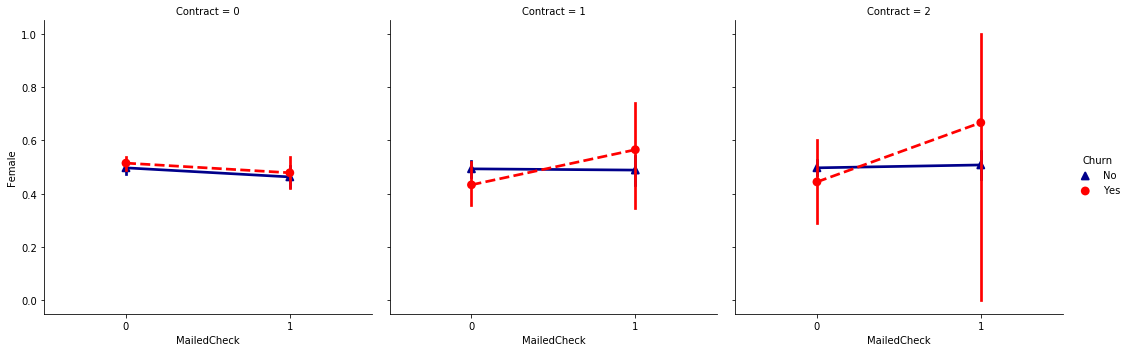

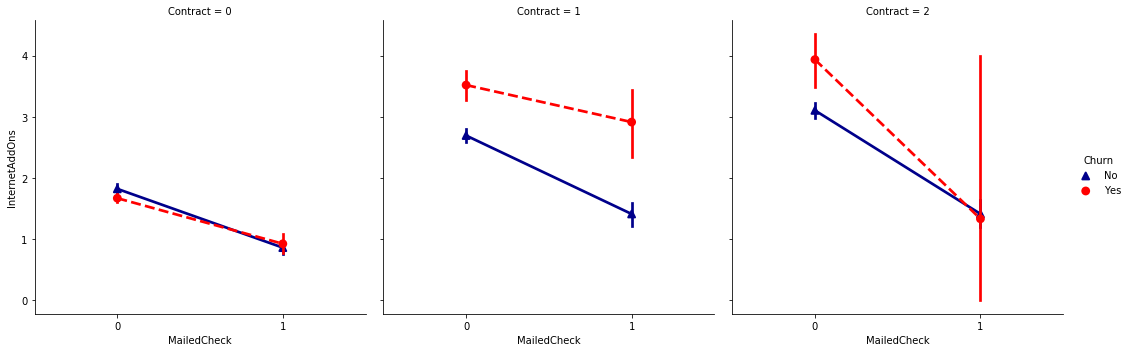

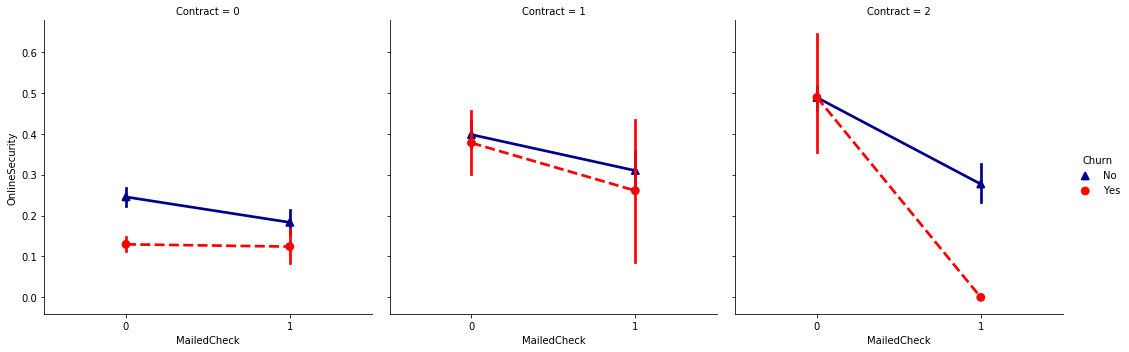

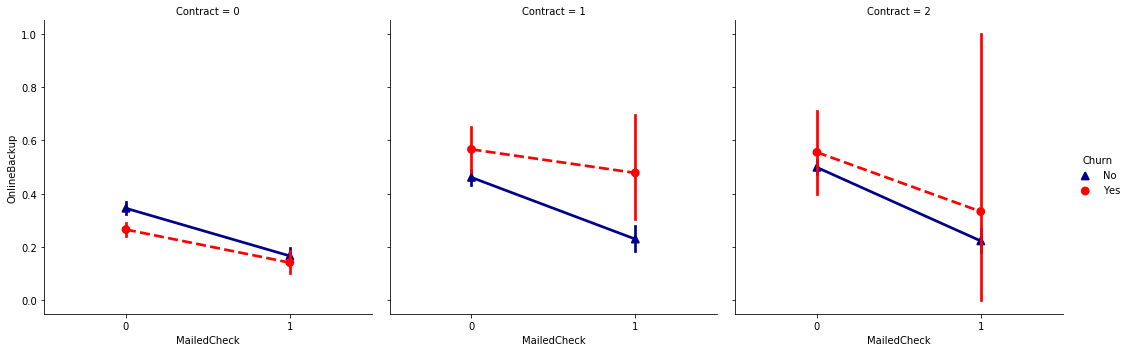

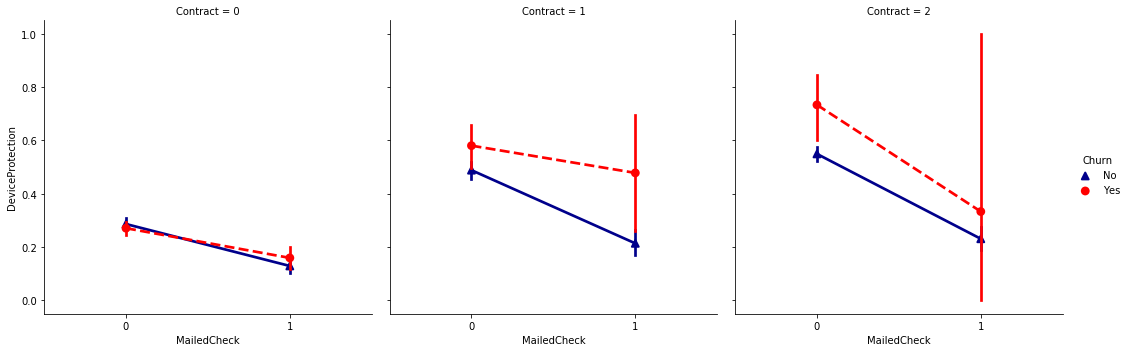

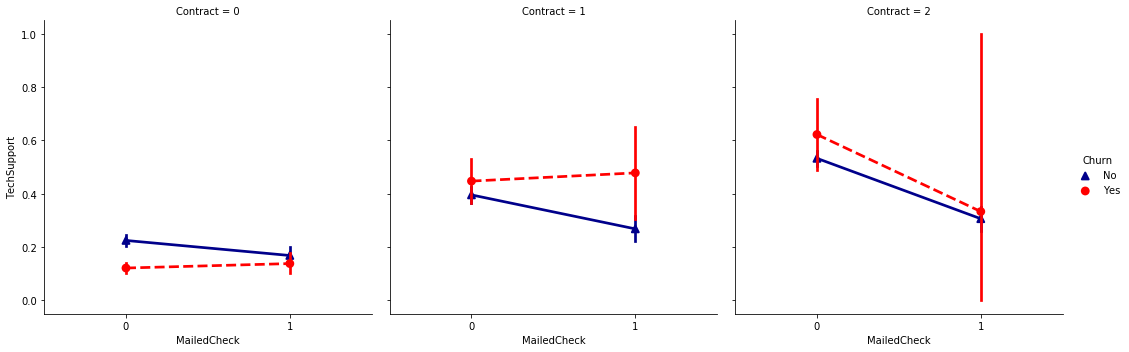

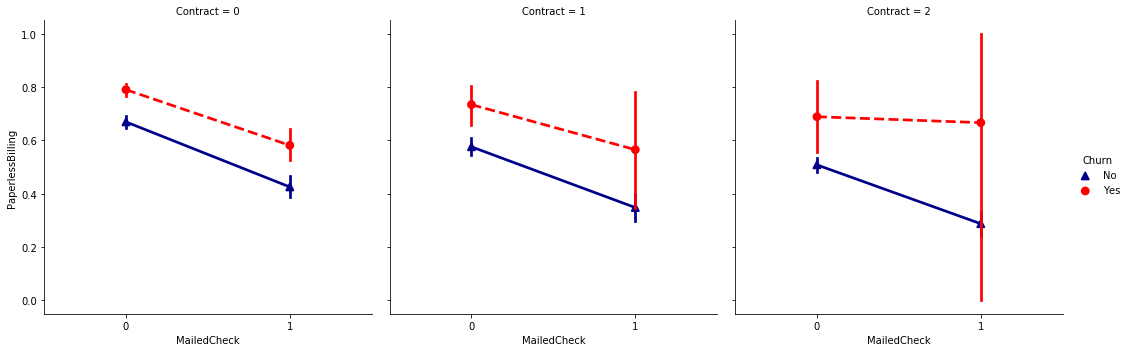

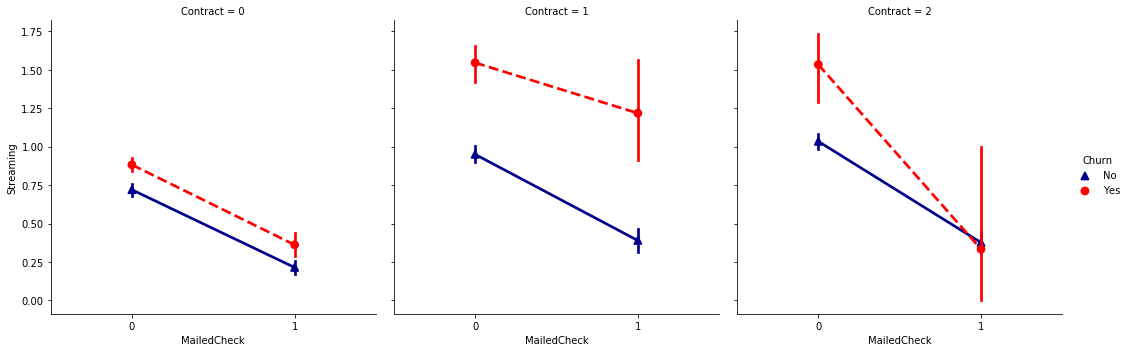

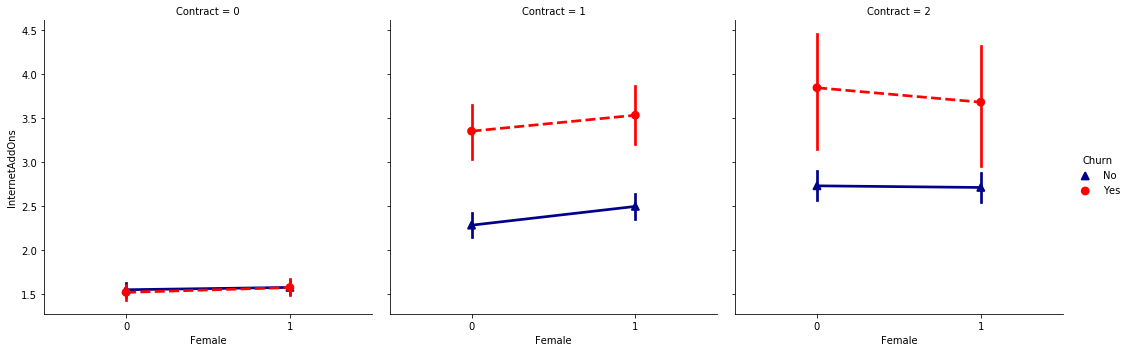

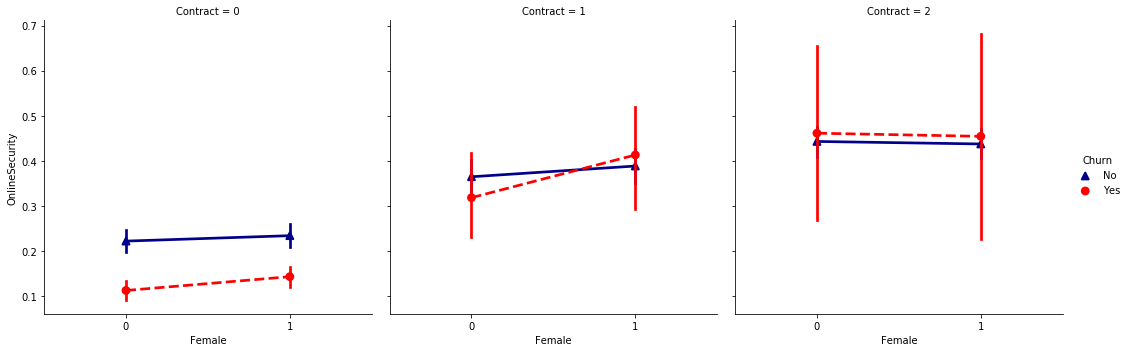

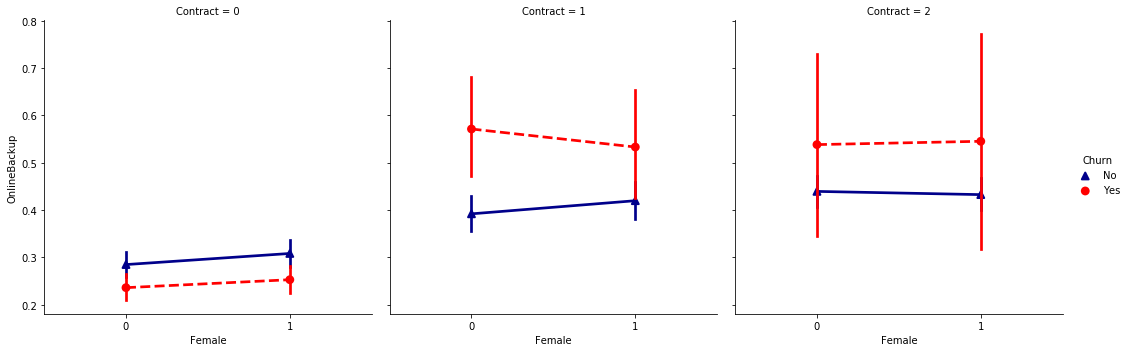

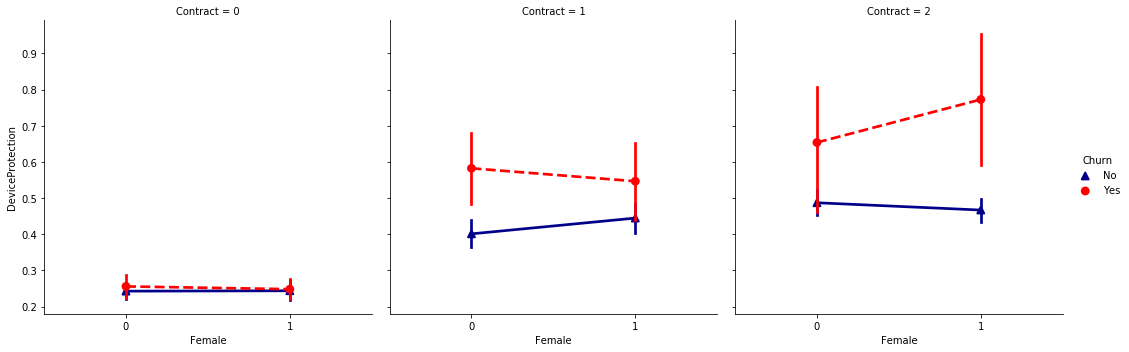

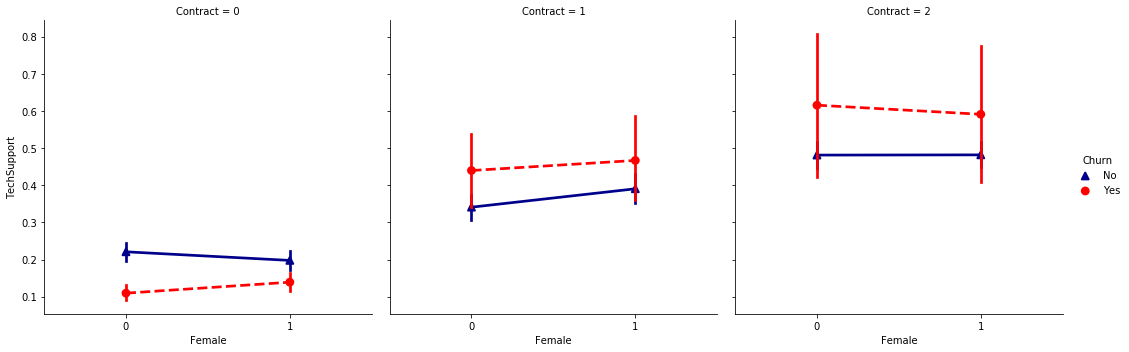

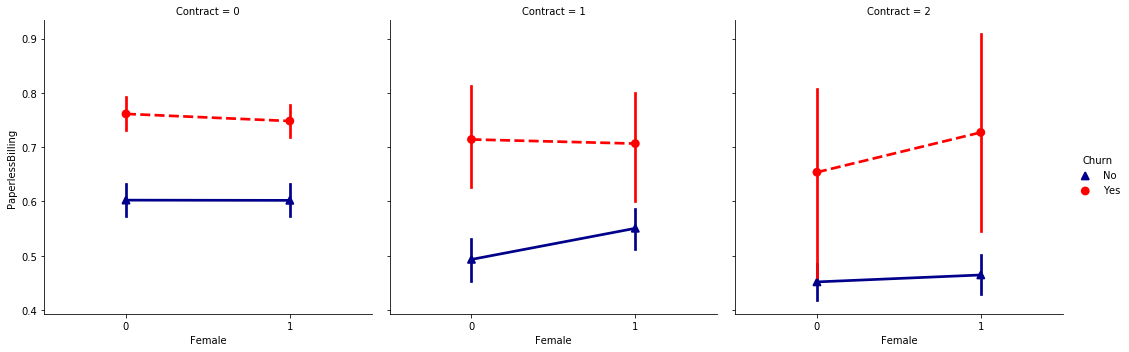

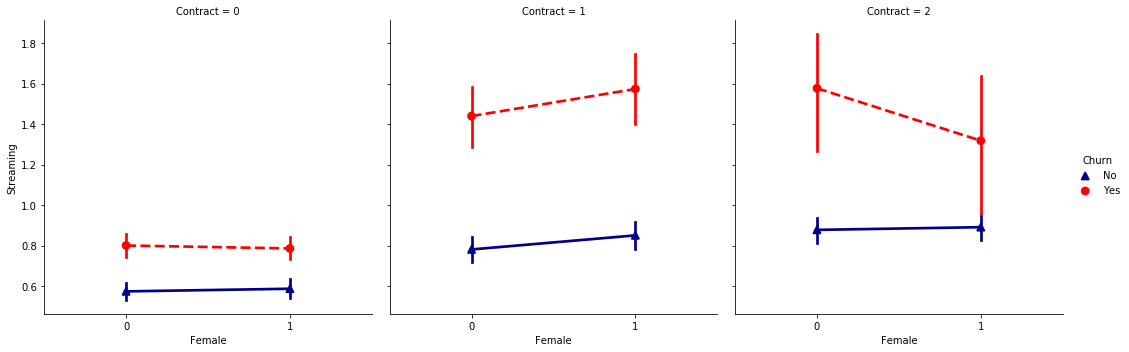

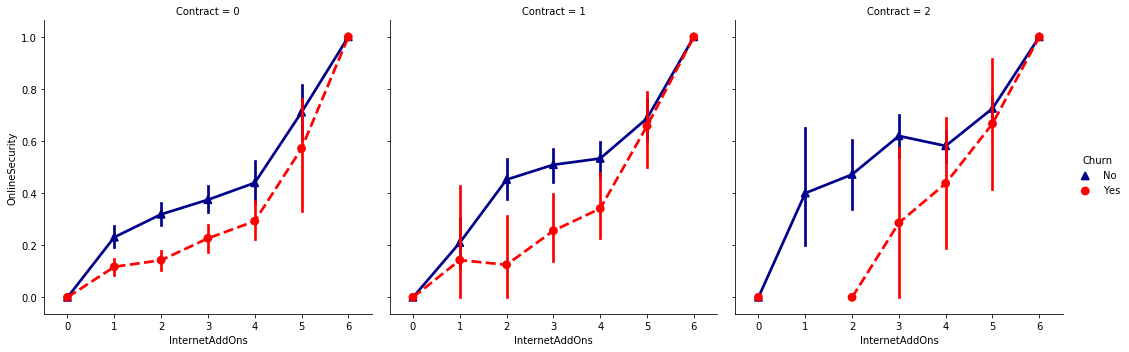

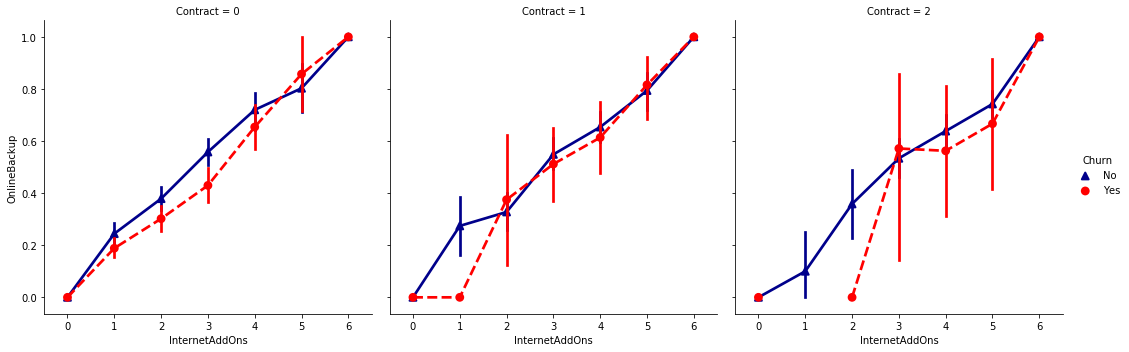

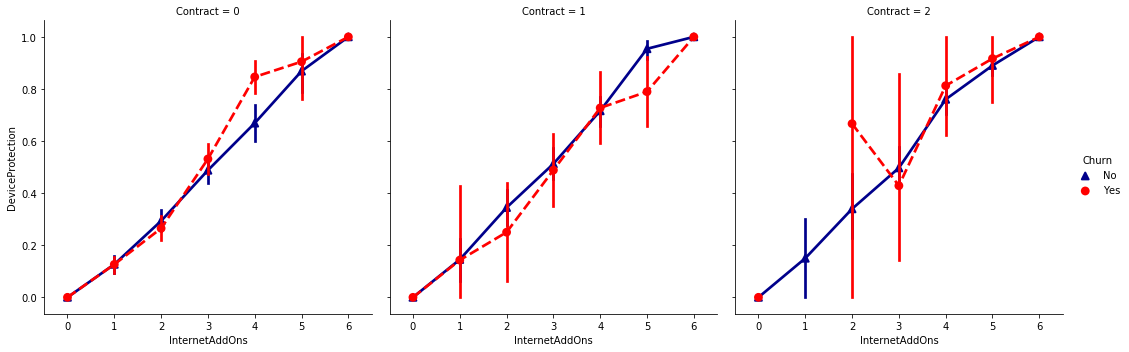

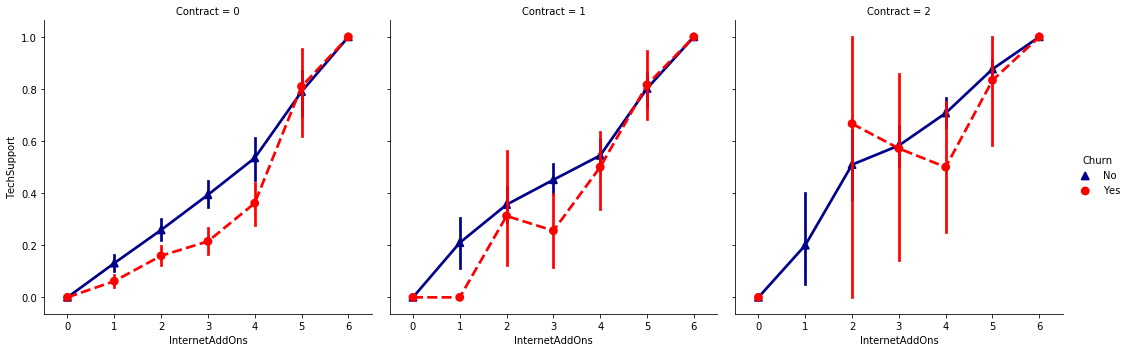

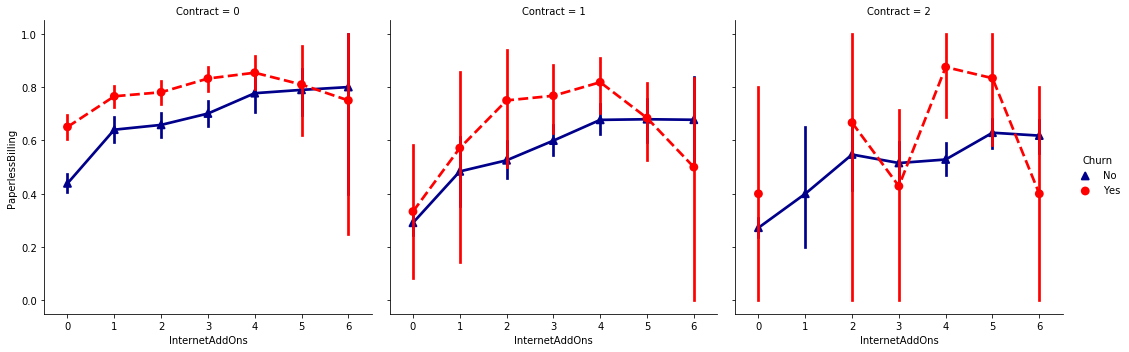

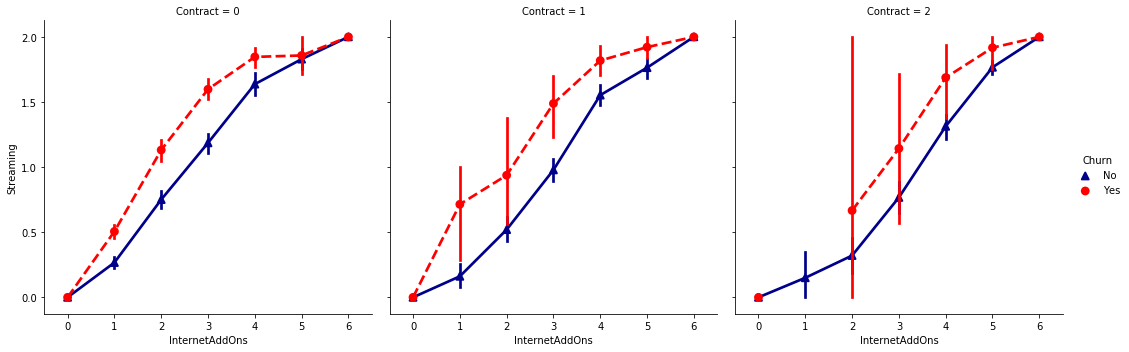

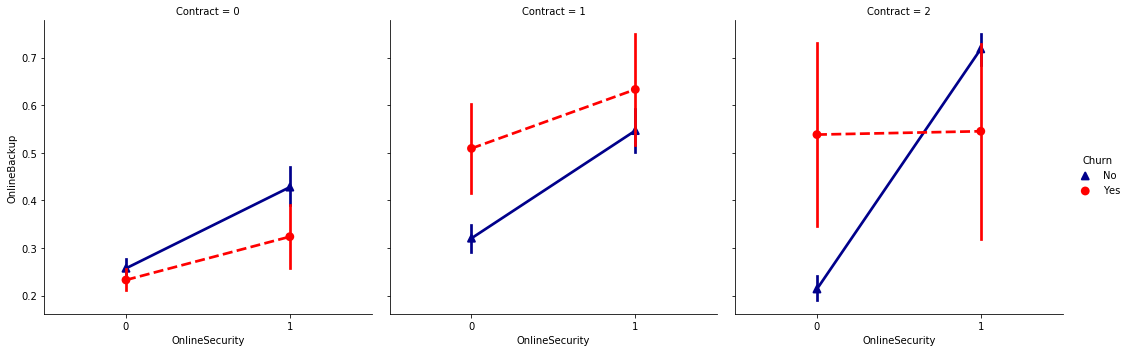

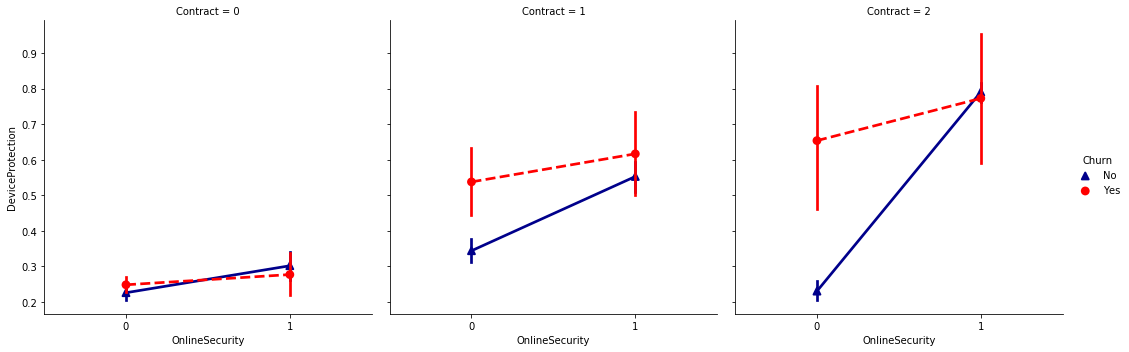

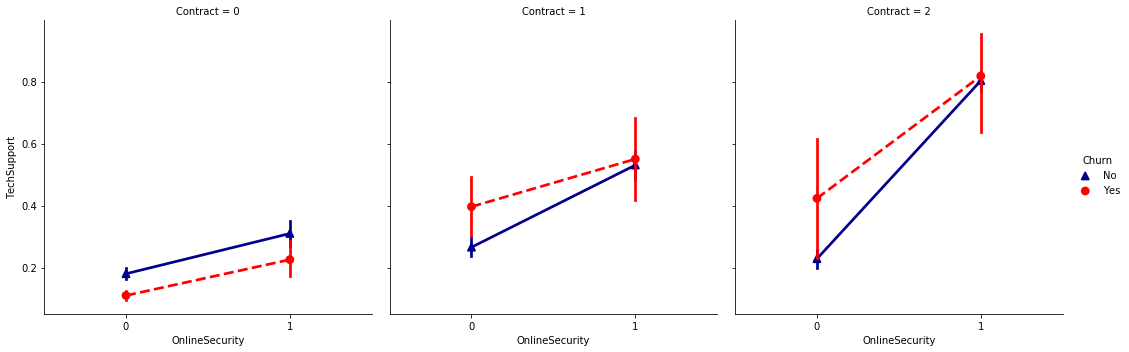

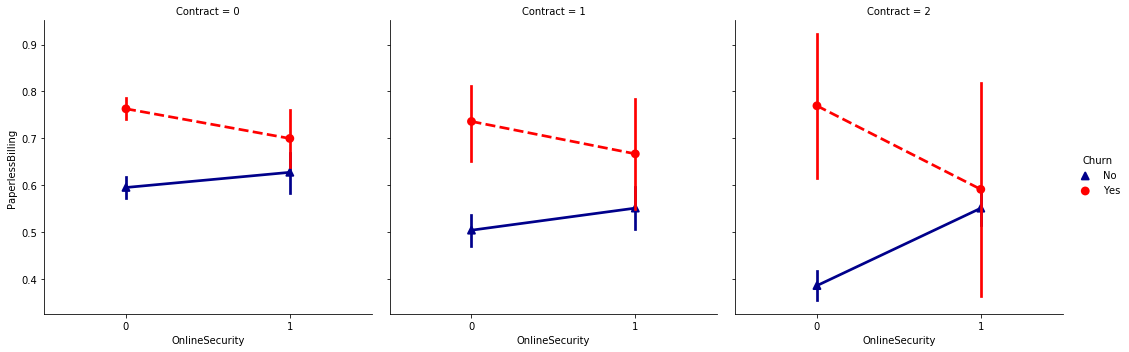

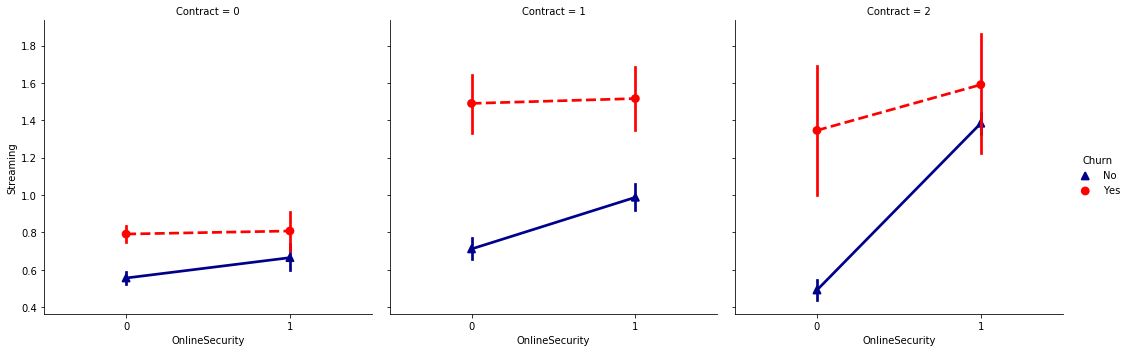

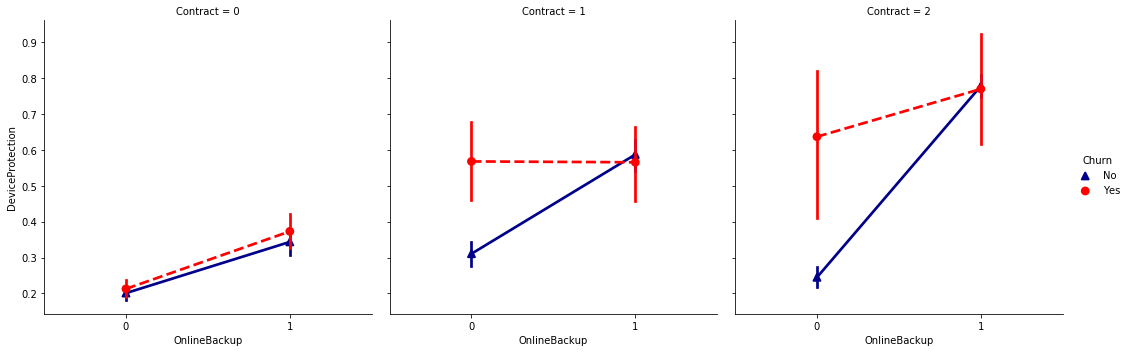

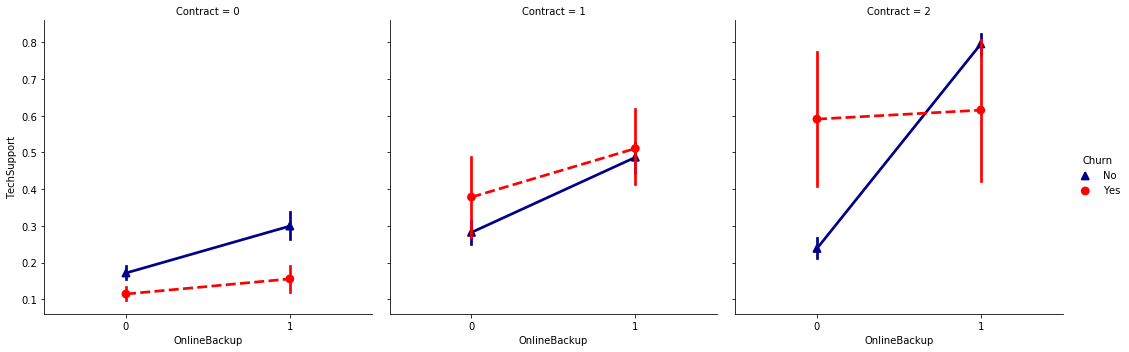

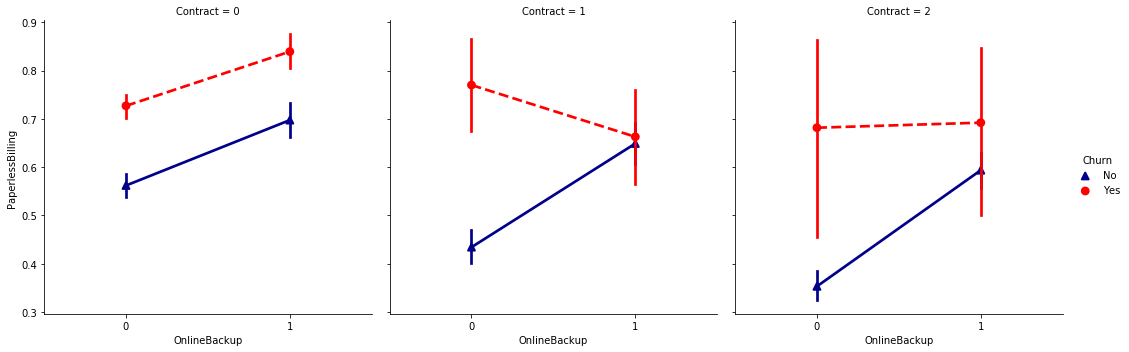

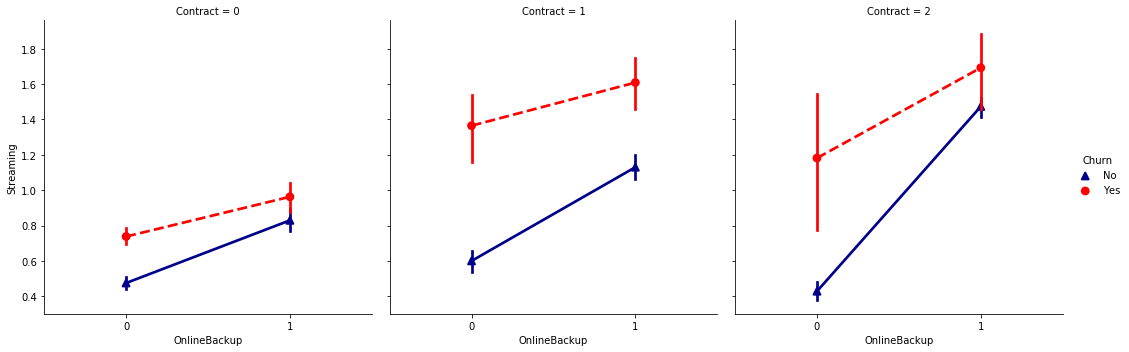

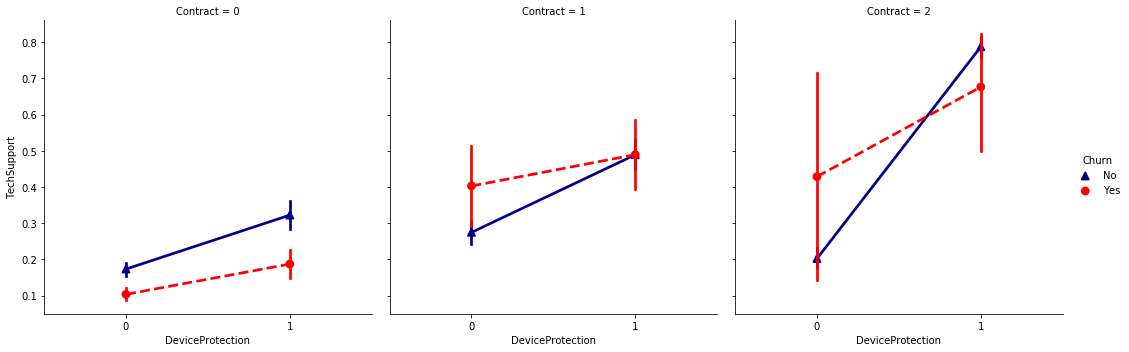

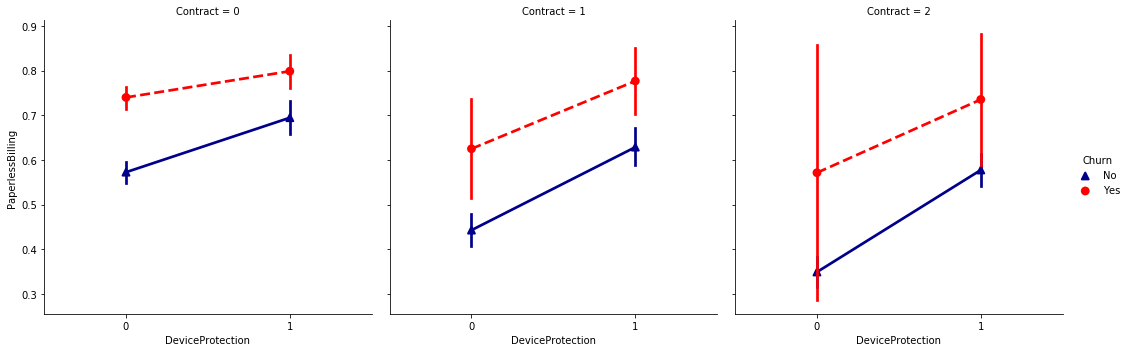

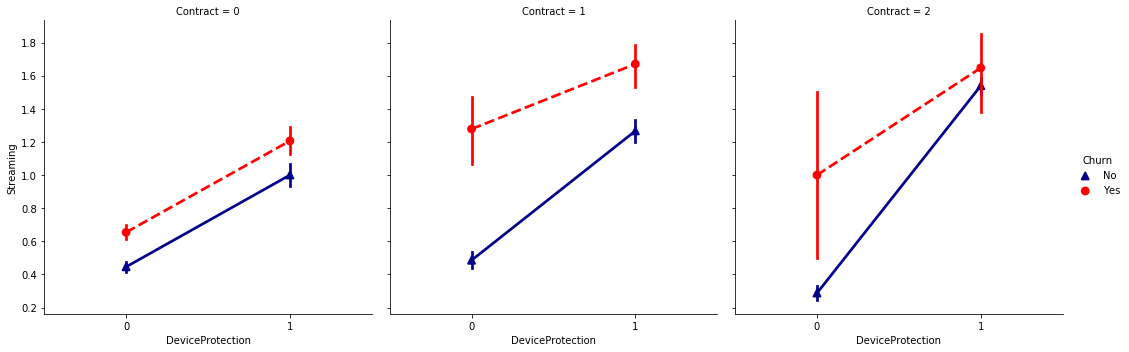

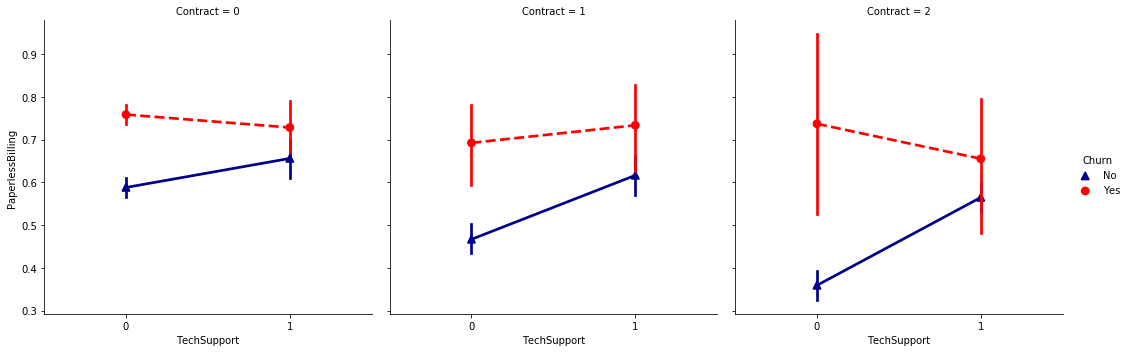

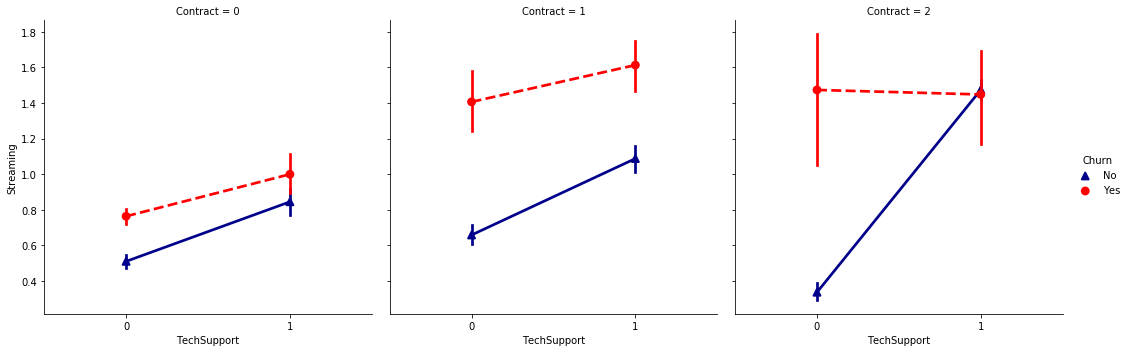

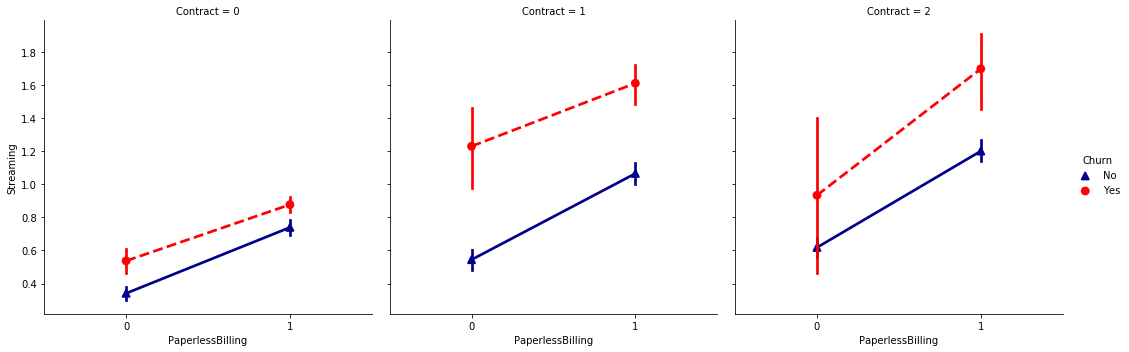

In [54]:
for i in range(len(categorical_vars)-1):
    for j in range(i+1,len(categorical_vars)):
        if i>=j:
            continue
        else:
            sns.catplot(x=categorical_vars[i], y=categorical_vars[j], hue="Churn", col="Contract", 
            palette={"Yes": "red", "No": "darkblue"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df)

#### Data Analysis 

The submission applies both analytic and evaluative methods with accurately annotated methods and findings.

First, split into 3 samples, train, validate and test. 

In [30]:
from sklearn.model_selection import train_test_split

train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.Churn)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.Churn)

**Do those who churn pay more?**

Controlling for contract type, is there a significant difference in the adjusted charges of those who churn compared to those who do not churn? 

Validate assumptions:

1. Is adjusted charges normally distributed? 
2. Do the two groups have variance equal variance? 

In [57]:
from scipy import stats

churned = train[train.Churn=="Yes"]
active = train[train.Churn=="No"]

In [58]:
# test for normality with Shapiro-Wilks test
stats.shapiro(churned.AdjustedCharges)

(0.9888443350791931, 3.866394990836852e-07)

In [59]:
stats.shapiro(active.dropna().AdjustedCharges)

(0.9974231719970703, 9.242063970305026e-05)

Test for equal variances using Levene's test. 
- $H_{0}$: $\sigma_{churned} = \sigma_{active}$
- $H_{a}$: $\sigma_{churned} \ne \sigma_{active}$

Based on Levene's test, we fail to reject the null hypothesis of equal variance. 

In [60]:
# test for equal variance using levene test
stats.levene(churned.AdjustedCharges, active.dropna().AdjustedCharges)

LeveneResult(statistic=0.06235881278193053, pvalue=0.8028188914918026)

Run a 2-sample independent t-test. 

In [61]:
from scipy import stats

stats.ttest_ind(churned.AdjustedCharges, active.dropna().AdjustedCharges)

Ttest_indResult(statistic=4.5315896077224656, pvalue=6.0280365498689415e-06)

Based on the t-statistic and the p-value, we conclude that there is a significant difference in the mean adjusted charges between those who churn and those who do not. 


**Are customers who have x (discrete variable) more likely to churn?**

*Controlling for contract type*

Chi-squared test

- tenure (binned)
- senior
- alone
- autopayment
- contract type
- "has add-ons"
- internet service
- phone lines


Assumptions of the Chi-Square test 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/#:~:text=The%20assumptions%20of%20the%20Chi,the%20variables%20are%20mutually%20exclusive.

1. The data in the cells should be frequencies. 

2. The categories are mutually exclusive.

3. Each subject may contribute data to one and only one cell in the χ2. 

4. The samples are independent. 

5. There are 2 categorical variables. 

6. 80% of the cells in the frequency table should have a value of at least 5. No cells should have a count of zero. 

**Is there a relationship between type of contract (or lack of contract) and churn?**

- MORE likely to churn: Customers on a month-to-month plan are more likely to churn than customers on a contract. 
- LESS likely to churn: 1 year contract, 2 year contract

In [62]:
train['m2m'] = train['Contract'] == 0


observed = pd.crosstab(train['Churn'], train['m2m'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("chi2: ", chi2)
print("p-value: ", p)
print("degrees of freedom: ", degf)
print("observed:\n", observed)
print("expected:\n", expected)

chi2:  637.1858044918908
p-value:  1.3676931385582773e-140
degrees of freedom:  1
observed:
 m2m    False  True 
Churn              
No      1649   1242
Yes      122    924
expected:
 [[1300.47269495 1590.52730505]
 [ 470.52730505  575.47269495]]


In [63]:
train['one_year'] = train['Contract'] == 1
observed = pd.crosstab(train['Churn'], train['one_year'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("chi2: ", chi2)
print("p-value: ", p)
print("degrees of freedom: ", degf)
print("observed:\n", observed)
print("expected:\n", expected)

chi2:  125.4168143112234
p-value:  4.1252533768755355e-29
degrees of freedom:  1
observed:
 one_year  False  True 
Churn                 
No         2156    735
Yes         953     93
expected:
 [[2282.98679197  608.01320803]
 [ 826.01320803  219.98679197]]


In [64]:
train['two_year'] = train['Contract'] == 2
observed = pd.crosstab(train['Churn'], train['two_year'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print("chi2: ", chi2)
print("p-value: ", p)
print("degrees of freedom: ", degf)
print("observed:\n", observed)
print("expected:\n", expected)

chi2:  349.21809540641175
p-value:  6.272070681574537e-78
degrees of freedom:  1
observed:
 two_year  False  True 
Churn                 
No         1977    914
Yes        1017     29
expected:
 [[2198.54051308  692.45948692]
 [ 795.45948692  250.54051308]]


In [65]:
train['has_contract'] = train['Contract'] > 0

categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PhoneLines', 'Female', 
                   'Streaming', 'AutomatedPayment', 'MailedCheck', 'InternetAddOns', 'tenure_bin', 'tenure']

alpha = .05
dependents = []
independents = []

for i in [False, True]:
    contract_df = train[train.has_contract==i]
    for column in categorical_cols:
        observed = pd.crosstab(contract_df["Churn"], contract_df[column])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print(column, "\n")
        print("has contract: ", i)
        print("chi2: ", chi2)
        print("p-value: ", p)
        print("degrees of freedom: ", degf)
        print("observed:\n", observed)
        print("expected:\n", expected)
        
        if p < alpha:
            print("Significant\n")
            dependents.append("contract: " + str(i) + ", variable: " + column)
        else:
            print("Not Significant\n")
            independents.append("contract: " + str(i) + ", variable: " + column)
    
output =  {
    "dependent": dependents,
    "independent": independents
}

output["dependent"], output["independent"]

SeniorCitizen 

has contract:  False
chi2:  24.8301072889561
p-value:  6.261185252998131e-07
degrees of freedom:  1
observed:
 SeniorCitizen     0    1
Churn                   
No             1031  211
Yes             685  239
expected:
 [[983.966759 258.033241]
 [732.033241 191.966759]]
Significant

Partner 

has contract:  False
chi2:  7.23398549833205
p-value:  0.007153622213292376
degrees of freedom:  1
observed:
 Partner    0    1
Churn            
No       775  467
Yes      629  295
expected:
 [[805.06371191 436.93628809]
 [598.93628809 325.06371191]]
Significant

Dependents 

has contract:  False
chi2:  20.679985393089808
p-value:  5.428042404961983e-06
degrees of freedom:  1
observed:
 Dependents    0    1
Churn               
No          941  301
Yes         775  149
expected:
 [[983.966759 258.033241]
 [732.033241 191.966759]]
Significant

InternetService 

has contract:  False
chi2:  145.57532530182567
p-value:  2.4474834291939507e-32
degrees of freedom:  2
observed:
 Intern

AutomatedPayment 

has contract:  True
chi2:  0.10088418119809361
p-value:  0.7507711510823418
degrees of freedom:  1
observed:
 AutomatedPayment    0    1
Churn                     
No                658  991
Yes                51   71
expected:
 [[660.15866742 988.84133258]
 [ 48.84133258  73.15866742]]
Not Significant

MailedCheck 

has contract:  True
chi2:  7.962943233984706
p-value:  0.0047744713129079415
degrees of freedom:  1
observed:
 MailedCheck     0    1
Churn                 
No           1255  394
Yes           107   15
expected:
 [[1268.17504235  380.82495765]
 [  93.82495765   28.17504235]]
Significant

InternetAddOns 

has contract:  True
chi2:  43.015676822732075
p-value:  1.1581330758186638e-07
degrees of freedom:  6
observed:
 InternetAddOns    0   1    2    3    4    5    6
Churn                                           
No              567  46  115  247  287  242  145
Yes              11   3    9   29   37   26    7
expected:
 [[538.18294749  45.62450593 115.457

(['contract: False, variable: SeniorCitizen',
  'contract: False, variable: Partner',
  'contract: False, variable: Dependents',
  'contract: False, variable: InternetService',
  'contract: False, variable: OnlineSecurity',
  'contract: False, variable: OnlineBackup',
  'contract: False, variable: TechSupport',
  'contract: False, variable: PaperlessBilling',
  'contract: False, variable: PhoneLines',
  'contract: False, variable: Streaming',
  'contract: False, variable: AutomatedPayment',
  'contract: False, variable: MailedCheck',
  'contract: False, variable: InternetAddOns',
  'contract: False, variable: tenure_bin',
  'contract: False, variable: tenure',
  'contract: True, variable: InternetService',
  'contract: True, variable: OnlineBackup',
  'contract: True, variable: PaperlessBilling',
  'contract: True, variable: Streaming',
  'contract: True, variable: MailedCheck',
  'contract: True, variable: InternetAddOns'],
 ['contract: False, variable: DeviceProtection',
  'contract:

**Month-to-Month**

- MORE likely to churn: SeniorCitizen, Fiber InternetService (verify), PaperlessBilling, with Streaming (verify), tenure bin of 0 & 1 (verify), 2 Phone lines (verify)
- LESS likely to churn: Partner, Dependents, OnlineSecurity, OnlineBackup, TechSupport, AutomatedPayment, MailedCheck
- NOT significant: DeviceProtection, Female
- UNCLEAR: InternetAddOns

**Contract (one or two year)**

- MORE likely to churn: Fiber InternetService (verify), OnlineBackup, PaperlessBilling, with Streaming (verify), tenure_bin of 4, 5, or 6 (verify)
- LESS likely to churn: MailedCheck, 
- NOT Significant: Partner, OnlineSecurity, TechSupport, Female, SeniorCitizen, Dependents, DeviceProtection, AutomatedPayment
- UNCLEAR: InternetAddOns, PhoneLines

In [66]:
train['has_fiber']  = train['InternetService'] == 2
train['has_add_ons'] = train['InternetAddOns'] > 0
train['has_non_streaming_add_ons'] = train['InternetAddOns'] - train['Streaming'] > 0
train['has_contract'] = train['Contract'] > 0
train['has_partner_dependents'] = train['Partner'] + train['Dependents'] > 0
train['has_phone'] = train['PhoneLines'] > 0
train['has_streaming'] = train['Streaming'] > 0
train['new_customer'] = train['tenure_bin'] <= 1
train['old_customer'] = train['tenure_bin'] > 4

In [67]:
validate['m2m'] = validate['Contract'] == 0
test['m2m'] = test['Contract'] == 0

validate['one_year'] = validate['Contract'] == 1
test['one_year'] = test['Contract'] == 1

validate['two_year'] = validate['Contract'] == 2
test['two_year'] = test['Contract'] == 2

validate['has_contract'] = validate['Contract'] > 0
test['has_contract'] = test['Contract'] > 0

validate['has_fiber']  = validate['InternetService'] == 2
validate['has_add_ons'] = validate['InternetAddOns'] > 0
validate['has_non_streaming_add_ons'] = validate['InternetAddOns'] - validate['Streaming'] > 0
validate['has_contract'] = validate['Contract'] > 0
validate['has_partner_dependents'] = validate['Partner'] + validate['Dependents'] > 0
validate['has_phone'] = validate['PhoneLines'] > 0
validate['has_streaming'] = validate['Streaming'] > 0
validate['new_customer'] = validate['tenure_bin'] <= 1
validate['old_customer'] = validate['tenure_bin'] > 4

test['has_fiber']  = test['InternetService'] == 2
test['has_add_ons'] = test['InternetAddOns'] > 0
test['has_non_streaming_add_ons'] = test['InternetAddOns'] - test['Streaming'] > 0
test['has_contract'] = test['Contract'] > 0
test['has_partner_dependents'] = test['Partner'] + test['Dependents'] > 0
test['has_phone'] = test['PhoneLines'] > 0
test['has_streaming'] = test['Streaming'] > 0
test['new_customer'] = test['tenure_bin'] <= 1
test['old_customer'] = test['tenure_bin'] > 4

In [68]:
categorical_cols = ['has_fiber', 'has_add_ons', 'has_non_streaming_add_ons', 
                    'has_partner_dependents', 'new_customer', 'old_customer',
                    'has_phone', 'has_streaming']

alpha = .05
dependents = []
independents = []

for i in [False, True]:
    contract_df = train[train.has_contract==i]
    for column in categorical_cols:
        observed = pd.crosstab(contract_df["Churn"], contract_df[column])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print(column, "\n")
        print("has contract: ", i)
        print("chi2: ", chi2)
        print("p-value: ", p)
        print("degrees of freedom: ", degf)
        print("observed:\n", observed)
        print("expected:\n", expected)
        
        if p < alpha:
            print("Significant\n")
            dependents.append("contract: " + str(i) + ", variable: " + column)
        else:
            print("Not Significant\n")
            independents.append("contract: " + str(i) + ", variable: " + column)
    
output =  {
    "dependent": dependents,
    "independent": independents
}

output["dependent"], output["independent"]

has_fiber 

has contract:  False
chi2:  137.09713869887923
p-value:  1.1482817355517368e-31
degrees of freedom:  1
observed:
 has_fiber  False  True 
Churn                  
No           696    546
Yes          283    641
expected:
 [[561.36565097 680.63434903]
 [417.63434903 506.36565097]]
Significant

has_add_ons 

has contract:  False
chi2:  1.3278106638394076
p-value:  0.2491950766892509
degrees of freedom:  1
observed:
 has_add_ons  False  True 
Churn                    
No             390    852
Yes            268    656
expected:
 [[377.30193906 864.69806094]
 [280.69806094 643.30193906]]
Not Significant

has_non_streaming_add_ons 

has contract:  False
chi2:  11.217420287202064
p-value:  0.0008103305863266812
degrees of freedom:  1
observed:
 has_non_streaming_add_ons  False  True 
Churn                                  
No                           502    740
Yes                          441    483
expected:
 [[540.72299169 701.27700831]
 [402.27700831 521.72299169]]
Significa

(['contract: False, variable: has_fiber',
  'contract: False, variable: has_non_streaming_add_ons',
  'contract: False, variable: has_partner_dependents',
  'contract: False, variable: new_customer',
  'contract: False, variable: old_customer',
  'contract: False, variable: has_streaming',
  'contract: True, variable: has_fiber',
  'contract: True, variable: has_add_ons',
  'contract: True, variable: has_non_streaming_add_ons',
  'contract: True, variable: has_streaming'],
 ['contract: False, variable: has_add_ons',
  'contract: False, variable: has_phone',
  'contract: True, variable: has_partner_dependents',
  'contract: True, variable: new_customer',
  'contract: True, variable: old_customer',
  'contract: True, variable: has_phone'])

No Contract: 

- MORE likely to churn: has_fiber, has_streaming, new_customer
- LESS likely to churn: has_partner_dependents, has_non_streaming_add_ons, old_customer
- NOT Significant: has_phone

With Contract:

- MORE likely to churn: has_fiber, has_non_streaming_add_ons, has_streaming
- NOT Significant: has_partner_dependents, new_customer, old_customer, has_phone

**Is there a relationship between having fiber and having streaming services and/or having internet add-ons?**

- YES: Customers who have fiber are significantly more likely to have streaming services as well as other internet add-ons. 

In [70]:
cols = ['has_streaming', 'has_non_streaming_add_ons']
for i in [False, True]:
    contract_df = train[train.has_contract==i]
    for c in cols:
        observed = pd.crosstab(contract_df['has_fiber'], contract_df[c])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print("\nhas_contract: ", i)
        print("variable: ", c)
        print(observed)
        print("chi2: ", chi2)
        print("p-value: ", p)
        print("degrees of freedom: ", degf)
        print("observed:\n", observed)
        print("expected:\n", expected)


has_contract:  False
variable:  has_streaming
has_streaming  False  True 
has_fiber                  
False            722    257
True             459    728
chi2:  264.8558518710452
p-value:  1.5000068736550292e-59
degrees of freedom:  1
observed:
 has_streaming  False  True 
has_fiber                  
False            722    257
True             459    728
expected:
 [[533.79455217 445.20544783]
 [647.20544783 539.79455217]]

has_contract:  False
variable:  has_non_streaming_add_ons
has_non_streaming_add_ons  False  True 
has_fiber                              
False                        502    477
True                         441    746
chi2:  42.96740765297041
p-value:  5.565943760644547e-11
degrees of freedom:  1
observed:
 has_non_streaming_add_ons  False  True 
has_fiber                              
False                        502    477
True                         441    746
expected:
 [[426.22206833 552.77793167]
 [516.77793167 670.22206833]]

has_contract:  True
variab

Are streaming and non-streaming add-ons still a driver of churn when accounting for fiber service? 

- For month-to-month customers, neither streaming services nor non-streaming add-ons is a significant driver of churn for customers without fiber service. 
- For contract customers, both streaming services and non-streaming add-ons are still a significant driver of churn for customers who do not have fiber service. 

In [71]:
cols = ['has_streaming', 'has_non_streaming_add_ons']
no_fiber_customers = train[train.has_fiber==False]
for i in [False, True]:
    contract_df = no_fiber_customers[no_fiber_customers.has_contract==i]
    for c in cols:
        observed = pd.crosstab(contract_df['Churn'], contract_df[c])
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        print("\nhas_contract: ", i)
        print("variable: ", c)
        print(observed)
        print("chi2: ", chi2)
        print("p-value: ", p)
        print("degrees of freedom: ", degf)
        print("observed:\n", observed)
        print("expected:\n", expected)


has_contract:  False
variable:  has_streaming
has_streaming  False  True 
Churn                      
No               507    189
Yes              215     68
chi2:  0.8610060736385472
p-value:  0.3534573021327201
degrees of freedom:  1
observed:
 has_streaming  False  True 
Churn                      
No               507    189
Yes              215     68
expected:
 [[513.29111338 182.70888662]
 [208.70888662  74.29111338]]

has_contract:  False
variable:  has_non_streaming_add_ons
has_non_streaming_add_ons  False  True 
Churn                                  
No                           341    355
Yes                          161    122
chi2:  4.709954417245746
p-value:  0.029988446727771772
degrees of freedom:  1
observed:
 has_non_streaming_add_ons  False  True 
Churn                                  
No                           341    355
Yes                          161    122
expected:
 [[356.886619 339.113381]
 [145.113381 137.886619]]

has_contract:  True
variable:  has_str

#### Summary of findings

Month-to-month customers are more likely to churn than those in a one or two-year contract. 
Of the month-to-month customers, those with fiber, senior citizens, those in their first 12 months, those with paperless billing and those with phone lines are more likely to churn. Month-to-month customers with partners and/or dependents, those subscribed to online security, online backup, or tech support, and those who pay via automated payment or mailed check are less likely to churn. 

Features to keep for m2m model:
- has_fiber
- SeniorCitizen
- PaperlessBilling
- new_customer
- PhoneLines
- has_partner_dependents
- OnlineSecurity
- OnlineBackup
- TechSupport
- AutomatedPayment
- MailedCheck

Customers under a one or two year contract are less likely to churn than those on a month-to-month plan. Of the customers under contract, those with fiber internet service, those with streaming or online backup, and those with paperless billing are more likely to churn. Customers under contract who pay via mailed check are less likely to churn. 

Features to keep for contract model:
- has_fiber
- PaperlessBilling
- with_streaming
- OnlineBackup
- MailedCheck
- has_non_streaming_add_ons

In [72]:
mycols = ['has_contract', 'has_fiber', 'PaperlessBilling', 'MailedCheck', 'OnlineBackup', 'has_streaming', 'has_non_streaming_add_ons', 
          'SeniorCitizen', 'new_customer', 'PhoneLines', 'has_partner_dependents', 'OnlineSecurity', 'TechSupport',
          'AutomatedPayment', 'Churn'
         ]

train = train[mycols]
validate = validate[mycols]
test = test[mycols]

#### Modeling

In [73]:
# encode target var
train['Churn'] = train[['Churn']].replace({'Yes': 1, 'No': 0})
validate['Churn'] = validate[['Churn']].replace({'Yes': 1, 'No': 0})
test['Churn'] = test[['Churn']].replace({'Yes': 1, 'No': 0})

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn import metrics


X_train = train.drop(columns=['Churn'])
y_train = train[['Churn']]

X_validate = validate.drop(columns=['Churn'])
y_validate = validate[['Churn']]

X_test = test.drop(columns=['Churn'])
y_test = test[['Churn']]

Baseline Predictions

If we predict the most common class, how will our model perform? 

In [75]:
import numpy as np

# rate of churn on our training dataset :
y_train.value_counts() / len(y_train)

Churn
0        0.734315
1        0.265685
dtype: float64

Because 73% of all customers have not churned, if we predict all customers to not churn, we will achieve roughly 73% accuracy. 

In [90]:
y_validate['baseline_pred']=0
y_validate['baseline_prob']=(1-y_train.mean()).round(2)[0]

Logistic Regression

In [77]:
logr = LogisticRegression()
logr.fit(X_train, y_train.Churn)
y_validate['logr_pred'] = logr.predict(X_validate)
y_pred_proba = logr.predict_proba(X_validate)
y_validate['logr_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importance = logr.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'logr': abs(importance)})

KNN

In [78]:
knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train.Churn)
y_validate['knn_pred'] = knn.predict(X_validate)
y_pred_proba = knn.predict_proba(X_validate)
y_validate['knn_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importances = permutation_importance(knn, X_validate, y_validate.Churn, random_state=123)
importance = pd.DataFrame({'knn': importances.importances_mean})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

Support Vector Classifier

In [79]:
svc = SVC(kernel="linear", C=0.025, probability=True, random_state=123)
svc.fit(X_train, y_train.Churn)
y_validate['svc_pred'] = svc.predict(X_validate)
y_pred_proba = svc.predict_proba(X_validate)
y_validate['svc_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importances = permutation_importance(svc, X_validate, y_validate.Churn, random_state=123)
importance = pd.DataFrame({'svc': importances.importances_mean})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

Decision Tree

In [80]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123)
dt.fit(X_train, y_train.Churn)
y_validate['dt_pred'] = dt.predict(X_validate)
y_pred_proba = dt.predict_proba(X_validate)
y_validate['dt_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importance = pd.DataFrame({'dt': dt.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

Random Forest

In [81]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=123)
rf.fit(X_train, y_train.Churn)
y_validate['rf_pred'] = rf.predict(X_validate)
y_pred_proba = rf.predict_proba(X_validate)
y_validate['rf_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importance = pd.DataFrame({'rf': rf.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

AdaBoost

In [82]:
ada = AdaBoostClassifier(random_state=123)
ada.fit(X_train, y_train.Churn)
y_validate['ada_pred'] = ada.predict(X_validate)
y_pred_proba = ada.predict_proba(X_validate)
y_validate['ada_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importance = pd.DataFrame({'ada': ada.feature_importances_})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

Naive Bayes

In [83]:
nb = GaussianNB()
nb.fit(X_train, y_train.Churn)
y_validate['nb_pred'] = nb.predict(X_validate)
y_pred_proba = nb.predict_proba(X_validate)
y_validate['nb_prob'] = [y_pred_proba[i][1] for i in range(len(y_validate.Churn))]

importances = permutation_importance(nb, X_validate, y_validate.Churn, random_state=123)
importance = pd.DataFrame({'nb': abs(importances.importances_mean)})
feature_importance_df = pd.concat([feature_importance_df, importance], axis=1)

**Plot Feature Importances**

In [84]:
classifiers = ['logr', 'knn', 'svc', 'dt', 'rf', 'ada', 'nb']
for clf in classifiers:
    ranked_col = clf+'_rank'
    feature_importance_df[ranked_col] = feature_importance_df[clf].rank(ascending=True)

rank_mean = pd.DataFrame({'rank_mean': feature_importance_df.filter(regex='\_rank').mean(axis=1)})
feature_importance_df = pd.concat([feature_importance_df, rank_mean], 
                                  axis=1).sort_values(['rank_mean'], 
                                                      ascending=False).reset_index(drop=True)

In [85]:
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df

Feature      logr       knn       svc        dt  \
0                has_contract  1.391531  0.015047  0.005095  0.577177   
1                   has_fiber  1.003413  0.044431  0.045261  0.171206   
2                new_customer  1.072549  0.011967  0.035071  0.144556   
3                 MailedCheck  0.475661  0.020853  0.002370  0.005469   
4            AutomatedPayment  0.354244  0.015877  0.000474  0.010346   
5              OnlineSecurity  0.361035  0.010664  0.001777  0.022513   
6                 TechSupport  0.302694  0.006280 -0.002133  0.017654   
7                  PhoneLines  0.036463  0.011256  0.001066  0.016727   
8            PaperlessBilling  0.304502  0.007820  0.003081  0.004043   
9      has_partner_dependents  0.169752  0.008057 -0.002370  0.005430   
10              SeniorCitizen  0.182609  0.006991  0.001185  0.007741   
11              has_streaming  0.345666  0.002014 -0.000948  0.012349   
12               OnlineBackup  0.096447  0.005806 -0.000118  0.000000   
13  has_non_streaming_add_ons  0.083466  0.004028 -0.002607  0.004788   

          rf   ada        nb  logr_rank  knn_rank  svc_rank  dt_rank  rf_rank  \
0   0.289388  0.14  0.012796       14.0      11.0      12.0     14.0     14.0   
1   0.105230  0.08  0.013626       12.0      14.0      14.0     13.0     12.0   
2   0.155776  0.10  0.012559       13.0      10.0      13.0     12.0     13.0   
3   0.040630  0.10  0.006398       11.0      13.0      10.0      5.0      6.0   
4   0.047543  0.10  0.010308        9.0      12.0       6.0      7.0      7.0   
5   0.049286  0.06  0.006635       10.0       8.0       9.0     11.0      8.0   
6   0.080833  0.06  0.011256        6.0       4.0       3.0     10.0     11.0   
7   0.023505  0.12  0.001185        1.0       9.0       7.0      9.0      3.0   
8   0.072270  0.02  0.001422        7.0       6.0      11.0      2.0     10.0   
9   0.058267  0.02  0.009479        4.0       7.0       2.0      4.0      9.0   
10  0.016614  0.02  0.007109        5.0       5.0       8.0      6.0      2.0   
11  0.028528  0.06  0.000355        8.0       1.0       4.0      8.0      5.0   
12  0.026471  0.04  0.002962        3.0       3.0       5.0      1.0      4.0   
13  0.005657  0.08  0.002488        2.0       2.0       1.0      3.0      1.0   

    ada_rank  nb_rank  rank_mean  
0       14.0     13.0  13.142857  
1        8.5     14.0  12.500000  
2       11.0     12.0  12.000000  
3       11.0      6.0   8.857143  
4       11.0     10.0   8.857143  
5        6.0      7.0   8.428571  
6        6.0     11.0   7.285714  
7       13.0      2.0   6.285714  
8        2.0      3.0   5.857143  
9        2.0      9.0   5.285714  
10       2.0      8.0   5.142857  
11       6.0      1.0   4.714286  
12       4.0      5.0   3.571429  
13       8.5      4.0   3.071429

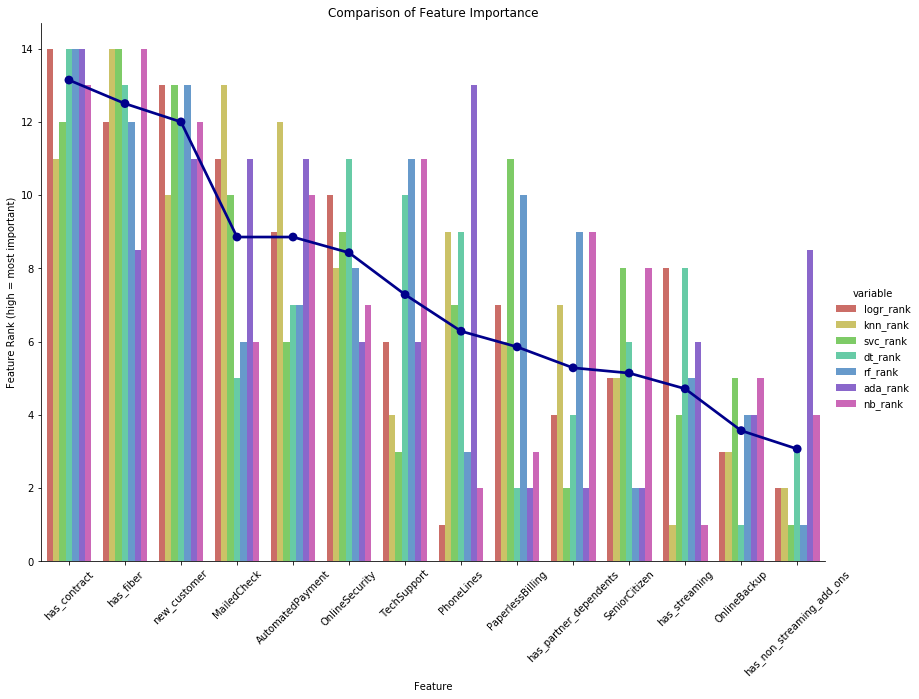

In [86]:
feature_importance_ranks = feature_importance_df.drop(columns=['logr', 'knn', 'svc', 'dt', 'rf', 'ada', 'nb', 'rank_mean'])
feature_importance_ranks = pd.melt(feature_importance_ranks, id_vars = 'Feature')

sns.set_palette("hls", 7)

sns.catplot(x = 'Feature', y='value', hue='variable', data=feature_importance_ranks, kind='bar', 
           height=8.27, aspect=11.7/8.27)

sns.set_palette('dark')
ax = sns.pointplot(x='Feature', y='rank_mean', data=feature_importance_df, color='darkblue', 
                   size=3)
plt.setp(ax.lines, zorder=100)
plt.setp(ax.collections, zorder=100, label="")
plt.ylabel('Feature Rank (high = most important)')
plt.title('Comparison of Feature Importance')
plt.xticks(rotation=45)
plt.show()

##### Confusion Matrix

In [88]:
baseline_cm = metrics.confusion_matrix(y_validate.Churn, y_validate.baseline_pred)
baseline_cm = pd.DataFrame({'No Churn': baseline_cm[0], 'Churn': baseline_cm[1]}, 
                           index=['Predicted-No Churn', 'Predicted-Churn'])
baseline_cm

No Churn  Churn
Predicted-No Churn      1239    449
Predicted-Churn            0      0

Baseline-Predict Most Frequent
        No Churn (0)  Churn (1)
pred 0          1239        449
pred 1             0          0
accuracy: 73.40%
misclassification: 26.60%
recall: 0.00%
specificity: 100.00%
type I error rate: 0.00%
type II error rate: 100.00%
precision: 0.00%
f1 score: 0.00%
AUC score: 0.5




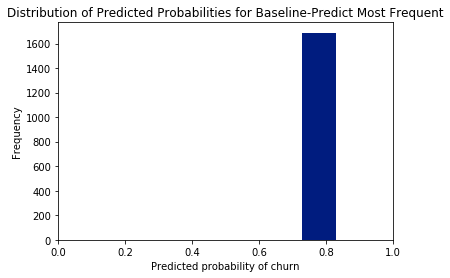

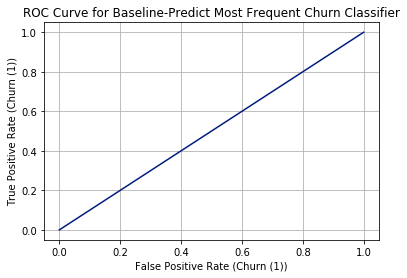

Logistic Regression
        No Churn (0)  Churn (1)
pred 0          1145        213
pred 1            94        236
accuracy: 81.81%
misclassification: 18.19%
recall: 52.56%
specificity: 92.41%
type I error rate: 7.59%
type II error rate: 47.44%
precision: 71.52%
f1 score: 60.59%
AUC score: 0.86




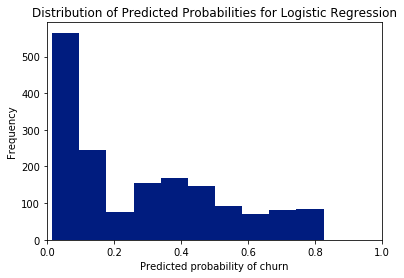

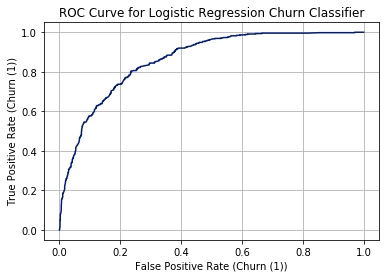

K-Nearest Neighbors
        No Churn (0)  Churn (1)
pred 0          1084        195
pred 1           155        254
accuracy: 79.27%
misclassification: 20.73%
recall: 56.57%
specificity: 87.49%
type I error rate: 12.51%
type II error rate: 43.43%
precision: 62.10%
f1 score: 59.21%
AUC score: 0.8




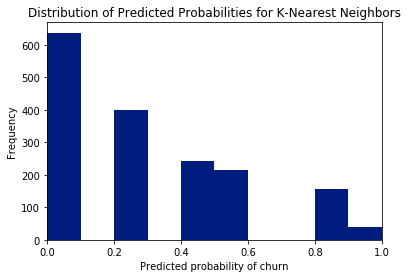

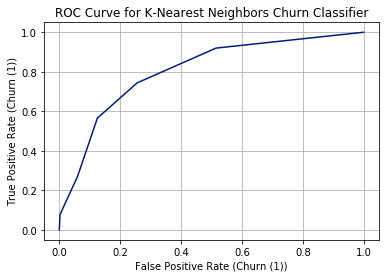

Support Vector Classifier
        No Churn (0)  Churn (1)
pred 0          1163        261
pred 1            76        188
accuracy: 80.04%
misclassification: 19.96%
recall: 41.87%
specificity: 93.87%
type I error rate: 6.13%
type II error rate: 58.13%
precision: 71.21%
f1 score: 52.73%
AUC score: 0.86




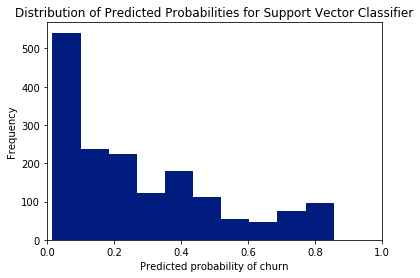

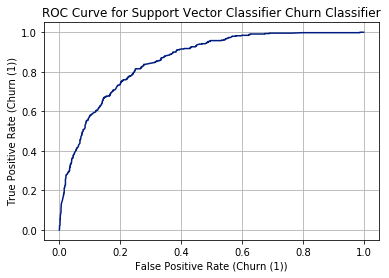

Decision Tree
        No Churn (0)  Churn (1)
pred 0          1169        267
pred 1            70        182
accuracy: 80.04%
misclassification: 19.96%
recall: 40.53%
specificity: 94.35%
type I error rate: 5.65%
type II error rate: 59.47%
precision: 72.22%
f1 score: 51.93%
AUC score: 0.84




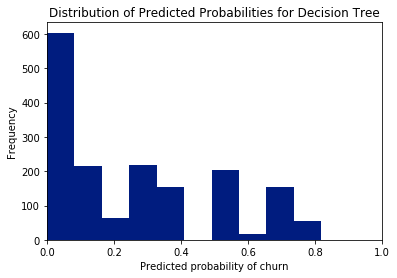

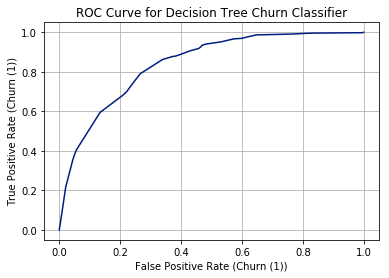

Random Forest
        No Churn (0)  Churn (1)
pred 0          1214        328
pred 1            25        121
accuracy: 79.09%
misclassification: 20.91%
recall: 26.95%
specificity: 97.98%
type I error rate: 2.02%
type II error rate: 73.05%
precision: 82.88%
f1 score: 40.67%
AUC score: 0.85




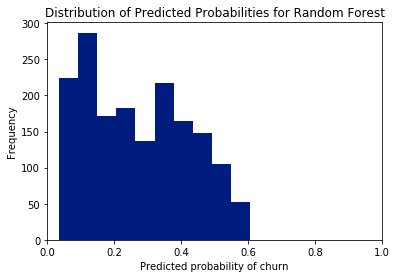

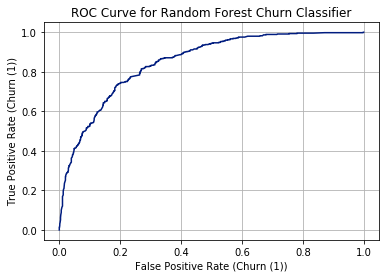

AdaBoost
        No Churn (0)  Churn (1)
pred 0          1128        201
pred 1           111        248
accuracy: 81.52%
misclassification: 18.48%
recall: 55.23%
specificity: 91.04%
type I error rate: 8.96%
type II error rate: 44.77%
precision: 69.08%
f1 score: 61.39%
AUC score: 0.86




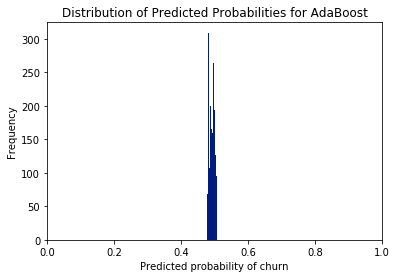

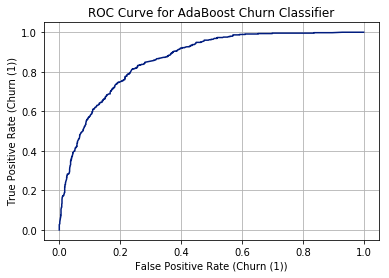

Naive Bayes
        No Churn (0)  Churn (1)
pred 0           940        113
pred 1           299        336
accuracy: 75.59%
misclassification: 24.41%
recall: 74.83%
specificity: 75.87%
type I error rate: 24.13%
type II error rate: 25.17%
precision: 52.91%
f1 score: 61.99%
AUC score: 0.85




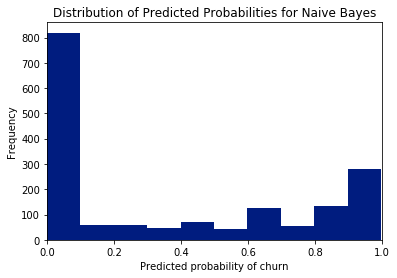

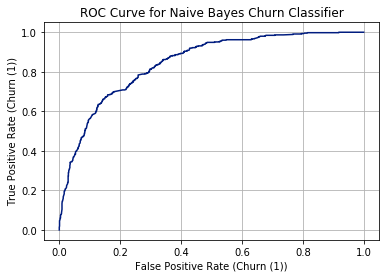

In [89]:
classifiers = ['baseline', 'logr', 'knn', 'svc', 'dt', 'rf', 'ada', 'nb']
clf_names = ['Baseline-Predict Most Frequent', 'Logistic Regression', 'K-Nearest Neighbors', 
             'Support Vector Classifier', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Naive Bayes']

for i in range(len(classifiers)):
    clf = classifiers[i]
    col = clf+'_pred'
    col_prob = clf+'_prob'
    name = clf_names[i]
    cm = metrics.confusion_matrix(y_validate.Churn, y_validate[col])
    cm = pd.DataFrame({'No Churn (0)': cm[0], 'Churn (1)': cm[1]}, 
                      index=['pred 0', 'pred 1'])
    accuracy = metrics.accuracy_score(y_validate.Churn, y_validate[col])
    misclassification = 1-accuracy
    recall = metrics.recall_score(y_validate.Churn, y_validate[col])
    specificity = cm['No Churn (0)'][0]/(cm['No Churn (0)'].sum())
    fpr = 1 - specificity
    fnr = cm['Churn (1)'][0]/(cm['Churn (1)'].sum())
    precision = metrics.precision_score(y_validate.Churn, y_validate[col])
    f1 = metrics.f1_score(y_validate.Churn, y_validate[col])
    auc = metrics.roc_auc_score(y_validate.Churn, y_validate[col_prob])
    
    print(name)
    print(cm)
    print(f'accuracy: {accuracy:.2%}')
    print(f'misclassification: {misclassification:.2%}')
    print(f'recall: {recall:.2%}')
    print(f'specificity: {specificity:.2%}')
    print(f'type I error rate: {fpr:.2%}')
    print(f'type II error rate: {fnr:.2%}')
    print(f'precision: {precision:.2%}')
    print(f'f1 score: {f1:.2%}')
    print(f'AUC score: {auc:.2}')
    print("\n")
    
    plt.hist(y_validate[col_prob])
    plt.xlim(0,1)
    plt.title(f'Distribution of Predicted Probabilities for {name}')
    plt.xlabel('Predicted probability of churn')
    plt.ylabel('Frequency')
    plt.show()
    
    fpr, tpr, thresholds = metrics.roc_curve(y_validate.Churn, y_validate[col_prob])
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate (Churn (1))")
    plt.ylabel("True Positive Rate (Churn (1))")
    plt.title(f'ROC Curve for {name} Churn Classifier')
    plt.grid(True)
    plt.show()

    

Accuracy

(TP + TN) / (TP + TN + FP + FN)

Misclassification Rate

1 - Accuracy

Recall / Sensitivity

What percentage of churned customers actually churned? 

TP / (FN + TP)

Specificity

TN / (TN + FP)

Type I Error - False Positive Rate

What percentage of the active customers were predicted to have churned? 

FP / (TN + FP) = 1 - Specificity

Type II Error - False Negative Rate

What percentage of churned customers were not predicted to have churned? 

FN / (TP + FN)

Precision

Of those predicted positive, how many were actually positive? 

TP / (TP + FP)

F1 Score

Receiver Operating Characteristic (ROC) Curve

Evaluate various thresholds by watching how sensitivity and specificity change. 


Area Under the Curve (AUC) 

Percentage of the ROC curve that is under the curve. 
AUC represents the likelihood of assigning a higher predicted probability to a randomly selected observation that is positive. 

"Confusion matrix advantages:

Allows you to calculate a variety of metrics
Useful for multi-class problems (more than two response classes)
ROC/AUC advantages:

Does not require you to set a classification threshold
Still useful when there is high class imbalance"
https://www.ritchieng.com/machine-learning-evaluate-classification-model/

#### K. Methods

#### L. Justification

#### M. Visual Representation

### Data Summary

#### N. Phenomenon

#### O. Detection

### Sources

https://stackoverflow.com/questions/32281580/using-seaborn-how-do-i-get-all-the-elements-from-a-pointplot-to-appear-above-th

https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color

https://towardsdatascience.com/hackcvilleds-4636c6c1ba53

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

cran.r-project.org/web/packages/bivariate/vignettes/bivariate.pdf

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1
"5.Factor Analysis of Mixed Data (FAMD)
Lastly, FAMD is a technique dedicated to the Dimensionality Reduction of data set containing both quantitative and qualitative features. It means FAMD is applied to data with both categorical and numerical features. It is possible by analyzing the similarity between observations by taking into account mixed types of features. Additionally, we can explore the association between all features.
Roughly speaking, the FAMD algorithm can be seen as a mix between PCA and MCA.
Let’s try it with a dataset example.


3.	Study and be able to identify how to treat Mixed Data.  

- visualizations 
- binning quantitative data
- encoding and creating dummy variables with qualitative data
- statistical tests

"Transformation of qualitative variables into continuous variables by multiple correspondence analysis is quite widely used, especially in discriminant analysis on qualitative variables (DISQUAL)."

Tufféry, S. (2011). Data Mining and Statistics for Decision Making. [Western Governors University]. Retrieved from https://wgu.vitalsource.com/#/books/9780470979280/

why not pca? iterpretability to stakeholders. 


Recite in your analysis the strengths and weaknesses why you chose the methods you did and state why and how they are better than the alternatives.  Discuss the alternative methods.
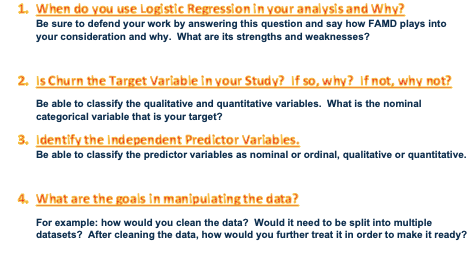


4.	Provide at least twenty graphs depicting all phases of the project.
Describe and identify each part of your supporting graphics and how they directly relate to the required topic.  You must be able to defend your analysis.  This is exactly what you will do in the professional arena. 
Suggestions: 
a.	Univariate Statistics depicting the variable distribution, 
b.	Bivariate Statistics from cleaned and prepared data
c.	Vector charts depicting Quantitative or Qualitative variables
d.	Scree plots of dimensionality
e.	How discriminating data provides relationship among the measures of importance
f.	Box and whisker plots for Outlier Detection
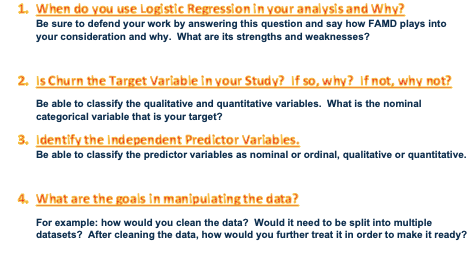


6.	When do you use Logistic Regression in your analysis and Why?
Be sure to defend your work by answering this question and say how FAMD plays into your consideration and why.  What are its strengths and weaknesses?

7.	Is Churn the Target Variable in your Study?  If so, why?  If not, why not?
Be able to classify the qualitative and quantitative variables.  What is the nominal categorical variable that is your target?
8.	Identify the Independent Predictor Variables.
Be able to classify the predictor variables as nominal or ordinal, qualitative or quantitative.

9.	What are the goals in manipulating the data?
For example: how would you clean the data?  Would it need to be split into multiple datasets?  After cleaning the data, how would you further treat it in order to make it ready?
 

10.	 Statistical Identity

Can you define the three quantitative, continuous independent variables?
What are the 16 categorical, qualitative independent variables?
What is the one categorical dependent variable (target)
Is there an identifier for all of the individuals records in the dataset?
What is the essential criteria to be predicted?

11.	Supply screenshots of your code with documentation
Use remarks to identify the steps and processing that is going on in your code.
Explain your work using flower-boxes and comments in the header and sections.
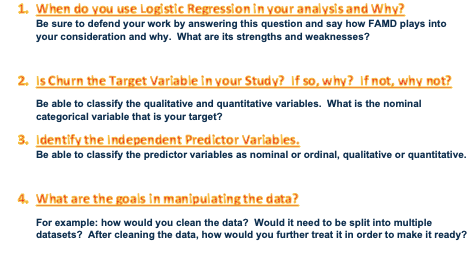